In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [2]:
train = pd.read_csv('train-1561627878332.csv')
train_merchant_data = pd.read_csv('train_merchant_data-1561627820784.csv')
train_order_data = pd.read_csv('train_order_data-1561627847149.csv')
print('train.shape :', train.shape)
print('train_merchant_data.shape :', train_merchant_data.shape)
print('train_order_data.shape :', train_order_data.shape)

print(train_merchant_data.Merchant_ID.unique().shape)
print(train_order_data.Merchant_ID.unique().shape)
print(train.Merchant_ID.unique().shape)

train.shape : (54213, 2)
train_merchant_data.shape : (54213, 7)
train_order_data.shape : (54213, 7)
(54213,)
(54213,)
(54213,)


In [3]:
base_train = train.merge(train_merchant_data, on = ['Merchant_ID'])
base_train_final = base_train.merge(train_order_data, on = ['Merchant_ID'])
base_train_final.head()

Merchant_ID  Fraudster  Ecommerce_Provider_ID Merchant_Registration_Date  \
0       221592          0                1746213        2018-07-01 06:43:23   
1       316935          1                1746213        2018-01-18 01:10:42   
2        38454          1                1746213        2018-07-16 07:56:34   
3       214437          1                1746213        2018-04-28 17:08:09   
4       296240          1                1746213        2018-01-09 00:26:19   

  Registered_Device_ID Gender  Age      IP_Address  Customer_ID      Order_ID  \
0        QDZKUGCGLVPZG      F   42   157.217.17.33       149173  6641fb40fd59   
1        GCCLHNBNIJJGW      M   42     46.8.62.247       117942  09ce4ab420a6   
2        DAXDXWHPMSUJG      M   19    222.110.0.90       125604  41274e2a70c0   
3        XPBKQAAEUPZAO      F   35   104.242.92.50       155981  e8538b380577   
4        VGGTRBYDZMCPN      F   27  175.104.225.24       142401  72905bb38554   

         Date_of_Order  Order_Value_USD Order_Source Order_Payment_Method  
0  2018-10-29 17:58:25              205       Direct          Credit Card  
1  2018-03-24 20:15:57               88          Ads     Cash On Delivery  
2  2018-09-19 15:13:54              100       Direct          Credit Card  
3  2018-05-27 23:24:42               60       Direct           Debit Card  
4  2018-01-11 00:26:20               88          Ads             E-wallet

In [4]:
print(base_train_final.describe())
print("----------------*********************************************************************************----------------------")
print(base_train_final.describe(include = 'object'))

         Merchant_ID    Fraudster  Ecommerce_Provider_ID           Age  \
count   54213.000000  54213.00000                54213.0  54213.000000   
mean   200395.176212      0.09269              1746213.0     33.122240   
std    115398.486895      0.29000                    0.0      8.630091   
min         2.000000      0.00000              1746213.0     18.000000   
25%    100997.000000      0.00000              1746213.0     27.000000   
50%    200574.000000      0.00000              1746213.0     32.000000   
75%    300407.000000      0.00000              1746213.0     39.000000   
max    399993.000000      1.00000              1746213.0     72.000000   

         Customer_ID  Order_Value_USD  
count   54213.000000     54213.000000  
mean   137966.285208        92.230240  
std     15563.516156        45.673263  
min    111234.000000        22.000000  
25%    124471.000000        55.000000  
50%    137864.000000        88.000000  
75%    151405.000000       122.000000  
max    165000

In [9]:
import pandas_profiling 

pandas_profiling.ProfileReport(base_train_final)

In [10]:
pfr = pandas_profiling.ProfileReport(base_train_final)
pfr.to_file("Descriptive_Analysis_Merchant_fraud.html")

### Visualization on data

In [5]:
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [6]:
base_train_final.corr().iplot(kind='heatmap',colorscale="Blues",title="Feature Correlation Matrix")

Text(0, 0.5, 'Frequency of Fraud')

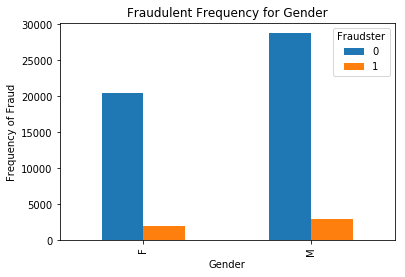

In [7]:
pd.crosstab(base_train_final.Gender ,base_train_final.Fraudster).plot(kind='bar')
plt.title('Fraudulent Frequency for Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency of Fraud')

Text(0, 0.5, 'Frequency of Fraud')

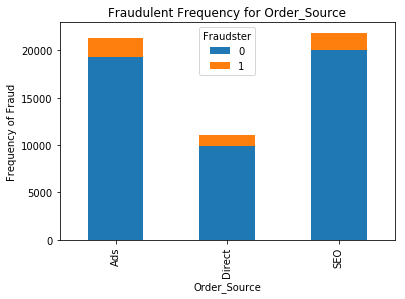

In [8]:
pd.crosstab(base_train_final.Order_Source ,base_train_final.Fraudster).plot(kind='bar',stacked=True)
plt.title('Fraudulent Frequency for Order_Source')
plt.xlabel('Order_Source')
plt.ylabel('Frequency of Fraud')

Text(0, 0.5, 'Frequency of Fraud')

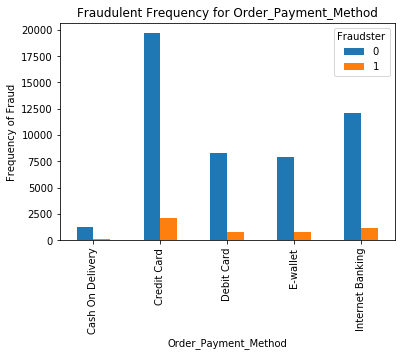

In [9]:
pd.crosstab(base_train_final.Order_Payment_Method ,base_train_final.Fraudster).plot(kind='bar')
plt.title('Fraudulent Frequency for Order_Payment_Method')
plt.xlabel('Order_Payment_Method')
plt.ylabel('Frequency of Fraud')

### Converting the IP String to number

In [300]:
import socket, struct

def ip2long(ip):
    """
    #Convert an IP string to long
    """
    packedIP = socket.inet_aton(ip)
    return struct.unpack("!L", packedIP)

In [301]:
for index in range(len(ip_boundaries.lower_bound_ip_address)):
    ip_lower = ip2long(ip_boundaries.lower_bound_ip_address[index])
    index = index+1
    print(ip_lower)
    #ip_boundaries['lower_bound_int'] = ip_lower


[16777216]
[16777472]
[16777728]
[16778240]
[16779264]
[16781312]
[16785408]
[16793600]
[16809984]
[16842752]
[16843008]
[16843264]
[16843776]
[16844800]
[16846848]
[16850944]
[16859136]
[16875520]
[16908288]
[16908800]
[16909056]
[16909312]
[16909568]
[16909824]
[16910336]
[16910592]
[16910848]
[16911360]
[16912384]
[16916480]
[16924672]
[16941056]
[16973824]
[17039360]
[17039616]
[17039872]
[17040384]
[17040640]
[17040896]
[17041408]
[17043456]
[17047552]
[17055744]
[17072128]
[17104896]
[17170432]
[17301504]
[17367040]
[17432576]
[17434624]
[17435136]
[17435392]
[17435648]
[17436672]
[17440768]
[17448960]
[17465344]
[17498112]
[17563648]
[17825792]
[18087936]
[18153472]
[18219008]
[18350080]
[18874368]
[18939904]
[19005440]
[19136512]
[19202048]
[19267584]
[19398656]
[19660800]
[19726336]
[19791872]
[19922944]
[20054016]
[20119552]
[20185088]
[20447232]
[20971520]
[21102592]
[21233664]
[21495808]
[22020096]
[22544384]
[22806528]
[22937600]
[23068672]
[24117248]
[24379392]
[24641536]

[222298112]
[224395264]
[224919552]
[225181696]
[225443840]
[226492416]
[234881024]
[234883072]
[234884096]
[234885120]
[234889216]
[234897408]
[234913792]
[234946560]
[234947584]
[234948608]
[234950656]
[234951680]
[234954752]
[234962944]
[234979328]
[235012096]
[235077632]
[235143168]
[235405312]
[235929600]
[236978176]
[239075328]
[241172480]
[241434624]
[241500160]
[241565696]
[241598464]
[241599488]
[241600512]
[241602560]
[241604608]
[241605632]
[241614848]
[241623040]
[241627136]
[241631232]
[241696768]
[242221056]
[243269632]
[243270656]
[243271680]
[243272704]
[243273728]
[243277824]
[243286016]
[243294208]
[243302400]
[243335168]
[243400704]
[243531776]
[243662848]
[243793920]
[243859456]
[243892224]
[243908608]
[243916800]
[243924992]
[243990528]
[244056064]
[244318208]
[245366784]
[247472128]
[247476224]
[247478272]
[247479296]
[247480320]
[247482368]
[247483392]
[247484416]
[247488512]
[247496704]
[247504896]
[247513088]
[247529472]
[247595008]
[247726080]
[247857152]
[247

[418129920]
[418131968]
[418132992]
[418134016]
[418135040]
[418136064]
[418152448]
[418185216]
[418250752]
[418258944]
[418267136]
[418275328]
[418283520]
[418316288]
[418320384]
[418324480]
[418332672]
[418349056]
[418365440]
[418381824]
[418512896]
[418643968]
[418660352]
[418664448]
[418668544]
[418672640]
[418676736]
[418693120]
[418709504]
[418725888]
[418726912]
[418727424]
[418727936]
[418728960]
[418729984]
[418734080]
[418742272]
[418758656]
[418766848]
[418770944]
[418775040]
[418791424]
[418799616]
[418807808]
[418824192]
[418832384]
[418840576]
[418906112]
[419430400]
[436207616]
[452984832]
[452985856]
[452986880]
[452987904]
[452988928]
[452993024]
[452997120]
[453001216]
[453009408]
[453050368]
[453115904]
[453246976]
[453509120]
[454033408]
[455081984]
[455213056]
[455245824]
[455254016]
[455256064]
[455258112]
[455262208]
[455270400]
[455272448]
[455274496]
[455278592]
[455344128]
[455606272]
[456130560]
[456261632]
[456262656]
[456263680]
[456264704]
[456265728]
[456

[528728064]
[528736256]
[528740352]
[528742400]
[528744448]
[528748544]
[528760832]
[528762880]
[528764928]
[528769024]
[528777216]
[528793600]
[528795648]
[528797696]
[528801792]
[528805888]
[528809984]
[528812032]
[528814080]
[528816128]
[528818176]
[528826368]
[528830464]
[528836608]
[528838656]
[528840704]
[528842752]
[528859136]
[528861184]
[528863232]
[528867328]
[528875520]
[528879616]
[528883712]
[528887808]
[528891904]
[528900096]
[528902144]
[528904192]
[528906240]
[528908288]
[528924672]
[528926720]
[528928768]
[528930816]
[528932864]
[528941056]
[528943104]
[528945152]
[528949248]
[528957440]
[528965632]
[528973824]
[528982016]
[528984064]
[528986112]
[528988160]
[528990208]
[528994304]
[528996352]
[528998400]
[529002496]
[529006592]
[529268736]
[529530880]
[529596416]
[529661952]
[529727488]
[529793024]
[529858560]
[529924096]
[529989632]
[530055168]
[530120704]
[530186240]
[530251776]
[530317312]
[530579456]
[530710528]
[530841600]
[530972672]
[531103744]
[531169280]
[531

[625688576]
[625704960]
[625707008]
[625709056]
[625711104]
[625713152]
[625721344]
[625723392]
[625725440]
[625727488]
[625729536]
[625731584]
[625733632]
[625735680]
[625737728]
[625770496]
[625786880]
[625795072]
[625803264]
[625811456]
[625815552]
[625817600]
[625819648]
[625823744]
[625827840]
[625829888]
[625831936]
[625836032]
[625838080]
[625840128]
[625842176]
[625844224]
[625846272]
[625848320]
[625850368]
[625852416]
[625854464]
[625856512]
[625860608]
[625868800]
[625999872]
[627048448]
[627113984]
[627179520]
[627212288]
[627216384]
[627218432]
[627220480]
[627228672]
[627230720]
[627232768]
[627236864]
[627238912]
[627240960]
[627245056]
[627277824]
[627294208]
[627296256]
[627298304]
[627300352]
[627302400]
[627310592]
[627572736]
[627834880]
[627900416]
[627965952]
[627998720]
[628006912]
[628015104]
[628017152]
[628019200]
[628021248]
[628023296]
[628027392]
[628029440]
[628031488]
[628097024]
[628228096]
[628230144]
[628232192]
[628236288]
[628244480]
[628246528]
[628

[693031936]
[693032960]
[693033984]
[693035008]
[693036032]
[693037056]
[693038080]
[693039104]
[693040128]
[693041152]
[693042176]
[693043200]
[693044224]
[693045248]
[693046272]
[693047296]
[693048320]
[693049344]
[693050368]
[693051392]
[693052416]
[693053440]
[693054464]
[693055488]
[693056512]
[693057536]
[693058560]
[693059584]
[693060608]
[693061632]
[693062656]
[693063680]
[693064704]
[693065728]
[693066752]
[693067776]
[693068800]
[693069824]
[693070848]
[693071872]
[693072896]
[693073920]
[693074944]
[693075968]
[693076992]
[693078016]
[693079040]
[693080064]
[693081088]
[693082112]
[693083136]
[693084160]
[693085184]
[693086208]
[693087232]
[693088256]
[693089280]
[693090304]
[693091328]
[693092352]
[693093376]
[693094400]
[693095424]
[693096448]
[693097472]
[693098496]
[693099520]
[693100544]
[693101568]
[693102592]
[693103616]
[693104640]
[693105664]
[693106688]
[693107712]
[693108736]
[693239808]
[693370880]
[693403648]
[693411840]
[693420032]
[693428224]
[693436416]
[693

[772999168]
[773001216]
[773003264]
[773005312]
[773007360]
[773009408]
[773011456]
[773013504]
[773015552]
[773017600]
[773019648]
[773021696]
[773023744]
[773025792]
[773027840]
[773029888]
[773031936]
[773033984]
[773036032]
[773038080]
[773040128]
[773042176]
[773044224]
[773046272]
[773048320]
[773050368]
[773052416]
[773054464]
[773056512]
[773058560]
[773060608]
[773062656]
[773066752]
[773070848]
[773074944]
[773079040]
[773083136]
[773087232]
[773091328]
[773095424]
[773099520]
[773103616]
[773107712]
[773111808]
[773115904]
[773120000]
[773124096]
[773128192]
[773132288]
[773136384]
[773140480]
[773144576]
[773148672]
[773152768]
[773156864]
[773160960]
[773165056]
[773169152]
[773173248]
[773177344]
[773181440]
[773185536]
[773189632]
[773193728]
[773197824]
[773201920]
[773206016]
[773210112]
[773214208]
[773218304]
[773222400]
[773226496]
[773230592]
[773234688]
[773238784]
[773242880]
[773246976]
[773251072]
[773255168]
[773259264]
[773263360]
[773267456]
[773271552]
[773

[785383424]
[785448960]
[785514496]
[785580032]
[785645568]
[785711104]
[785776640]
[785842176]
[785907712]
[785973248]
[786038784]
[786104320]
[786169856]
[786235392]
[786300928]
[786366464]
[786432000]
[786563072]
[786565120]
[786567168]
[786569216]
[786571264]
[786573312]
[786575360]
[786577408]
[786579456]
[786581504]
[786583552]
[786585600]
[786587648]
[786589696]
[786591744]
[786593792]
[786595840]
[786597888]
[786599936]
[786601984]
[786604032]
[786606080]
[786608128]
[786610176]
[786612224]
[786614272]
[786616320]
[786618368]
[786620416]
[786622464]
[786624512]
[786626560]
[786628608]
[786630656]
[786632704]
[786634752]
[786636800]
[786638848]
[786640896]
[786642944]
[786644992]
[786647040]
[786649088]
[786651136]
[786653184]
[786655232]
[786657280]
[786659328]
[786661376]
[786663424]
[786665472]
[786667520]
[786669568]
[786671616]
[786673664]
[786675712]
[786677760]
[786679808]
[786681856]
[786683904]
[786685952]
[786688000]
[786690048]
[786692096]
[786694144]
[786698240]
[786

[977379328]
[977387520]
[977395712]
[977397760]
[977399808]
[977401856]
[977403904]
[977534976]
[977567744]
[977600512]
[977666048]
[977731584]
[977764352]
[977797120]
[978321408]
[978452480]
[978485248]
[978518016]
[978599936]
[978616320]
[978632704]
[978636800]
[978638848]
[978640896]
[978644992]
[978649088]
[978714624]
[978780160]
[978784256]
[978788352]
[978796544]
[978812928]
[978845696]
[978976768]
[979107840]
[979369984]
[979402752]
[979410944]
[979419136]
[979435520]
[979468288]
[979501056]
[979566592]
[979582976]
[979599360]
[979632128]
[979763200]
[979894272]
[980025344]
[980090880]
[980156416]
[980287488]
[980353024]
[980418560]
[980549632]
[980680704]
[980942848]
[981467136]
[981991424]
[982056960]
[982122496]
[982155264]
[982171648]
[982188032]
[982253568]
[982515712]
[982581248]
[982614016]
[982622208]
[982624256]
[982626304]
[982628352]
[982630400]
[982646784]
[982663168]
[982671360]
[982679552]
[982695936]
[982712320]
[982745088]
[982753280]
[982755328]
[982757376]
[982

[1045757952]
[1045766144]
[1045774336]
[1045790720]
[1045798912]
[1045807104]
[1045823488]
[1045889024]
[1045921792]
[1045954560]
[1045987328]
[1046020096]
[1046028288]
[1046036480]
[1046052864]
[1046061056]
[1046069248]
[1046085632]
[1046151168]
[1046216704]
[1046282240]
[1046290432]
[1046298624]
[1046315008]
[1046323200]
[1046331392]
[1046347776]
[1046413312]
[1046446080]
[1046478848]
[1046511616]
[1046544384]
[1046552576]
[1046560768]
[1046577152]
[1046585344]
[1046593536]
[1046609920]
[1046675456]
[1046708224]
[1046740992]
[1046749184]
[1046757376]
[1046765568]
[1046773760]
[1046781952]
[1046790144]
[1046798336]
[1046806528]
[1046814720]
[1046822912]
[1046839296]
[1046847488]
[1046855680]
[1046872064]
[1046904832]
[1046908928]
[1046910976]
[1046913024]
[1046921216]
[1046929408]
[1046937600]
[1047003136]
[1047068672]
[1047076864]
[1047085056]
[1047101440]
[1047109632]
[1047117824]
[1047134208]
[1047142400]
[1047146496]
[1047150592]
[1047158784]
[1047166976]
[1047199744]
[1047265280]

[1073364992]
[1073373184]
[1073381376]
[1073397760]
[1073405952]
[1073414144]
[1073479680]
[1073741824]
[1074003968]
[1074020352]
[1074028544]
[1074036736]
[1074044928]
[1074049024]
[1074053120]
[1074061312]
[1074065408]
[1074069504]
[1074077696]
[1074085888]
[1074089984]
[1074094080]
[1074098176]
[1074102272]
[1074110464]
[1074118656]
[1074135040]
[1074139136]
[1074143232]
[1074151424]
[1074159616]
[1074163712]
[1074167808]
[1074176000]
[1074184192]
[1074188288]
[1074192384]
[1074200576]
[1074208768]
[1074216960]
[1074225152]
[1074229248]
[1074233344]
[1074241536]
[1074249728]
[1074257920]
[1074262016]
[1074266112]
[1074282496]
[1074290688]
[1074298880]
[1074315264]
[1074331648]
[1074364416]
[1074380800]
[1074388992]
[1074397184]
[1074528256]
[1074593792]
[1074626560]
[1074642944]
[1074659328]
[1074724864]
[1074728960]
[1074733056]
[1074737152]
[1074741248]
[1074745344]
[1074749440]
[1074753536]
[1074757632]
[1074765824]
[1074774016]
[1074778112]
[1074782208]
[1074790400]
[1074806784]

[1085534208]
[1085538304]
[1085603840]
[1085636608]
[1085669376]
[1085734912]
[1085767680]
[1085775872]
[1085779968]
[1085784064]
[1085800448]
[1085833216]
[1085849600]
[1085857792]
[1085865984]
[1085882368]
[1085890560]
[1085898752]
[1085906944]
[1085915136]
[1085923328]
[1085927424]
[1085931520]
[1085939712]
[1085947904]
[1085952000]
[1085956096]
[1085964288]
[1085972480]
[1085976576]
[1085980672]
[1085984768]
[1085988864]
[1085997056]
[1086013440]
[1086021632]
[1086029824]
[1086033920]
[1086038016]
[1086042112]
[1086046208]
[1086050304]
[1086054400]
[1086058496]
[1086062592]
[1086070784]
[1086074880]
[1086078976]
[1086095360]
[1086128128]
[1086193664]
[1086259200]
[1086291968]
[1086308352]
[1086324736]
[1086586880]
[1086849024]
[1086914560]
[1086922752]
[1086930944]
[1086935040]
[1086939136]
[1086947328]
[1086951424]
[1086955520]
[1086963712]
[1086971904]
[1086976000]
[1086980096]
[1086988288]
[1086992384]
[1086996480]
[1087000576]
[1087004672]
[1087012864]
[1087016960]
[1087021056]

[1110141952]
[1110142208]
[1110142464]
[1110142720]
[1110142976]
[1110145024]
[1110147072]
[1110163456]
[1110179840]
[1110212608]
[1110228992]
[1110237184]
[1110241280]
[1110245376]
[1110278144]
[1110286336]
[1110294528]
[1110302720]
[1110310912]
[1110376448]
[1110441984]
[1110507520]
[1110540288]
[1110573056]
[1110638592]
[1110646784]
[1110650880]
[1110654976]
[1110663168]
[1110671360]
[1110675456]
[1110679552]
[1110683648]
[1110687744]
[1110695936]
[1110700032]
[1110704128]
[1110835200]
[1110851584]
[1110859776]
[1110863872]
[1110867968]
[1110900736]
[1110917120]
[1110921216]
[1110925312]
[1110929408]
[1110933504]
[1110941696]
[1110949888]
[1110958080]
[1110966272]
[1110982656]
[1110990848]
[1110999040]
[1111031808]
[1111097344]
[1111130112]
[1111162880]
[1111171072]
[1111175168]
[1111179264]
[1111187456]
[1111195648]
[1111212032]
[1111220224]
[1111228416]
[1111244800]
[1111252992]
[1111261184]
[1111277568]
[1111285760]
[1111293952]
[1111359488]
[1111425024]
[1111441408]
[1111457792]

[1120825344]
[1120829440]
[1120837632]
[1120841728]
[1120845824]
[1120849920]
[1120854016]
[1120862208]
[1120870400]
[1120874496]
[1120878592]
[1120886784]
[1120894976]
[1120899072]
[1120903168]
[1120907264]
[1120911360]
[1120919552]
[1120927744]
[1120944128]
[1120948224]
[1120952320]
[1120956416]
[1120960512]
[1120976896]
[1120993280]
[1121001472]
[1121005568]
[1121009664]
[1121017856]
[1121026048]
[1121030144]
[1121034240]
[1121038336]
[1121042432]
[1121050624]
[1121054720]
[1121058816]
[1121124352]
[1121128448]
[1121132544]
[1121140736]
[1121148928]
[1121153024]
[1121157120]
[1121165312]
[1121173504]
[1121189888]
[1121193984]
[1121198080]
[1121202176]
[1121206272]
[1121210368]
[1121214464]
[1121222656]
[1121230848]
[1121239040]
[1121247232]
[1121255424]
[1121288192]
[1121296384]
[1121300480]
[1121304576]
[1121320960]
[1121452032]
[1121468416]
[1121484800]
[1121501184]
[1121509376]
[1121517568]
[1121583104]
[1121591296]
[1121599488]
[1121607680]
[1121615872]
[1121617408]
[1121617920]

[1138233344]
[1138237440]
[1138245632]
[1138249728]
[1138253824]
[1138257920]
[1138262016]
[1138270208]
[1138274304]
[1138278400]
[1138286592]
[1138290688]
[1138294784]
[1138295808]
[1138296832]
[1138298880]
[1138299392]
[1138299904]
[1138300928]
[1138301952]
[1138302976]
[1138307072]
[1138311168]
[1138319360]
[1138323456]
[1138327552]
[1138331648]
[1138335744]
[1138343936]
[1138348032]
[1138352128]
[1138360320]
[1138364416]
[1138368512]
[1138372608]
[1138376704]
[1138380800]
[1138384896]
[1138393088]
[1138401280]
[1138409472]
[1138413568]
[1138417664]
[1138425856]
[1138429952]
[1138434048]
[1138442240]
[1138450432]
[1138458624]
[1138462720]
[1138466816]
[1138470912]
[1138475008]
[1138479104]
[1138483200]
[1138487296]
[1138491392]
[1138499584]
[1138503680]
[1138507776]
[1138515968]
[1138524160]
[1138532352]
[1138536448]
[1138540544]
[1138548736]
[1138556928]
[1138561024]
[1138565120]
[1138573312]
[1138581504]
[1138589696]
[1138593792]
[1138597888]
[1138601984]
[1138606080]
[1138614272]

[1162297344]
[1162305536]
[1162309632]
[1162313728]
[1162321920]
[1162330112]
[1162334208]
[1162338304]
[1162346496]
[1162379264]
[1162412032]
[1162444800]
[1162461184]
[1162477568]
[1162543104]
[1162608640]
[1162674176]
[1162706944]
[1162715136]
[1162723328]
[1162739712]
[1162805248]
[1162870784]
[1162887168]
[1162891264]
[1162895360]
[1162899456]
[1162903552]
[1162919936]
[1162928128]
[1162932224]
[1162936320]
[1163001856]
[1163132928]
[1163137024]
[1163141120]
[1163145216]
[1163149312]
[1163153408]
[1163157504]
[1163165696]
[1163173888]
[1163177984]
[1163182080]
[1163186176]
[1163190272]
[1163194368]
[1163198464]
[1163214848]
[1163223040]
[1163231232]
[1163233280]
[1163233536]
[1163233792]
[1163234304]
[1163234816]
[1163235072]
[1163235328]
[1163237376]
[1163237888]
[1163238400]
[1163238912]
[1163239424]
[1163247616]
[1163264000]
[1163329536]
[1163331584]
[1163333632]
[1163337728]
[1163341824]
[1163345920]
[1163354112]
[1163358208]
[1163360256]
[1163361280]
[1163362304]
[1163370496]

[1211400192]
[1211432960]
[1211465728]
[1211473920]
[1211478016]
[1211482112]
[1211498496]
[1211564032]
[1211596800]
[1211613184]
[1211621376]
[1211629568]
[1212153856]
[1212157952]
[1212162048]
[1212170240]
[1212186624]
[1212219392]
[1212235776]
[1212243968]
[1212252160]
[1212284928]
[1212416000]
[1212547072]
[1212612608]
[1212645376]
[1212661760]
[1212678144]
[1212743680]
[1212760064]
[1212776448]
[1212809216]
[1212940288]
[1213202432]
[1213464576]
[1213595648]
[1213661184]
[1213669376]
[1213673472]
[1213677568]
[1213693952]
[1213726720]
[1213988864]
[1214021632]
[1214029824]
[1214038016]
[1214054400]
[1214119936]
[1214185472]
[1214201856]
[1214205952]
[1214210048]
[1214214144]
[1214218240]
[1214251008]
[1216348160]
[1216872448]
[1217396736]
[1218445312]
[1218576384]
[1218641920]
[1218707456]
[1218838528]
[1218904064]
[1218969600]
[1219231744]
[1219248128]
[1219256320]
[1219264512]
[1219268608]
[1219272704]
[1219276800]
[1219280896]
[1219289088]
[1219297280]
[1219362816]
[1219493888]

[1249539072]
[1249540096]
[1249541120]
[1249542144]
[1249544192]
[1249545216]
[1249546240]
[1249547264]
[1249548288]
[1249550336]
[1249551360]
[1249552384]
[1249553408]
[1249554432]
[1249555456]
[1249556480]
[1249558528]
[1249560576]
[1249561600]
[1249562624]
[1249564672]
[1249565696]
[1249566720]
[1249568768]
[1249570816]
[1249571840]
[1249572864]
[1249574912]
[1249575936]
[1249576960]
[1249577984]
[1249579008]
[1249581056]
[1249582080]
[1249583104]
[1249584128]
[1249585152]
[1249587200]
[1249588224]
[1249589248]
[1249591296]
[1249592320]
[1249593344]
[1249595392]
[1249596416]
[1249597440]
[1249598464]
[1249599488]
[1249601536]
[1249602560]
[1249603584]
[1249604608]
[1249605632]
[1249607680]
[1249608704]
[1249611776]
[1249612800]
[1249613824]
[1249614848]
[1249615872]
[1249617920]
[1249619968]
[1249620992]
[1249622016]
[1249623040]
[1249624064]
[1249625088]
[1249626112]
[1249628160]
[1249630208]
[1249632256]
[1249633280]
[1249634304]
[1249636352]
[1249637376]
[1249638400]
[1249640448]

[1307193344]
[1307195392]
[1307197440]
[1307205632]
[1307213824]
[1307222016]
[1307230208]
[1307238400]
[1307246592]
[1307254784]
[1307262976]
[1307271168]
[1307279360]
[1307287552]
[1307295744]
[1307303936]
[1307312128]
[1307320320]
[1307328512]
[1307336704]
[1307344896]
[1307353088]
[1307361280]
[1307369472]
[1307377664]
[1307385856]
[1307394048]
[1307402240]
[1307410432]
[1307418624]
[1307426816]
[1307435008]
[1307437056]
[1307439104]
[1307441152]
[1307442176]
[1307443200]
[1307451392]
[1307459584]
[1307467776]
[1307475968]
[1307484160]
[1307492352]
[1307500544]
[1307508736]
[1307516928]
[1307525120]
[1307533312]
[1307541504]
[1307549696]
[1307557888]
[1307566080]
[1307574272]
[1307578368]
[1307582464]
[1307586560]
[1307590656]
[1307594752]
[1307598848]
[1307602944]
[1307607040]
[1307611136]
[1307615232]
[1307619328]
[1307623424]
[1307627520]
[1307631616]
[1307635712]
[1307639808]
[1307643904]
[1307648000]
[1307652096]
[1307656192]
[1307660288]
[1307664384]
[1307668480]
[1307672576]

[1334607872]
[1334611968]
[1334616064]
[1334620160]
[1334624256]
[1334628352]
[1334632448]
[1334636544]
[1334640640]
[1334644736]
[1334648832]
[1334652928]
[1334657024]
[1334661120]
[1334665216]
[1334669312]
[1334673408]
[1334677504]
[1334681600]
[1334685696]
[1334689792]
[1334693888]
[1334697984]
[1334702080]
[1334706176]
[1334710272]
[1334714368]
[1334718464]
[1334722560]
[1334726656]
[1334730752]
[1334734848]
[1334738944]
[1334743040]
[1334747136]
[1334751232]
[1334755328]
[1334759424]
[1334763520]
[1334767616]
[1334771712]
[1334775808]
[1334779904]
[1334784000]
[1334788096]
[1334792192]
[1334793216]
[1334794240]
[1334796288]
[1334800384]
[1334804480]
[1334808576]
[1334812672]
[1334816768]
[1334820864]
[1334824960]
[1334829056]
[1334833152]
[1334837248]
[1335885824]
[1336016896]
[1336147968]
[1336279040]
[1336410112]
[1336541184]
[1336543232]
[1336545280]
[1336547328]
[1336549376]
[1336551424]
[1336553472]
[1336555520]
[1336557568]
[1336559616]
[1336561664]
[1336563712]
[1336565760]

[1353580544]
[1353646080]
[1353711616]
[1353842688]
[1353973760]
[1354235904]
[1354301440]
[1354366976]
[1354432512]
[1354498048]
[1354563584]
[1354629120]
[1354694656]
[1354760192]
[1355022336]
[1355153408]
[1355284480]
[1355415552]
[1355546624]
[1355808768]
[1356070912]
[1356201984]
[1356333056]
[1356464128]
[1356595200]
[1356857344]
[1356922880]
[1356988416]
[1357053952]
[1357119488]
[1357152256]
[1357185024]
[1357250560]
[1357316096]
[1357381632]
[1357414400]
[1357447168]
[1357479936]
[1357512704]
[1357545472]
[1357578240]
[1357611008]
[1357643776]
[1357676544]
[1357709312]
[1357742080]
[1357774848]
[1357783040]
[1357791232]
[1357799424]
[1357807616]
[1357840384]
[1357873152]
[1357877248]
[1357881344]
[1357885440]
[1357889536]
[1357893632]
[1357897728]
[1357901824]
[1357905920]
[1357910016]
[1357914112]
[1357918208]
[1357922304]
[1357926400]
[1357930496]
[1357934592]
[1357938688]
[1357942784]
[1357946880]
[1357950976]
[1357955072]
[1357959168]
[1357963264]
[1357967360]
[1357971456]

[1369520640]
[1369520896]
[1369521152]
[1369521664]
[1369521920]
[1369522176]
[1369530368]
[1369530880]
[1369531392]
[1369532416]
[1369534464]
[1369534976]
[1369535232]
[1369535488]
[1369536512]
[1369538560]
[1369554944]
[1369559040]
[1369567232]
[1369571328]
[1369575424]
[1369577472]
[1369579520]
[1369583616]
[1369585664]
[1369587712]
[1369591808]
[1369595904]
[1369604096]
[1369620480]
[1369624576]
[1369626624]
[1369628672]
[1369636864]
[1369638912]
[1369640960]
[1369645056]
[1369653248]
[1369655296]
[1369657344]
[1369659392]
[1369661440]
[1369665536]
[1369669632]
[1369677824]
[1369686016]
[1369688064]
[1369690112]
[1369694208]
[1369698304]
[1369702400]
[1369833472]
[1369964544]
[1369997312]
[1370030080]
[1370062848]
[1370095616]
[1370128384]
[1370161152]
[1370169344]
[1370177536]
[1370193920]
[1370226688]
[1370259456]
[1370292224]
[1370324992]
[1370357760]
[1370374144]
[1370390528]
[1370423296]
[1370439680]
[1370456064]
[1370488832]
[1370554368]
[1370587136]
[1370603520]
[1370611712]

[1401870336]
[1401872384]
[1401874432]
[1401876480]
[1401878528]
[1401880576]
[1401882624]
[1401884672]
[1401886720]
[1401888768]
[1401890816]
[1401892864]
[1401894912]
[1401896960]
[1401901056]
[1401903104]
[1401905152]
[1401911296]
[1401913344]
[1401915392]
[1401917440]
[1401919488]
[1401921536]
[1401923584]
[1401925632]
[1401927680]
[1401929728]
[1401931776]
[1401933824]
[1401935872]
[1401937920]
[1401939968]
[1401942016]
[1401944064]
[1401946112]
[1401962496]
[1401978880]
[1401995264]
[1402011648]
[1402028032]
[1402044416]
[1402060800]
[1402077184]
[1402093568]
[1402109952]
[1402126336]
[1402142720]
[1402159104]
[1402175488]
[1402191872]
[1402208256]
[1402224640]
[1402241024]
[1402257408]
[1402273792]
[1402290176]
[1402306560]
[1402322944]
[1402339328]
[1402355712]
[1402372096]
[1402388480]
[1402404864]
[1402408960]
[1402413056]
[1402417152]
[1402421248]
[1402437632]
[1402454016]
[1402462208]
[1402470400]
[1402994688]
[1403256832]
[1403322368]
[1403387904]
[1403396096]
[1403404288]

[1438842880]
[1438859264]
[1438875648]
[1438892032]
[1438908416]
[1438924800]
[1438941184]
[1438957568]
[1438973952]
[1438990336]
[1439006720]
[1439023104]
[1439039488]
[1439055872]
[1439072256]
[1439088640]
[1439105024]
[1439121408]
[1439137792]
[1439154176]
[1439162368]
[1439170560]
[1439236096]
[1439301632]
[1439305728]
[1439309824]
[1439313920]
[1439318016]
[1439326208]
[1439330304]
[1439334400]
[1439338496]
[1439342592]
[1439346688]
[1439354880]
[1439358976]
[1439363072]
[1439367168]
[1439432704]
[1439498240]
[1439563776]
[1439629312]
[1439694848]
[1439825920]
[1439956992]
[1440088064]
[1440219136]
[1440251904]
[1440284672]
[1440317440]
[1440350208]
[1440382976]
[1440415744]
[1440448512]
[1440481280]
[1440514048]
[1440546816]
[1440579584]
[1440612352]
[1440645120]
[1440677888]
[1440710656]
[1440743424]
[1441267712]
[1441275904]
[1441284096]
[1441292288]
[1441300480]
[1441308672]
[1441316864]
[1441325056]
[1441333248]
[1441341440]
[1441349632]
[1441357824]
[1441366016]
[1441374208]

[1486815232]
[1486880768]
[1488977920]
[1489240064]
[1489305600]
[1489338368]
[1489371136]
[1489436672]
[1489502208]
[1489534976]
[1489567744]
[1489600512]
[1489633280]
[1489666048]
[1489698816]
[1489731584]
[1489764352]
[1489797120]
[1489829888]
[1489862656]
[1489895424]
[1489928192]
[1489960960]
[1489993728]
[1490026496]
[1490042880]
[1490059264]
[1490075648]
[1490092032]
[1490108416]
[1490124800]
[1490141184]
[1490157568]
[1490173952]
[1490190336]
[1490206720]
[1490223104]
[1490239488]
[1490255872]
[1490272256]
[1490288640]
[1490305024]
[1490321408]
[1490337792]
[1490354176]
[1490370560]
[1490386944]
[1490403328]
[1490419712]
[1490436096]
[1490452480]
[1490468864]
[1490485248]
[1490501632]
[1490518016]
[1490534400]
[1490550784]
[1490616320]
[1490681856]
[1490747392]
[1490812928]
[1490878464]
[1490944000]
[1491075072]
[1493172224]
[1493303296]
[1493434368]
[1493565440]
[1493696512]
[1493827584]
[1493958656]
[1494089728]
[1494220800]
[1494228992]
[1494237184]
[1494245376]
[1494253568]

[1519714304]
[1519779840]
[1519910912]
[1519943680]
[1519976448]
[1520009216]
[1520041984]
[1520074752]
[1520107520]
[1520123904]
[1520132096]
[1520136192]
[1520140288]
[1520173056]
[1520205824]
[1520238592]
[1520271360]
[1520304128]
[1520435200]
[1521483776]
[1522008064]
[1522139136]
[1522270208]
[1522401280]
[1522532352]
[1523580928]
[1524629504]
[1525678080]
[1526726656]
[1530920960]
[1531183104]
[1531445248]
[1531707392]
[1531969536]
[1532100608]
[1532231680]
[1532362752]
[1532493824]
[1532559360]
[1532624896]
[1532626944]
[1532628992]
[1532631040]
[1532633088]
[1532635136]
[1532637184]
[1532639232]
[1532641280]
[1532643328]
[1532647424]
[1532649472]
[1532651520]
[1532653568]
[1532655616]
[1532657664]
[1532661760]
[1532665856]
[1532669952]
[1532674048]
[1532682240]
[1532690432]
[1532755968]
[1532821504]
[1532887040]
[1532952576]
[1533018112]
[1533149184]
[1533280256]
[1533411328]
[1533413376]
[1533415424]
[1533417472]
[1533419520]
[1533421568]
[1533423616]
[1533425664]
[1533427712]

[1539530752]
[1539531264]
[1539531776]
[1539532288]
[1539532800]
[1539533312]
[1539533824]
[1539534336]
[1539534848]
[1539535360]
[1539535872]
[1539536384]
[1539536896]
[1539537408]
[1539537920]
[1539538432]
[1539538944]
[1539539456]
[1539539968]
[1539540480]
[1539540992]
[1539541504]
[1539542016]
[1539542528]
[1539543040]
[1539543552]
[1539544064]
[1539544576]
[1539545088]
[1539545600]
[1539546112]
[1539546624]
[1539547136]
[1539547648]
[1539548160]
[1539548672]
[1539549184]
[1539549696]
[1539550208]
[1539550720]
[1539551232]
[1539551744]
[1539552256]
[1539552768]
[1539553280]
[1539553792]
[1539554304]
[1539554816]
[1539555328]
[1539555840]
[1539556352]
[1539556864]
[1539557376]
[1539557888]
[1539558400]
[1539558912]
[1539559424]
[1539559936]
[1539560960]
[1539561472]
[1539561984]
[1539562496]
[1539563008]
[1539563520]
[1539564032]
[1539564544]
[1539565056]
[1539565568]
[1539566080]
[1539566592]
[1539567104]
[1539567616]
[1539568128]
[1539568640]
[1539569152]
[1539569664]
[1539570176]

[1539826688]
[1539826944]
[1539827200]
[1539827456]
[1539827712]
[1539827968]
[1539828224]
[1539828480]
[1539828736]
[1539828992]
[1539829248]
[1539829504]
[1539829760]
[1539830016]
[1539830272]
[1539830528]
[1539830784]
[1539831040]
[1539831296]
[1539831552]
[1539832064]
[1539832320]
[1539832576]
[1539832832]
[1539833088]
[1539833344]
[1539833600]
[1539833856]
[1539834880]
[1539835904]
[1539836928]
[1539837952]
[1539838976]
[1539840000]
[1539841024]
[1539842048]
[1539843072]
[1539844096]
[1539845120]
[1539846144]
[1539846656]
[1539846912]
[1539847168]
[1539848192]
[1539849216]
[1539849472]
[1539849728]
[1539849984]
[1539850240]
[1539851264]
[1539852288]
[1539853312]
[1539854336]
[1539855360]
[1539857408]
[1539858432]
[1539860480]
[1539861504]
[1539862528]
[1539863552]
[1539864576]
[1539865600]
[1539866624]
[1539867648]
[1539868672]
[1539869696]
[1539870720]
[1539872768]
[1539873792]
[1539874816]
[1539875840]
[1539876864]
[1539877888]
[1539879936]
[1539880960]
[1539883008]
[1539884032]

[1540391424]
[1540391680]
[1540391936]
[1540392192]
[1540392448]
[1540392704]
[1540392960]
[1540393472]
[1540393728]
[1540393984]
[1540394240]
[1540394496]
[1540394752]
[1540395008]
[1540395264]
[1540395520]
[1540395776]
[1540396032]
[1540396288]
[1540396544]
[1540396800]
[1540397056]
[1540397312]
[1540397568]
[1540397824]
[1540398080]
[1540398336]
[1540398592]
[1540398848]
[1540399104]
[1540399360]
[1540399872]
[1540400128]
[1540400384]
[1540400640]
[1540400896]
[1540401152]
[1540401408]
[1540401664]
[1540401920]
[1540402176]
[1540402432]
[1540402688]
[1540402944]
[1540403200]
[1540403456]
[1540403712]
[1540403968]
[1540404224]
[1540404480]
[1540404736]
[1540404992]
[1540405248]
[1540405504]
[1540405760]
[1540406016]
[1540406272]
[1540406528]
[1540406784]
[1540407040]
[1540407296]
[1540407552]
[1540407808]
[1540408064]
[1540408320]
[1540408576]
[1540408832]
[1540409088]
[1540409344]
[1540409600]
[1540409856]
[1540410112]
[1540410368]
[1540410624]
[1540411136]
[1540411648]
[1540411904]

[1540683008]
[1540683264]
[1540683520]
[1540683776]
[1540684032]
[1540684288]
[1540684544]
[1540684800]
[1540685056]
[1540685312]
[1540685568]
[1540685824]
[1540686080]
[1540686336]
[1540686592]
[1540686848]
[1540687104]
[1540687360]
[1540687616]
[1540687872]
[1540688128]
[1540688384]
[1540688640]
[1540688896]
[1540689152]
[1540689408]
[1540689664]
[1540689920]
[1540690176]
[1540690432]
[1540690688]
[1540690944]
[1540691200]
[1540691456]
[1540691712]
[1540691968]
[1540692224]
[1540692480]
[1540692736]
[1540692992]
[1540693248]
[1540693504]
[1540693760]
[1540694016]
[1540694272]
[1540694528]
[1540694784]
[1540695040]
[1540695296]
[1540695552]
[1540695808]
[1540696064]
[1540696320]
[1540696576]
[1540696832]
[1540697088]
[1540697344]
[1540697600]
[1540697856]
[1540698112]
[1540698368]
[1540698624]
[1540698880]
[1540699136]
[1540699392]
[1540699648]
[1540699904]
[1540700160]
[1540700416]
[1540700672]
[1540700928]
[1540701184]
[1540701440]
[1540701696]
[1540701952]
[1540702208]
[1540702464]

[1540977152]
[1540977664]
[1540978176]
[1540978688]
[1540979200]
[1540979712]
[1540980224]
[1540980736]
[1540980992]
[1540981248]
[1540981504]
[1540981760]
[1540982016]
[1540982272]
[1540982528]
[1540982784]
[1540983040]
[1540983296]
[1540983552]
[1540983808]
[1540984064]
[1540984320]
[1540984576]
[1540984832]
[1540985088]
[1540985344]
[1540985600]
[1540985856]
[1540986112]
[1540986368]
[1540986624]
[1540986880]
[1540987136]
[1540987392]
[1540987648]
[1540987904]
[1540988160]
[1540988416]
[1540988672]
[1540988928]
[1540989184]
[1540989440]
[1540989696]
[1540989952]
[1540990208]
[1540990464]
[1540990976]
[1540991232]
[1540991488]
[1540991744]
[1540992000]
[1540992256]
[1540992512]
[1540993280]
[1540993536]
[1540993792]
[1540994048]
[1540994304]
[1540994560]
[1540994816]
[1540995072]
[1540995328]
[1540995584]
[1540995840]
[1540996096]
[1540996352]
[1540996608]
[1540996864]
[1540997120]
[1540997376]
[1540997632]
[1540997888]
[1540998144]
[1540998400]
[1540998656]
[1540998912]
[1540999424]

[1541337088]
[1541338112]
[1541339136]
[1541340160]
[1541341184]
[1541341440]
[1541341696]
[1541341952]
[1541342208]
[1541342464]
[1541342720]
[1541342976]
[1541343232]
[1541343488]
[1541343744]
[1541344000]
[1541344256]
[1541344512]
[1541344768]
[1541345024]
[1541345280]
[1541345536]
[1541345792]
[1541346048]
[1541346304]
[1541346560]
[1541346816]
[1541347072]
[1541347328]
[1541347584]
[1541347840]
[1541348096]
[1541348352]
[1541348608]
[1541348864]
[1541349120]
[1541349376]
[1541349632]
[1541349888]
[1541350144]
[1541350400]
[1541350656]
[1541350912]
[1541351168]
[1541351424]
[1541351680]
[1541351936]
[1541352192]
[1541352448]
[1541352704]
[1541352960]
[1541353216]
[1541353472]
[1541353728]
[1541353984]
[1541354240]
[1541354496]
[1541354752]
[1541355008]
[1541355264]
[1541355520]
[1541355776]
[1541356032]
[1541356288]
[1541356544]
[1541356800]
[1541357056]
[1541357312]
[1541357568]
[1541357824]
[1541358080]
[1541358336]
[1541358592]
[1541358848]
[1541359360]
[1541359616]
[1541359872]

[1541643264]
[1541644288]
[1541645312]
[1541645824]
[1541646080]
[1541646336]
[1541646592]
[1541647360]
[1541648384]
[1541648640]
[1541648896]
[1541649152]
[1541649408]
[1541650432]
[1541650688]
[1541650944]
[1541651200]
[1541651456]
[1541652480]
[1541652992]
[1541653248]
[1541653504]
[1541654016]
[1541654272]
[1541654528]
[1541655552]
[1541656064]
[1541656576]
[1541656832]
[1541657088]
[1541657600]
[1541658624]
[1541659648]
[1541660672]
[1541661696]
[1541661952]
[1541662208]
[1541662720]
[1541663744]
[1541664768]
[1541665280]
[1541665792]
[1541666048]
[1541666304]
[1541666816]
[1541667840]
[1541668096]
[1541668352]
[1541668608]
[1541668864]
[1541669888]
[1541670912]
[1541671424]
[1541671680]
[1541671936]
[1541672960]
[1541673984]
[1541674496]
[1541675008]
[1541675520]
[1541676032]
[1541676288]
[1541676544]
[1541677056]
[1541678080]
[1541678592]
[1541678848]
[1541679104]
[1541679616]
[1541680128]
[1541681152]
[1541682176]
[1541682688]
[1541683200]
[1541683456]
[1541683712]
[1541684224]

[1541989632]
[1541989888]
[1541990400]
[1541990912]
[1541991168]
[1541991424]
[1541991936]
[1541992192]
[1541992448]
[1541992960]
[1541993216]
[1541993472]
[1541993984]
[1541994240]
[1541994496]
[1541995520]
[1541996032]
[1541996288]
[1541996544]
[1541997568]
[1541997824]
[1541998080]
[1541998336]
[1541998592]
[1541999616]
[1542000128]
[1542000384]
[1542000640]
[1542000896]
[1542001152]
[1542001408]
[1542001920]
[1542002176]
[1542002688]
[1542002944]
[1542003200]
[1542003712]
[1542004736]
[1542004992]
[1542005248]
[1542005504]
[1542005760]
[1542006272]
[1542006784]
[1542007296]
[1542007808]
[1542008832]
[1542009344]
[1542009600]
[1542009856]
[1542010368]
[1542010624]
[1542010880]
[1542011904]
[1542012160]
[1542012416]
[1542012672]
[1542012928]
[1542013184]
[1542013440]
[1542013952]
[1542014208]
[1542014464]
[1542014976]
[1542016000]
[1542017024]
[1542017280]
[1542017536]
[1542017792]
[1542018048]
[1542019072]
[1542019328]
[1542019584]
[1542020096]
[1542021120]
[1542022144]
[1542023168]

[1542395392]
[1542395648]
[1542395904]
[1542396160]
[1542396416]
[1542396928]
[1542397952]
[1542398464]
[1542398976]
[1542399488]
[1542400000]
[1542401024]
[1542401536]
[1542401792]
[1542402048]
[1542403072]
[1542403328]
[1542403584]
[1542404096]
[1542405120]
[1542405376]
[1542405632]
[1542405888]
[1542406144]
[1542406656]
[1542407168]
[1542408192]
[1542408448]
[1542408704]
[1542408960]
[1542409216]
[1542410240]
[1542411264]
[1542411520]
[1542411776]
[1542412032]
[1542412288]
[1542412800]
[1542413056]
[1542413312]
[1542413824]
[1542414080]
[1542414336]
[1542414848]
[1542415360]
[1542415616]
[1542415872]
[1542416384]
[1542417408]
[1542418432]
[1542418688]
[1542418944]
[1542419456]
[1542420480]
[1542420736]
[1542420992]
[1542421248]
[1542421504]
[1542422016]
[1542422528]
[1542422784]
[1542423296]
[1542423552]
[1542424576]
[1542425600]
[1542426624]
[1542426880]
[1542427136]
[1542427392]
[1542427648]
[1542428160]
[1542428416]
[1542428672]
[1542429696]
[1542429952]
[1542430208]
[1542430720]

[1547038720]
[1547040768]
[1547042816]
[1547059200]
[1547075584]
[1547091968]
[1547108352]
[1547124736]
[1547141120]
[1547157504]
[1547173888]
[1547436032]
[1547440128]
[1547448320]
[1547452416]
[1547456512]
[1547460608]
[1547464704]
[1547468800]
[1547472896]
[1547476992]
[1547481088]
[1547485184]
[1547489280]
[1547493376]
[1547497472]
[1547501568]
[1547505664]
[1547509760]
[1547513856]
[1547517952]
[1547522048]
[1547526144]
[1547530240]
[1547534336]
[1547538432]
[1547542528]
[1547546624]
[1547550720]
[1547554816]
[1547558912]
[1547563008]
[1547567104]
[1547571200]
[1547575296]
[1547579392]
[1547583488]
[1547587584]
[1547591680]
[1547595776]
[1547599872]
[1547603968]
[1547608064]
[1547612160]
[1547616256]
[1547620352]
[1547624448]
[1547628544]
[1547632640]
[1547636736]
[1547640832]
[1547644928]
[1547649024]
[1547653120]
[1547657216]
[1547661312]
[1547665408]
[1547669504]
[1547673600]
[1547675648]
[1547677696]
[1547681792]
[1547685888]
[1547689984]
[1547694080]
[1547698176]
[1548222464]

[1572788224]
[1572790272]
[1572792320]
[1572794368]
[1572796416]
[1572798464]
[1572800512]
[1572802560]
[1572804608]
[1572806656]
[1572808704]
[1572810752]
[1572812800]
[1572814848]
[1572816896]
[1572818944]
[1572820992]
[1572823040]
[1572825088]
[1572827136]
[1572829184]
[1572831232]
[1572833280]
[1572835328]
[1572837376]
[1572839424]
[1572841472]
[1572843520]
[1572845568]
[1572847616]
[1572849664]
[1572851712]
[1572853760]
[1572855808]
[1572857856]
[1572859904]
[1572861952]
[1572864000]
[1577058304]
[1578106880]
[1578123264]
[1578125312]
[1578127360]
[1578131456]
[1578139648]
[1578172416]
[1578237952]
[1578303488]
[1578369024]
[1578434560]
[1578500096]
[1578565632]
[1578631168]
[1578663936]
[1578696704]
[1578729472]
[1578762240]
[1578795008]
[1578827776]
[1578860544]
[1578893312]
[1578926080]
[1578958848]
[1578991616]
[1579024384]
[1579057152]
[1579089920]
[1579106304]
[1579122688]
[1579155456]
[1579679744]
[1579745280]
[1579810816]
[1579876352]
[1579941888]
[1580007424]
[1580015616]

[1593212928]
[1593229312]
[1593245696]
[1593247744]
[1593249792]
[1593251840]
[1593253888]
[1593255936]
[1593257984]
[1593260032]
[1593262080]
[1593264128]
[1593266176]
[1593268224]
[1593270272]
[1593272320]
[1593274368]
[1593276416]
[1593278464]
[1593282560]
[1593284608]
[1593286656]
[1593288704]
[1593290752]
[1593292800]
[1593294848]
[1593296896]
[1593298944]
[1593300992]
[1593303040]
[1593305088]
[1593307136]
[1593309184]
[1593311232]
[1593344000]
[1593376768]
[1593409536]
[1593442304]
[1593475072]
[1593491456]
[1593499648]
[1593503744]
[1593505792]
[1593507840]
[1593540608]
[1593573376]
[1593606144]
[1593638912]
[1593671680]
[1593704448]
[1593737216]
[1593769984]
[1593802752]
[1593835520]
[1594884096]
[1595408384]
[1595932672]
[1595998208]
[1596063744]
[1596129280]
[1596194816]
[1596260352]
[1596325888]
[1596391424]
[1596456960]
[1596588032]
[1596719104]
[1596850176]
[1596981248]
[1597243392]
[1597505536]
[1597767680]
[1598029824]
[1598062592]
[1598095360]
[1598128128]
[1598160896]

[1650458624]
[1650720768]
[1650982912]
[1651245056]
[1651507200]
[1652031488]
[1652293632]
[1652310016]
[1652326400]
[1652342784]
[1652359168]
[1652424704]
[1652490240]
[1652555776]
[1652621312]
[1652686848]
[1652817920]
[1653080064]
[1653342208]
[1653473280]
[1653477376]
[1653481472]
[1653485568]
[1653489664]
[1653493760]
[1653497856]
[1653501952]
[1653506048]
[1653510144]
[1653514240]
[1653518336]
[1653522432]
[1653526528]
[1653530624]
[1653534720]
[1653538816]
[1653542912]
[1653547008]
[1653551104]
[1653555200]
[1653559296]
[1653563392]
[1653567488]
[1653571584]
[1653575680]
[1653583872]
[1653587968]
[1653592064]
[1653596160]
[1653600256]
[1653604352]
[1654128640]
[1654390784]
[1654521856]
[1654525952]
[1654530048]
[1654534144]
[1654538240]
[1654542336]
[1654546432]
[1654550528]
[1654554624]
[1654558720]
[1654562816]
[1654566912]
[1654571008]
[1654575104]
[1654579200]
[1654583296]
[1654587392]
[1654591488]
[1654595584]
[1654599680]
[1654603776]
[1654607872]
[1654611968]
[1654616064]

[1728464896]
[1728465920]
[1728466944]
[1728467968]
[1728468992]
[1728469248]
[1728469504]
[1728470016]
[1728471040]
[1728472064]
[1728473344]
[1728473600]
[1728474112]
[1728475136]
[1728476160]
[1728476416]
[1728476672]
[1728476928]
[1728477184]
[1728478208]
[1728479232]
[1728480256]
[1728481280]
[1728482304]
[1728483328]
[1728484352]
[1728485376]
[1728486400]
[1728487424]
[1728487936]
[1728488192]
[1728488448]
[1728488704]
[1728488960]
[1728489216]
[1728489472]
[1728490496]
[1728491520]
[1728492544]
[1728492800]
[1728493056]
[1728493568]
[1728494592]
[1728495616]
[1728496640]
[1728497664]
[1728498688]
[1728499712]
[1728500736]
[1728501248]
[1728501504]
[1728501760]
[1728502784]
[1728503808]
[1728504832]
[1728505856]
[1728506880]
[1728507904]
[1728508928]
[1728509952]
[1728510976]
[1728512000]
[1728512512]
[1728512768]
[1728513024]
[1728514048]
[1728515072]
[1728516096]
[1728517120]
[1728518144]
[1728519168]
[1728520192]
[1728521216]
[1728522240]
[1728523264]
[1728524288]
[1728525312]

[1729020160]
[1729020416]
[1729020672]
[1729021952]
[1729022976]
[1729024000]
[1729025024]
[1729026048]
[1729027072]
[1729028096]
[1729029120]
[1729029376]
[1729029632]
[1729029888]
[1729030144]
[1729031168]
[1729032192]
[1729033216]
[1729034240]
[1729035264]
[1729036288]
[1729037312]
[1729038336]
[1729039360]
[1729040384]
[1729041408]
[1729042432]
[1729043456]
[1729044480]
[1729045504]
[1729046016]
[1729046272]
[1729046528]
[1729047552]
[1729048576]
[1729049600]
[1729050624]
[1729051648]
[1729052672]
[1729053696]
[1729054720]
[1729055232]
[1729055488]
[1729055744]
[1729056768]
[1729057792]
[1729058816]
[1729059840]
[1729060864]
[1729061888]
[1729062912]
[1729063936]
[1729064960]
[1729065984]
[1729067008]
[1729068032]
[1729068288]
[1729068544]
[1729069056]
[1729070080]
[1729071104]
[1729072128]
[1729072640]
[1729072896]
[1729073152]
[1729074176]
[1729075200]
[1729076224]
[1729076736]
[1729076992]
[1729077248]
[1729078272]
[1729079296]
[1729080320]
[1729081344]
[1729081600]
[1729081856]

[1729576960]
[1729577984]
[1729578496]
[1729578752]
[1729579008]
[1729580032]
[1729581056]
[1729582080]
[1729583104]
[1729584128]
[1729585152]
[1729586176]
[1729587200]
[1729588224]
[1729589248]
[1729590272]
[1729590784]
[1729591296]
[1729592320]
[1729593344]
[1729594368]
[1729595392]
[1729596416]
[1729596672]
[1729596928]
[1729597440]
[1729598464]
[1729598976]
[1729599232]
[1729599488]
[1729600512]
[1729601536]
[1729602560]
[1729603584]
[1729604608]
[1729605376]
[1729605632]
[1729606656]
[1729607680]
[1729608704]
[1729609728]
[1729610752]
[1729611776]
[1729612800]
[1729613824]
[1729614848]
[1729615104]
[1729615360]
[1729615616]
[1729615872]
[1729616896]
[1729617920]
[1729618944]
[1729619968]
[1729620480]
[1729620992]
[1729622016]
[1729623040]
[1729623296]
[1729623552]
[1729623808]
[1729624064]
[1729625088]
[1729626112]
[1729627136]
[1729628160]
[1729629184]
[1729629696]
[1729629952]
[1729630208]
[1729631232]
[1729632256]
[1729633280]
[1729634304]
[1729635328]
[1729636352]
[1729637376]

[1743809536]
[1743810560]
[1743811584]
[1743812608]
[1743813632]
[1743814656]
[1743815680]
[1743815936]
[1743816192]
[1743816704]
[1743817728]
[1743818752]
[1743819776]
[1743820800]
[1743821824]
[1743822848]
[1743823872]
[1743824896]
[1743825920]
[1743826944]
[1743827968]
[1743828992]
[1743830016]
[1743831040]
[1743832064]
[1743833088]
[1743834112]
[1743835136]
[1743836160]
[1743837184]
[1743838208]
[1743838464]
[1743838720]
[1743839232]
[1743840256]
[1743841280]
[1743842304]
[1743843328]
[1743844352]
[1743845376]
[1743846400]
[1743847424]
[1743848448]
[1743848960]
[1743849472]
[1743850496]
[1743851520]
[1743852544]
[1743853568]
[1743853824]
[1743854080]
[1743854336]
[1743854592]
[1743855616]
[1743856640]
[1743857664]
[1743858688]
[1743859712]
[1743860736]
[1743861760]
[1743862784]
[1743863808]
[1743864832]
[1743865856]
[1743866880]
[1743867904]
[1743868928]
[1743869952]
[1743870976]
[1743872000]
[1743873024]
[1743874048]
[1743874304]
[1743874560]
[1743875072]
[1743876096]
[1743877120]

[1744404480]
[1744405504]
[1744406528]
[1744407552]
[1744408576]
[1744409600]
[1744410624]
[1744411648]
[1744412672]
[1744413696]
[1744414720]
[1744415744]
[1744416768]
[1744417792]
[1744418304]
[1744418816]
[1744419840]
[1744420864]
[1744421888]
[1744422912]
[1744423936]
[1744424960]
[1744425472]
[1744425728]
[1744425984]
[1744427008]
[1744428032]
[1744429056]
[1744429568]
[1744429824]
[1744430080]
[1744431104]
[1744432128]
[1744433152]
[1744434176]
[1744435200]
[1744436224]
[1744437248]
[1744438272]
[1744439296]
[1744439552]
[1744439808]
[1744440320]
[1744441344]
[1744442368]
[1744443392]
[1744444416]
[1744444928]
[1744445184]
[1744445440]
[1744446464]
[1744447488]
[1744447744]
[1744448000]
[1744448512]
[1744449536]
[1744450560]
[1744451584]
[1744452608]
[1744453120]
[1744453376]
[1744453632]
[1744454656]
[1744455680]
[1744456704]
[1744457728]
[1744458752]
[1744459776]
[1744460800]
[1744461824]
[1744462848]
[1744463872]
[1744464896]
[1744465920]
[1744466944]
[1744467968]
[1744468992]

[1754876928]
[1754877952]
[1754878976]
[1754880000]
[1754882048]
[1754884096]
[1754886144]
[1754888192]
[1754889216]
[1754890240]
[1754892288]
[1754894336]
[1754895360]
[1754896384]
[1754897408]
[1754898432]
[1754899456]
[1754900480]
[1754901504]
[1754902528]
[1754903552]
[1754904576]
[1754905600]
[1754906624]
[1754907648]
[1754908672]
[1754909696]
[1754910720]
[1754911744]
[1754912768]
[1754914816]
[1754915840]
[1754916864]
[1754918912]
[1754919936]
[1754920960]
[1754921984]
[1754923008]
[1755054080]
[1755058176]
[1755062272]
[1755066368]
[1755070464]
[1755074560]
[1755078656]
[1755082752]
[1755086848]
[1755095040]
[1755103232]
[1755111424]
[1755119616]
[1755152384]
[1755185152]
[1755250688]
[1755283456]
[1755316224]
[1755324416]
[1755328512]
[1755332608]
[1755336704]
[1755340800]
[1755348992]
[1755357184]
[1755365376]
[1755373568]
[1755381760]
[1755447296]
[1755512832]
[1755545600]
[1755578368]
[1755709440]
[1755713536]
[1755717632]
[1755721728]
[1755725824]
[1755734016]
[1755742208]

[1807114240]
[1807118336]
[1807122432]
[1807126528]
[1807130624]
[1807134720]
[1807138816]
[1807142912]
[1807147008]
[1807151104]
[1807155200]
[1807220736]
[1807351808]
[1807482880]
[1807515648]
[1807548416]
[1807556608]
[1807564800]
[1807581184]
[1807597568]
[1807613952]
[1807646720]
[1807650816]
[1807654912]
[1807659008]
[1807663104]
[1807667200]
[1807671296]
[1807675392]
[1807679488]
[1807687680]
[1807695872]
[1807699968]
[1807704064]
[1807712256]
[1807720448]
[1807724544]
[1807728640]
[1807732736]
[1807736832]
[1807745024]
[1809842176]
[1811939328]
[1814036480]
[1815085056]
[1815609344]
[1815740416]
[1815805952]
[1815810048]
[1815814144]
[1815818240]
[1815822336]
[1815826432]
[1815830528]
[1815834624]
[1815838720]
[1815842816]
[1815846912]
[1815851008]
[1815855104]
[1815859200]
[1815863296]
[1815867392]
[1815871488]
[1815879680]
[1815887872]
[1815896064]
[1815904256]
[1815912448]
[1815920640]
[1815928832]
[1815937024]
[1816002560]
[1816068096]
[1816133632]
[1818230784]
[1820327936]

[1841686528]
[1841688576]
[1841690624]
[1841692672]
[1841700864]
[1841709056]
[1841717248]
[1841725440]
[1841733632]
[1841741824]
[1841750016]
[1841758208]
[1841766400]
[1841774592]
[1841782784]
[1841790976]
[1841799168]
[1841807360]
[1841815552]
[1841823744]
[1841831936]
[1841840128]
[1841848320]
[1841856512]
[1841864704]
[1841872896]
[1841881088]
[1841889280]
[1841897472]
[1841905664]
[1841913856]
[1841922048]
[1841930240]
[1841938432]
[1841946624]
[1841954816]
[1841963008]
[1841971200]
[1841979392]
[1841983488]
[1841985536]
[1841987584]
[1841995776]
[1842003968]
[1842012160]
[1842020352]
[1842028544]
[1842036736]
[1842044928]
[1842053120]
[1842061312]
[1842069504]
[1842077696]
[1842085888]
[1842118656]
[1842151424]
[1842153472]
[1842155520]
[1842157568]
[1842159616]
[1842161664]
[1842163712]
[1842165760]
[1842167808]
[1842169856]
[1842171904]
[1842173952]
[1842176000]
[1842178048]
[1842180096]
[1842182144]
[1842184192]
[1842186240]
[1842188288]
[1842190336]
[1842192384]
[1842194432]

[1876764672]
[1876765696]
[1876766720]
[1876768768]
[1876769792]
[1876770816]
[1876787200]
[1876819968]
[1876893696]
[1876901888]
[1876918272]
[1876934656]
[1876942848]
[1876946944]
[1876947968]
[1876948992]
[1876950016]
[1876951040]
[1877213184]
[1877475328]
[1877606400]
[1877671936]
[1877688320]
[1877690368]
[1877691392]
[1877692416]
[1877696512]
[1877704704]
[1877705728]
[1877706752]
[1877707776]
[1877708800]
[1877709824]
[1877710848]
[1877711872]
[1877712896]
[1877721088]
[1877737472]
[1877999616]
[1879048192]
[1883242496]
[1883373568]
[1883504640]
[1883766784]
[1883770880]
[1883774976]
[1883783168]
[1883799552]
[1883832320]
[1883897856]
[1884028928]
[1884160000]
[1884164096]
[1884168192]
[1884170240]
[1884172288]
[1884176384]
[1884184576]
[1884186624]
[1884188672]
[1884192768]
[1884209152]
[1884217344]
[1884225536]
[1884291072]
[1884815360]
[1885339648]
[1885470720]
[1885601792]
[1885863936]
[1885995008]
[1886126080]
[1886191616]
[1886195712]
[1886197760]
[1886199808]
[1886208000]

[1941438464]
[1941569536]
[1941602304]
[1941618688]
[1941635072]
[1941639168]
[1941643264]
[1941651456]
[1941655552]
[1941657600]
[1941658624]
[1941659648]
[1941663744]
[1941667840]
[1941700608]
[1941831680]
[1941962752]
[1944059904]
[1945108480]
[1946157056]
[1946159104]
[1946161152]
[1946163200]
[1946165248]
[1946173440]
[1946181632]
[1946189824]
[1946222592]
[1946288128]
[1946419200]
[1946681344]
[1946943488]
[1946951680]
[1946953728]
[1946955776]
[1946957824]
[1946959872]
[1946976256]
[1947009024]
[1947074560]
[1947205632]
[1948254208]
[1949302784]
[1949433856]
[1949437952]
[1949440000]
[1949442048]
[1949446144]
[1949448192]
[1949450240]
[1949466624]
[1949499392]
[1949564928]
[1949827072]
[1949958144]
[1949990912]
[1949995008]
[1949999104]
[1950007296]
[1950009344]
[1950011392]
[1950015488]
[1950023680]
[1950089216]
[1950351360]
[1950482432]
[1950515200]
[1950523392]
[1950527488]
[1950531584]
[1950533632]
[1950535680]
[1950539776]
[1950541824]
[1950543872]
[1950545920]
[1950546944]

[1997723648]
[1997725696]
[1997729792]
[1997733888]
[1997799424]
[1998061568]
[1998192640]
[1998258176]
[1998274560]
[1998290944]
[1998299136]
[1998307328]
[1998323712]
[1998454784]
[1998456832]
[1998458880]
[1998462976]
[1998467072]
[1998471168]
[1998487552]
[1998503936]
[1998520320]
[1998553088]
[1998561280]
[1998565376]
[1998569472]
[1998577664]
[1998579712]
[1998581760]
[1998583808]
[1998585856]
[1998848000]
[1998913536]
[1998946304]
[1998962688]
[1998979072]
[1999011840]
[1999028224]
[1999032320]
[1999036416]
[1999044608]
[1999110144]
[1999126528]
[1999130624]
[1999134720]
[1999136768]
[1999138816]
[1999142912]
[1999175680]
[1999241216]
[1999249408]
[1999257600]
[1999273984]
[1999276032]
[1999278080]
[1999280128]
[1999282176]
[1999290368]
[1999298560]
[1999306752]
[1999372288]
[1999503360]
[1999568896]
[1999572992]
[1999577088]
[1999585280]
[1999589376]
[1999591424]
[1999593472]
[1999597568]
[1999599616]
[1999601664]
[1999634432]
[2000158720]
[2000191488]
[2000224256]
[2000289792]

[2056790016]
[2056794112]
[2056796160]
[2056798208]
[2056806400]
[2056814592]
[2056830976]
[2056847360]
[2056912896]
[2057043968]
[2057306112]
[2058354688]
[2058878976]
[2059141120]
[2059403264]
[2059665408]
[2059796480]
[2059862016]
[2059878400]
[2059894784]
[2059927552]
[2059931648]
[2059933696]
[2059935744]
[2059939840]
[2059941888]
[2059943936]
[2059960320]
[2059961344]
[2059962368]
[2059964416]
[2059966464]
[2059968512]
[2059972608]
[2059976704]
[2059984896]
[2059993088]
[2059995136]
[2059997184]
[2060001280]
[2060005376]
[2060009472]
[2060017664]
[2060025856]
[2060058624]
[2060062720]
[2060064768]
[2060066816]
[2060075008]
[2060079104]
[2060083200]
[2060091392]
[2060124160]
[2060189696]
[2060451840]
[2061500416]
[2062548992]
[2063073280]
[2063077376]
[2063079424]
[2063081472]
[2063085568]
[2063089664]
[2063097856]
[2063106048]
[2063122432]
[2063138816]
[2063204352]
[2063335424]
[2063337472]
[2063339520]
[2063341568]
[2063343616]
[2063351808]
[2063368192]
[2063372288]
[2063374336]

[2113806336]
[2113810432]
[2113810944]
[2113811456]
[2113812480]
[2113813504]
[2113814528]
[2113822720]
[2113830912]
[2113847296]
[2113863680]
[2113929216]
[2147483648]
[2147484672]
[2147485696]
[2147487744]
[2147489792]
[2147491840]
[2147493888]
[2147495936]
[2147500032]
[2147502080]
[2147504128]
[2147508224]
[2147510272]
[2147510784]
[2147511040]
[2147511296]
[2147512320]
[2147516416]
[2147520512]
[2147522560]
[2147524608]
[2147526656]
[2147528704]
[2147532800]
[2147534848]
[2147536896]
[2147540992]
[2147549184]
[2147614720]
[2147680256]
[2147745792]
[2147811328]
[2147876864]
[2147942400]
[2148007936]
[2148073472]
[2148139008]
[2148204544]
[2148270080]
[2148335616]
[2148401152]
[2148466688]
[2148532224]
[2148597760]
[2148663296]
[2148728832]
[2148794368]
[2148859904]
[2148925440]
[2148990976]
[2149056512]
[2149122048]
[2149187584]
[2149253120]
[2149318656]
[2149384192]
[2149449728]
[2149515264]
[2149580800]
[2149646336]
[2149711872]
[2149777408]
[2149842944]
[2149908480]
[2149974016]

[2190737408]
[2190802944]
[2190868480]
[2190934016]
[2190999552]
[2191065088]
[2191130624]
[2191196160]
[2191261696]
[2191327232]
[2191392768]
[2191458304]
[2191523840]
[2191589376]
[2191654912]
[2191720448]
[2191785984]
[2191851520]
[2191917056]
[2191982592]
[2192048128]
[2192113664]
[2192179200]
[2192244736]
[2192310272]
[2192375808]
[2192441344]
[2192572416]
[2192703488]
[2192769024]
[2192834560]
[2192867328]
[2192883712]
[2192885760]
[2192887808]
[2192891904]
[2192900096]
[2192965632]
[2193031168]
[2193096704]
[2193162240]
[2193178624]
[2193180672]
[2193182720]
[2193184768]
[2193186816]
[2193188864]
[2193195008]
[2193199104]
[2193201152]
[2193203200]
[2193205248]
[2193207296]
[2193209344]
[2193211392]
[2193227776]
[2193293312]
[2193358848]
[2193424384]
[2193489920]
[2193555456]
[2193620992]
[2193686528]
[2193688576]
[2193690624]
[2193692672]
[2193694720]
[2193702912]
[2193704960]
[2193707008]
[2193711104]
[2193713152]
[2193715200]
[2193717248]
[2193719296]
[2193752064]
[2193817600]

[2214401536]
[2214402048]
[2214404096]
[2214408192]
[2214410240]
[2214411264]
[2214411520]
[2214411776]
[2214412288]
[2214428672]
[2214461440]
[2214526976]
[2214528000]
[2214529024]
[2214530048]
[2214531072]
[2214532096]
[2214533120]
[2214534144]
[2214535168]
[2214536192]
[2214537216]
[2214538240]
[2214539264]
[2214540288]
[2214541312]
[2214542336]
[2214543360]
[2214544384]
[2214545408]
[2214546432]
[2214547456]
[2214548480]
[2214549504]
[2214550528]
[2214551552]
[2214552576]
[2214553600]
[2214554624]
[2214555648]
[2214556672]
[2214557696]
[2214558720]
[2214559744]
[2214560768]
[2214561792]
[2214562816]
[2214563840]
[2214564864]
[2214565888]
[2214566912]
[2214567936]
[2214568960]
[2214569984]
[2214571008]
[2214572032]
[2214573056]
[2214574080]
[2214575104]
[2214576128]
[2214577152]
[2214578176]
[2214579200]
[2214580224]
[2214581248]
[2214582272]
[2214583296]
[2214584320]
[2214585344]
[2214586368]
[2214587392]
[2214588416]
[2214589440]
[2214590464]
[2214591488]
[2214592512]
[2214658048]

[2273312768]
[2273837056]
[2273968128]
[2274033664]
[2274099200]
[2274164736]
[2274230272]
[2274295808]
[2274361344]
[2274623488]
[2274689024]
[2274754560]
[2274885632]
[2275016704]
[2275082240]
[2275147776]
[2275213312]
[2275278848]
[2275344384]
[2275409920]
[2275934208]
[2275999744]
[2276065280]
[2276130816]
[2276196352]
[2276458496]
[2276720640]
[2276786176]
[2276851712]
[2276917248]
[2276982784]
[2277048320]
[2277113856]
[2277244928]
[2277507072]
[2277769216]
[2277834752]
[2277900288]
[2278031360]
[2278555648]
[2278621184]
[2278686720]
[2278752256]
[2278817792]
[2278948864]
[2279014400]
[2279079936]
[2279145472]
[2279211008]
[2279276544]
[2279342080]
[2279604224]
[2281701376]
[2281766912]
[2281832448]
[2281963520]
[2282225664]
[2282749952]
[2283798528]
[2285895680]
[2290089984]
[2290614272]
[2290876416]
[2290941952]
[2291007488]
[2291073024]
[2291138560]
[2291204096]
[2291269632]
[2291335168]
[2291400704]
[2291466240]
[2291531776]
[2291597312]
[2291662848]
[2291728384]
[2291793920]

[2333278208]
[2333343744]
[2333409280]
[2333474816]
[2333540352]
[2333605888]
[2333671424]
[2333802496]
[2333933568]
[2333999104]
[2334064640]
[2334130176]
[2334195712]
[2334261248]
[2334326784]
[2334392320]
[2334457856]
[2334523392]
[2334588928]
[2334654464]
[2334720000]
[2334785536]
[2334851072]
[2334916608]
[2334982144]
[2335047680]
[2335113216]
[2335178752]
[2335244288]
[2335309824]
[2335375360]
[2335440896]
[2335506432]
[2335571968]
[2335637504]
[2335703040]
[2335768576]
[2335834112]
[2335899648]
[2335965184]
[2336030720]
[2336096256]
[2336161792]
[2336292864]
[2336358400]
[2336423936]
[2336489472]
[2336555008]
[2336620544]
[2336686080]
[2336751616]
[2336817152]
[2336882688]
[2336948224]
[2337013760]
[2337079296]
[2337144832]
[2337210368]
[2337275904]
[2337341440]
[2337406976]
[2337472512]
[2337538048]
[2337603584]
[2337669120]
[2337734656]
[2337800192]
[2337865728]
[2337931264]
[2337996800]
[2338062336]
[2338127872]
[2338193408]
[2338258944]
[2338324480]
[2338390016]
[2338455552]

[2378104832]
[2378170368]
[2378235904]
[2378301440]
[2378366976]
[2378432512]
[2378498048]
[2378563584]
[2378629120]
[2378694656]
[2378760192]
[2378825728]
[2378891264]
[2378956800]
[2379022336]
[2379087872]
[2379153408]
[2379218944]
[2379284480]
[2379350016]
[2379415552]
[2379481088]
[2379546624]
[2379612160]
[2379677696]
[2379743232]
[2379808768]
[2379874304]
[2379939840]
[2380005376]
[2380070912]
[2380136448]
[2380201984]
[2380267520]
[2380333056]
[2380398592]
[2380464128]
[2380529664]
[2380660736]
[2380726272]
[2380791808]
[2380857344]
[2380922880]
[2380988416]
[2381053952]
[2381119488]
[2381185024]
[2381250560]
[2381316096]
[2381381632]
[2381447168]
[2381512704]
[2381578240]
[2381643776]
[2381709312]
[2381774848]
[2381840384]
[2381905920]
[2381971456]
[2382036992]
[2382102528]
[2382168064]
[2382233600]
[2382299136]
[2382331904]
[2382333952]
[2382336000]
[2382340096]
[2382342144]
[2382344192]
[2382346240]
[2382348288]
[2382364672]
[2382368768]
[2382372864]
[2382376960]
[2382381056]

[2420572160]
[2420637696]
[2420703232]
[2420768768]
[2420834304]
[2420899840]
[2420965376]
[2421030912]
[2421161984]
[2421227520]
[2421293056]
[2421358592]
[2421424128]
[2421489664]
[2421555200]
[2421620736]
[2421686272]
[2421751808]
[2421817344]
[2421882880]
[2421948416]
[2422013952]
[2422079488]
[2422145024]
[2422210560]
[2422276096]
[2422341632]
[2422407168]
[2422472704]
[2422538240]
[2422603776]
[2422669312]
[2422734848]
[2422800384]
[2422865920]
[2422931456]
[2422996992]
[2423062528]
[2423128064]
[2423193600]
[2423259136]
[2423324672]
[2423390208]
[2423455744]
[2423521280]
[2423586816]
[2423652352]
[2423717888]
[2423783424]
[2423848960]
[2423914496]
[2423980032]
[2424045568]
[2424111104]
[2424176640]
[2424242176]
[2424307712]
[2424373248]
[2424438784]
[2424504320]
[2424569856]
[2424635392]
[2424700928]
[2424766464]
[2424832000]
[2424897536]
[2424963072]
[2425028608]
[2425094144]
[2425159680]
[2425225216]
[2425290752]
[2425356288]
[2425421824]
[2425487360]
[2425552896]
[2425618432]

[2473787392]
[2473852928]
[2473918464]
[2473984000]
[2474049536]
[2474115072]
[2474180608]
[2474246144]
[2474311680]
[2474377216]
[2474442752]
[2474508288]
[2474573824]
[2474639360]
[2474704896]
[2474770432]
[2474835968]
[2474901504]
[2474967040]
[2475032576]
[2475098112]
[2475163648]
[2475229184]
[2475294720]
[2475360256]
[2475425792]
[2475491328]
[2475556864]
[2475622400]
[2475687936]
[2475753472]
[2475819008]
[2475884544]
[2476277760]
[2476343296]
[2476408832]
[2476474368]
[2476539904]
[2476605440]
[2476670976]
[2476736512]
[2476802048]
[2476867584]
[2476933120]
[2476998656]
[2477064192]
[2477129728]
[2477195264]
[2477260800]
[2477326336]
[2477391872]
[2477457408]
[2477522944]
[2477588480]
[2477654016]
[2477719552]
[2477785088]
[2477850624]
[2477916160]
[2477981696]
[2478047232]
[2478112768]
[2478178304]
[2478243840]
[2478309376]
[2478374912]
[2478391296]
[2478399488]
[2478403584]
[2478407680]
[2478440448]
[2478505984]
[2478571520]
[2478637056]
[2478702592]
[2478768128]
[2478833664]

[2516549632]
[2516551680]
[2516553728]
[2516557824]
[2516559872]
[2516561920]
[2516563968]
[2516566016]
[2516582400]
[2516647936]
[2516713472]
[2516779008]
[2516844544]
[2516975616]
[2517041152]
[2517106688]
[2517172224]
[2517237760]
[2517303296]
[2517368832]
[2517434368]
[2517499904]
[2517565440]
[2517630976]
[2517762048]
[2517827584]
[2517893120]
[2517958656]
[2518024192]
[2518089728]
[2518155264]
[2518220800]
[2518286336]
[2518417408]
[2518482944]
[2518548480]
[2518614016]
[2518679552]
[2518745088]
[2518810624]
[2518941696]
[2519007232]
[2519072768]
[2519203840]
[2519269376]
[2519334912]
[2519400448]
[2519465984]
[2519531520]
[2519597056]
[2519728128]
[2519793664]
[2519859200]
[2519924736]
[2519990272]
[2520055808]
[2520121344]
[2520186880]
[2520252416]
[2520317952]
[2520383488]
[2520449024]
[2520514560]
[2520580096]
[2520645632]
[2520776704]
[2520842240]
[2520907776]
[2521038848]
[2521104384]
[2521169920]
[2521300992]
[2521563136]
[2521825280]
[2521890816]
[2521956352]
[2522021888]

[2583166976]
[2583429120]
[2583560192]
[2583691264]
[2583695360]
[2583697408]
[2583699456]
[2583707648]
[2583724032]
[2583728128]
[2583729152]
[2583730176]
[2583732224]
[2583736320]
[2583740416]
[2583756800]
[2583822336]
[2583887872]
[2583953408]
[2584018944]
[2584084480]
[2584150016]
[2584215552]
[2584281088]
[2584346624]
[2584412160]
[2584477696]
[2584543232]
[2584608768]
[2584674304]
[2584805376]
[2584870912]
[2584936448]
[2585001984]
[2585067520]
[2585133056]
[2585198592]
[2585264128]
[2585329664]
[2585395200]
[2585460736]
[2585526272]
[2585591808]
[2585657344]
[2585722880]
[2585788416]
[2585853952]
[2585919488]
[2585985024]
[2586050560]
[2586116096]
[2586181632]
[2586247168]
[2586312704]
[2586378240]
[2586443776]
[2586509312]
[2586574848]
[2586640384]
[2586705920]
[2586771456]
[2586836992]
[2586902528]
[2586968064]
[2587033600]
[2587099136]
[2587164672]
[2587230208]
[2587295744]
[2587361280]
[2587426816]
[2587492352]
[2587557888]
[2587623424]
[2587688960]
[2587754496]
[2587820032]

[2645360640]
[2645426176]
[2645491712]
[2645557248]
[2645622784]
[2645688320]
[2645753856]
[2645819392]
[2645884928]
[2645950464]
[2646016000]
[2646081536]
[2646147072]
[2646212608]
[2646278144]
[2646343680]
[2646409216]
[2646474752]
[2646540288]
[2646605824]
[2646671360]
[2646736896]
[2646802432]
[2646867968]
[2646933504]
[2646999040]
[2647064576]
[2647130112]
[2647195648]
[2647261184]
[2647326720]
[2647392256]
[2647457792]
[2647523328]
[2647588864]
[2647654400]
[2647719936]
[2647785472]
[2647851008]
[2647916544]
[2647982080]
[2648047616]
[2648113152]
[2648178688]
[2648244224]
[2648309760]
[2648375296]
[2648440832]
[2648506368]
[2648571904]
[2648637440]
[2648702976]
[2648768512]
[2648834048]
[2648899584]
[2648965120]
[2649030656]
[2649096192]
[2649161728]
[2649227264]
[2649292800]
[2649358336]
[2649423872]
[2649489408]
[2649554944]
[2649620480]
[2649686016]
[2649751552]
[2649817088]
[2649882624]
[2649948160]
[2650013696]
[2650079232]
[2650144768]
[2650210304]
[2650275840]
[2650341376]

[2684186624]
[2684188672]
[2684190720]
[2684198912]
[2684200960]
[2684203008]
[2684205056]
[2684207104]
[2684211200]
[2684213248]
[2684215296]
[2684217344]
[2684219392]
[2684221440]
[2684223488]
[2684289024]
[2684297216]
[2684299264]
[2684301312]
[2684305408]
[2684321792]
[2684329984]
[2684332032]
[2684334080]
[2684338176]
[2684340224]
[2684342272]
[2684344320]
[2684346368]
[2684420096]
[2684485632]
[2684551168]
[2684616704]
[2684682240]
[2684747776]
[2684813312]
[2684878848]
[2684944384]
[2685009920]
[2685075456]
[2685140992]
[2685206528]
[2685272064]
[2685337600]
[2685403136]
[2685468672]
[2685534208]
[2685603840]
[2685607936]
[2685609984]
[2685614080]
[2685617152]
[2685618176]
[2685620224]
[2685622272]
[2685627392]
[2685636608]
[2685639680]
[2685641728]
[2685644800]
[2685646848]
[2685651968]
[2685658112]
[2685669376]
[2685674496]
[2685684736]
[2685691904]
[2685694976]
[2685696000]
[2685698048]
[2685719552]
[2685720576]
[2685721600]
[2685722624]
[2685723648]
[2685726720]
[2685727744]

[2727280640]
[2727346176]
[2727411712]
[2727477248]
[2727542784]
[2727608320]
[2727870464]
[2728132608]
[2728263680]
[2728394752]
[2730491904]
[2731540480]
[2731541504]
[2731542528]
[2731543552]
[2731544576]
[2731545600]
[2731546624]
[2731547648]
[2731548672]
[2731549696]
[2731550720]
[2731551744]
[2731552768]
[2731553792]
[2731554816]
[2731555840]
[2731556864]
[2731557888]
[2731558912]
[2731559936]
[2731560960]
[2731561984]
[2731563008]
[2731564032]
[2731565056]
[2731566080]
[2731567104]
[2731568128]
[2731569152]
[2731570176]
[2731571200]
[2731572224]
[2731573248]
[2731606016]
[2731638784]
[2731671552]
[2731672576]
[2731673600]
[2731674624]
[2731675648]
[2731677696]
[2731678720]
[2731679744]
[2731680768]
[2731681792]
[2731682816]
[2731683840]
[2731684864]
[2731685888]
[2731686912]
[2731687936]
[2731688960]
[2731689984]
[2731691008]
[2731692032]
[2731694080]
[2731695104]
[2731696128]
[2731698176]
[2731700224]
[2731701248]
[2731702272]
[2731704320]
[2731705344]
[2731706368]
[2731708416]

[2733946880]
[2733948928]
[2733949952]
[2733950976]
[2733953024]
[2733954048]
[2733955072]
[2733956096]
[2733957120]
[2733958144]
[2733959168]
[2733960192]
[2733961216]
[2733962240]
[2733963264]
[2733964288]
[2733965312]
[2733967360]
[2733969408]
[2733970432]
[2733971456]
[2733972480]
[2733973504]
[2733974528]
[2733975552]
[2733976576]
[2733977600]
[2733978624]
[2733979648]
[2733980672]
[2733981696]
[2733983744]
[2733984768]
[2733985792]
[2733987840]
[2733989888]
[2733990912]
[2733991936]
[2733993984]
[2733995008]
[2733996032]
[2733997056]
[2733998080]
[2734000128]
[2734001152]
[2734002176]
[2734003200]
[2734004224]
[2734005248]
[2734006272]
[2734008320]
[2734009344]
[2734010368]
[2734012416]
[2734014464]
[2734015488]
[2734016512]
[2734017536]
[2734018560]
[2734020608]
[2734022656]
[2734023680]
[2734024704]
[2734025728]
[2734026752]
[2734028800]
[2734030848]
[2734031872]
[2734032896]
[2734033920]
[2734034944]
[2734036992]
[2734039040]
[2734041088]
[2734042112]
[2734043136]
[2734044160]

[2749693952]
[2749759488]
[2749825024]
[2749890560]
[2749956096]
[2750021632]
[2750087168]
[2750152704]
[2750218240]
[2750283776]
[2750349312]
[2750414848]
[2750480384]
[2750545920]
[2750611456]
[2750676992]
[2750742528]
[2750808064]
[2750873600]
[2750939136]
[2750971904]
[2751004672]
[2751070208]
[2751135744]
[2751201280]
[2751266816]
[2751332352]
[2751397888]
[2751463424]
[2751528960]
[2751594496]
[2751660032]
[2751725568]
[2751791104]
[2751856640]
[2751922176]
[2751987712]
[2752053248]
[2752118784]
[2752184320]
[2752249856]
[2752315392]
[2752380928]
[2752446464]
[2752512000]
[2753560576]
[2753691648]
[2753757184]
[2753822720]
[2753888256]
[2753953792]
[2754019328]
[2754084864]
[2754117632]
[2754125824]
[2754127872]
[2754129920]
[2754134016]
[2754138112]
[2754142208]
[2754144256]
[2754146304]
[2754148352]
[2754150400]
[2754215936]
[2754281472]
[2754347008]
[2754412544]
[2754478080]
[2754543616]
[2754609152]
[2754674688]
[2754740224]
[2754805760]
[2754871296]
[2754936832]
[2755002368]

[2806841344]
[2806906880]
[2806972416]
[2807037952]
[2807103488]
[2807169024]
[2807234560]
[2807300096]
[2807365632]
[2807431168]
[2807496704]
[2807562240]
[2807566336]
[2807570432]
[2807574528]
[2807578624]
[2807582720]
[2807586816]
[2807590912]
[2807595008]
[2807599104]
[2807603200]
[2807607296]
[2807611392]
[2807615488]
[2807619584]
[2807623680]
[2807627776]
[2807660544]
[2807693312]
[2807758848]
[2807824384]
[2807889920]
[2807955456]
[2808020992]
[2808086528]
[2808152064]
[2808217600]
[2808283136]
[2808348672]
[2808414208]
[2808479744]
[2808545280]
[2808610816]
[2808676352]
[2808741888]
[2808807424]
[2808872960]
[2808938496]
[2809004032]
[2809069568]
[2809135104]
[2809200640]
[2809266176]
[2809331712]
[2809397248]
[2809462784]
[2809528320]
[2809593856]
[2809659392]
[2809724928]
[2809790464]
[2809856000]
[2809921536]
[2809937920]
[2809954304]
[2809987072]
[2810052608]
[2810118144]
[2810183680]
[2810249216]
[2810314752]
[2810380288]
[2810445824]
[2810511360]
[2810576896]
[2810642432]

[2861760512]
[2861826048]
[2861891584]
[2862022656]
[2862088192]
[2862153728]
[2862219264]
[2862284800]
[2862350336]
[2862415872]
[2862481408]
[2862546944]
[2862612480]
[2862678016]
[2862743552]
[2862809088]
[2862874624]
[2862940160]
[2863005696]
[2863071232]
[2863136768]
[2863202304]
[2863267840]
[2863333376]
[2863398912]
[2863464448]
[2863529984]
[2863595520]
[2863661056]
[2863726592]
[2863792128]
[2863824896]
[2863828992]
[2863833088]
[2863841280]
[2863849472]
[2863857664]
[2863923200]
[2864185344]
[2864250880]
[2864316416]
[2864381952]
[2864447488]
[2864513024]
[2864578560]
[2864644096]
[2864709632]
[2864775168]
[2864840704]
[2864906240]
[2864971776]
[2865037312]
[2865102848]
[2865168384]
[2865233920]
[2865299456]
[2865364992]
[2865430528]
[2865496064]
[2865561600]
[2865577984]
[2865594368]
[2865610752]
[2865627136]
[2865692672]
[2865758208]
[2865823744]
[2865889280]
[2865954816]
[2866020352]
[2866085888]
[2866151424]
[2866216960]
[2866282496]
[2866348032]
[2866413568]
[2866479104]

[2928177152]
[2928181248]
[2928189440]
[2928214016]
[2928218112]
[2928222208]
[2928226304]
[2928230400]
[2928234496]
[2928238592]
[2928242688]
[2928246784]
[2928263168]
[2928279552]
[2928312320]
[2928316416]
[2928320512]
[2928324608]
[2928328704]
[2928336896]
[2928345088]
[2928410624]
[2928427008]
[2928443392]
[2928451584]
[2928455680]
[2928459776]
[2928476160]
[2928508928]
[2928525312]
[2928529408]
[2928533504]
[2928537600]
[2928541696]
[2928607232]
[2928672768]
[2929721344]
[2931818496]
[2936012800]
[2937061376]
[2937585664]
[2937847808]
[2937848832]
[2937849856]
[2937850880]
[2937851904]
[2937856000]
[2937860096]
[2937864192]
[2937880576]
[2937913344]
[2937978880]
[2938109952]
[2938634240]
[2938699776]
[2938703872]
[2938707968]
[2938710016]
[2938711040]
[2938712064]
[2938716160]
[2938732544]
[2938748928]
[2938765312]
[2938896384]
[2938961920]
[2938978304]
[2938994688]
[2938996736]
[2938998784]
[2939002880]
[2939004928]
[2939006976]
[2939009024]
[2939011072]
[2939027456]
[2939158528]

[2960400384]
[2960404480]
[2960408576]
[2960416768]
[2960424960]
[2960427008]
[2960429056]
[2960429312]
[2960429568]
[2960430080]
[2960431104]
[2960433152]
[2960441344]
[2960443392]
[2960445440]
[2960449536]
[2960453632]
[2960457728]
[2960459776]
[2960461824]
[2960465920]
[2960470016]
[2960472064]
[2960474112]
[2960482304]
[2960484352]
[2960486400]
[2960490496]
[2960498688]
[2960506880]
[2960515072]
[2960523264]
[2960533504]
[2960535552]
[2960537600]
[2960539648]
[2960543744]
[2960545792]
[2960547840]
[2960551936]
[2960556032]
[2960558080]
[2960560128]
[2960562176]
[2960574464]
[2960576512]
[2960580608]
[2960588800]
[2960592896]
[2960594944]
[2960596992]
[2960605184]
[2960621568]
[2960629760]
[2960637952]
[2960646144]
[2960648192]
[2960650240]
[2960652288]
[2960654336]
[2960658432]
[2960660480]
[2960662528]
[2960670720]
[2960678912]
[2960683008]
[2960685056]
[2960687104]
[2960695296]
[2960697344]
[2960699392]
[2960703488]
[2960711680]
[2960719872]
[2960723968]
[2960726016]
[2960728064]

[2973065216]
[2973067264]
[2973068288]
[2973069312]
[2973070336]
[2973071360]
[2973072384]
[2973073408]
[2973075456]
[2973076480]
[2973077504]
[2973078528]
[2973079552]
[2973080576]
[2973081600]
[2973082624]
[2973083648]
[2973084672]
[2973085696]
[2973086720]
[2973087744]
[2973088768]
[2973089024]
[2973089280]
[2973089536]
[2973089792]
[2973090816]
[2973091840]
[2973092352]
[2973092864]
[2973093888]
[2973095936]
[2973097984]
[2973100032]
[2973101056]
[2973102080]
[2973104128]
[2973106176]
[2973110272]
[2973114368]
[2973118464]
[2973122560]
[2973126656]
[2973130752]
[2973134848]
[2973138944]
[2973143040]
[2973145088]
[2973147136]
[2973155328]
[2973159424]
[2973163520]
[2973167616]
[2973169664]
[2973171712]
[2973179904]
[2973184000]
[2973188096]
[2973192192]
[2973194240]
[2973196288]
[2973204480]
[2973208576]
[2973210624]
[2973212672]
[2973216768]
[2973220864]
[2973224960]
[2973229056]
[2973233152]
[2973237248]
[2973499392]
[2973761536]
[2973892608]
[2973893632]
[2973893888]
[2973894144]

[2976645120]
[2976907264]
[2977169408]
[2977431552]
[2977562624]
[2977693696]
[2977695744]
[2977697792]
[2977698816]
[2977699840]
[2977700864]
[2977701888]
[2977703936]
[2977704960]
[2977705984]
[2977707008]
[2977708032]
[2977709056]
[2977710080]
[2977712128]
[2977714176]
[2977716224]
[2977718272]
[2977719296]
[2977720320]
[2977721344]
[2977721856]
[2977722112]
[2977722368]
[2977724416]
[2977725440]
[2977726464]
[2977727488]
[2977728512]
[2977729536]
[2977730560]
[2977731584]
[2977732608]
[2977733632]
[2977734656]
[2977735680]
[2977736704]
[2977737728]
[2977738752]
[2977739776]
[2977740800]
[2977741824]
[2977742848]
[2977759232]
[2977761280]
[2977763328]
[2977764352]
[2977765376]
[2977766400]
[2977767424]
[2977769472]
[2977770496]
[2977771520]
[2977773568]
[2977774592]
[2977775616]
[2977777664]
[2977778688]
[2977779712]
[2977781760]
[2977783808]
[2977784832]
[2977785344]
[2977785600]
[2977785856]
[2977786880]
[2977787904]
[2977789952]
[2977790976]
[2977792000]
[2977793024]
[2977794048]

[2991259648]
[2991276032]
[2991292416]
[2991308800]
[2991325184]
[2991341568]
[2991357952]
[2991374336]
[2991390720]
[2991407104]
[2991423488]
[2991439872]
[2991456256]
[2991472640]
[2991489024]
[2991505408]
[2991521792]
[2991538176]
[2991554560]
[2991570944]
[2991587328]
[2991718400]
[2991849472]
[2991980544]
[2992111616]
[2992373760]
[2992635904]
[2993684480]
[2993946624]
[2994208768]
[2994733056]
[2994798592]
[2994864128]
[2994929664]
[2994995200]
[2994997248]
[2994999296]
[2995003392]
[2995007488]
[2995009536]
[2995011584]
[2995013632]
[2995015680]
[2995017728]
[2995019776]
[2995021824]
[2995023872]
[2995027968]
[2995044352]
[2995046400]
[2995048448]
[2995050496]
[2995052544]
[2995056640]
[2995058688]
[2995060736]
[2995126272]
[2995191808]
[2995257344]
[2995322880]
[2995388416]
[2995453952]
[2995519488]
[2995585024]
[2995650560]
[2995716096]
[2995781632]
[2995912704]
[2996043776]
[2996174848]
[2996305920]
[2996436992]
[2996469760]
[2996502528]
[2996535296]
[2996568064]
[2996600832]

[3006300160]
[3006308352]
[3006316544]
[3006320640]
[3006324736]
[3006328832]
[3006330880]
[3006331904]
[3006332928]
[3006349312]
[3006351360]
[3006353408]
[3006357504]
[3006361600]
[3006363648]
[3006365696]
[3006398464]
[3006431232]
[3006464000]
[3006480384]
[3006484480]
[3006488576]
[3006496768]
[3006513152]
[3006517248]
[3006519296]
[3006520320]
[3006521344]
[3006525440]
[3006528512]
[3006529536]
[3006660608]
[3006791680]
[3006922752]
[3006988288]
[3007053824]
[3007062016]
[3007066112]
[3007070208]
[3007078400]
[3007082496]
[3007086592]
[3007090688]
[3007092736]
[3007094784]
[3007096832]
[3007098880]
[3007100928]
[3007102976]
[3007104000]
[3007105024]
[3007106048]
[3007107072]
[3007108096]
[3007109120]
[3007110144]
[3007111168]
[3007112192]
[3007113216]
[3007114240]
[3007115264]
[3007116288]
[3007117312]
[3007119360]
[3007121408]
[3007122432]
[3007123456]
[3007127552]
[3007135744]
[3007139840]
[3007143936]
[3007148032]
[3007152128]
[3007184896]
[3007250432]
[3007266816]
[3007270912]

[3038773248]
[3038904320]
[3039035392]
[3039166464]
[3039232000]
[3039297536]
[3039363072]
[3039395840]
[3039412224]
[3039420416]
[3039428608]
[3039494144]
[3039559680]
[3039690752]
[3039821824]
[3040346112]
[3040870400]
[3041001472]
[3041132544]
[3041263616]
[3041394688]
[3041656832]
[3041787904]
[3041918976]
[3042967552]
[3044016128]
[3044081664]
[3044147200]
[3044155392]
[3044159488]
[3044161536]
[3044162560]
[3044163584]
[3044171776]
[3044179968]
[3044188160]
[3044196352]
[3044204544]
[3044206592]
[3044208640]
[3044212736]
[3044245504]
[3044278272]
[3044343808]
[3044409344]
[3044417536]
[3044425728]
[3044442112]
[3044446208]
[3044450304]
[3044454400]
[3044458496]
[3044462592]
[3044466688]
[3044474880]
[3044540416]
[3044802560]
[3045064704]
[3045588992]
[3046113280]
[3046637568]
[3047161856]
[3047292928]
[3047424000]
[3047686144]
[3047948288]
[3048079360]
[3048095744]
[3048112128]
[3048120320]
[3048121344]
[3048122368]
[3048123392]
[3048124416]
[3048126464]
[3048128512]
[3048132608]

[3104188416]
[3104189440]
[3104190464]
[3104191488]
[3104192512]
[3104193536]
[3104194560]
[3104195584]
[3104196608]
[3104197632]
[3104198656]
[3104199680]
[3104200704]
[3104201728]
[3104202752]
[3104203776]
[3104204800]
[3104205824]
[3104206848]
[3104207872]
[3104208896]
[3104209920]
[3104210944]
[3104211968]
[3104212992]
[3104214016]
[3104215040]
[3104216064]
[3104217088]
[3104218112]
[3104219136]
[3104220160]
[3104221184]
[3104222208]
[3104223232]
[3104224256]
[3104225280]
[3104226304]
[3104227328]
[3104228352]
[3104229376]
[3104230400]
[3104231424]
[3104232448]
[3104233472]
[3104234496]
[3104235520]
[3104236544]
[3104237568]
[3104238592]
[3104239616]
[3104240640]
[3104241664]
[3104242688]
[3104243712]
[3104244736]
[3104245760]
[3104246784]
[3104247808]
[3104248832]
[3104249856]
[3104250880]
[3104251904]
[3104252928]
[3104253952]
[3104254976]
[3104256000]
[3104257024]
[3104258048]
[3104259072]
[3104260096]
[3104261120]
[3104262144]
[3104263168]
[3104264192]
[3104265216]
[3104266240]

[3104911360]
[3104912384]
[3104913408]
[3104914432]
[3104915456]
[3104916480]
[3104917504]
[3104918528]
[3104919552]
[3104920576]
[3104921600]
[3104922624]
[3104923648]
[3104924672]
[3104925696]
[3104926720]
[3104927744]
[3104928768]
[3104929792]
[3104930816]
[3104931840]
[3104932864]
[3104933888]
[3104934912]
[3104935936]
[3104936960]
[3104937984]
[3104939008]
[3104940032]
[3104941056]
[3104942080]
[3104943104]
[3104944128]
[3104945152]
[3104946176]
[3104947200]
[3104948224]
[3104949248]
[3104950272]
[3104952320]
[3104953344]
[3104954368]
[3104955392]
[3104956416]
[3104957440]
[3104958464]
[3104959488]
[3104960512]
[3104961536]
[3104962560]
[3104963584]
[3104964608]
[3104965632]
[3104966656]
[3104967680]
[3104968704]
[3104969728]
[3104970752]
[3104971776]
[3104972800]
[3104973824]
[3104974848]
[3104975872]
[3104976896]
[3104977920]
[3104978944]
[3104979968]
[3104980992]
[3104982016]
[3104983040]
[3104984064]
[3104985088]
[3104986112]
[3104987136]
[3104988160]
[3104989184]
[3104990208]

[3105657856]
[3105658880]
[3105659904]
[3105660928]
[3105661952]
[3105662976]
[3105664000]
[3105665024]
[3105666048]
[3105667072]
[3105668096]
[3105669120]
[3105670144]
[3105671168]
[3105672192]
[3105673216]
[3105674240]
[3105675264]
[3105676288]
[3105677312]
[3105678336]
[3105679360]
[3105680384]
[3105681408]
[3105682432]
[3105683456]
[3105684480]
[3105685504]
[3105686528]
[3105687552]
[3105688576]
[3105689600]
[3105690624]
[3105691648]
[3105692672]
[3105693696]
[3105694720]
[3105695744]
[3105696768]
[3105697792]
[3105698816]
[3105699840]
[3105700864]
[3105701888]
[3105702912]
[3105703936]
[3105704960]
[3105705984]
[3105707008]
[3105708032]
[3105709056]
[3105710080]
[3105711104]
[3105712128]
[3105713152]
[3105714176]
[3105715200]
[3105716224]
[3105717248]
[3105718272]
[3105719296]
[3105720320]
[3105721344]
[3105722368]
[3105723392]
[3105724416]
[3105725440]
[3105726464]
[3105727488]
[3105728512]
[3105729536]
[3105730560]
[3105731584]
[3105732608]
[3105733632]
[3105734656]
[3105735680]

[3106369536]
[3106370560]
[3106371584]
[3106372608]
[3106373632]
[3106374656]
[3106375680]
[3106376704]
[3106377728]
[3106378752]
[3106379776]
[3106380800]
[3106381824]
[3106382848]
[3106383872]
[3106384896]
[3106385920]
[3106386944]
[3106387968]
[3106388992]
[3106390016]
[3106391040]
[3106392064]
[3106393088]
[3106394112]
[3106395136]
[3106396160]
[3106397184]
[3106398208]
[3106399232]
[3106400256]
[3106401280]
[3106402304]
[3106403328]
[3106404352]
[3106405376]
[3106406400]
[3106407424]
[3106408448]
[3106409472]
[3106410496]
[3106411520]
[3106412544]
[3106413568]
[3106414592]
[3106415616]
[3106416640]
[3106417664]
[3106418688]
[3106419712]
[3106420736]
[3106421760]
[3106422784]
[3106423808]
[3106424832]
[3106425856]
[3106426880]
[3106427904]
[3106428928]
[3106429952]
[3106430976]
[3106432000]
[3106433024]
[3106434048]
[3106435072]
[3106436096]
[3106437120]
[3106438144]
[3106439168]
[3106440192]
[3106441216]
[3106442240]
[3106443264]
[3106444288]
[3106445312]
[3106446336]
[3106447360]

[3135373312]
[3135377408]
[3135381504]
[3135385600]
[3135387648]
[3135389696]
[3135393792]
[3135397888]
[3135401984]
[3135406080]
[3135410176]
[3135412224]
[3135414272]
[3135418368]
[3135422464]
[3135424512]
[3135426560]
[3135428608]
[3135429632]
[3135430656]
[3135434752]
[3135438848]
[3135442944]
[3135447040]
[3135451136]
[3135455232]
[3135459328]
[3135463424]
[3135467520]
[3135469568]
[3135470592]
[3135471616]
[3135475712]
[3135477760]
[3135478784]
[3135479808]
[3135483904]
[3135485952]
[3135486976]
[3135487488]
[3135488000]
[3135492096]
[3135494144]
[3135496192]
[3135500288]
[3135504384]
[3135766528]
[3135768576]
[3135770624]
[3135772672]
[3135774720]
[3135776768]
[3135778816]
[3135779840]
[3135780864]
[3135781888]
[3135782144]
[3135782400]
[3135782912]
[3135784960]
[3135785984]
[3135787008]
[3135788032]
[3135789056]
[3135791104]
[3135792128]
[3135794176]
[3135795200]
[3135797248]
[3135799296]
[3135801344]
[3135803392]
[3135805440]
[3135807488]
[3135809536]
[3135811584]
[3135812608]

[3144441856]
[3144445952]
[3144450048]
[3144458240]
[3144466432]
[3144470528]
[3144474624]
[3144478720]
[3144482816]
[3144486912]
[3144491008]
[3144495104]
[3144499200]
[3144503296]
[3144507392]
[3144511488]
[3144515584]
[3144519680]
[3144523776]
[3144527872]
[3144531968]
[3144536064]
[3144540160]
[3144544256]
[3144548352]
[3144564736]
[3144572928]
[3144581120]
[3144585216]
[3144589312]
[3144593408]
[3144597504]
[3144601600]
[3144605696]
[3144609792]
[3144613888]
[3144617984]
[3144622080]
[3144626176]
[3144630272]
[3144634368]
[3144638464]
[3144642560]
[3144646656]
[3144650752]
[3144654848]
[3144658944]
[3144663040]
[3144667136]
[3144671232]
[3144679424]
[3144941568]
[3145203712]
[3145207808]
[3145211904]
[3145216000]
[3145220096]
[3145236480]
[3145240576]
[3145248768]
[3145252864]
[3145256960]
[3145261056]
[3145265152]
[3145269248]
[3145302016]
[3145306112]
[3145308160]
[3145310208]
[3145314304]
[3145318400]
[3145326592]
[3145330688]
[3145334784]
[3145465856]
[3145728000]
[3146776576]

[3173490688]
[3173494784]
[3173498880]
[3173502976]
[3173507072]
[3173511168]
[3173515264]
[3173580800]
[3173646336]
[3173777408]
[3173842944]
[3173847040]
[3173851136]
[3173859328]
[3173875712]
[3173883904]
[3173892096]
[3173896192]
[3173900288]
[3173904384]
[3173908480]
[3174039552]
[3174170624]
[3174174720]
[3174178816]
[3174187008]
[3174191104]
[3174195200]
[3174199296]
[3174203392]
[3174207488]
[3174211584]
[3174215680]
[3174219776]
[3174227968]
[3174236160]
[3174240256]
[3174244352]
[3174248448]
[3174252544]
[3174260736]
[3174268928]
[3174277120]
[3174281216]
[3174285312]
[3174289408]
[3174293504]
[3174297600]
[3174301696]
[3174432768]
[3174563840]
[3174694912]
[3174825984]
[3175088128]
[3175350272]
[3175481344]
[3175612416]
[3175874560]
[3175890944]
[3175895040]
[3175899136]
[3175907328]
[3175911424]
[3175915520]
[3175919616]
[3175923712]
[3175927808]
[3175931904]
[3175936000]
[3175940096]
[3176005632]
[3176136704]
[3176398848]
[3176402944]
[3176411136]
[3176415232]
[3176419328]

[3194634240]
[3194638336]
[3194640384]
[3194642432]
[3194646528]
[3194648576]
[3194650624]
[3194658816]
[3194667008]
[3194679296]
[3194683392]
[3194687488]
[3194691584]
[3194695680]
[3194699776]
[3194703872]
[3194705920]
[3194707968]
[3194712064]
[3194716160]
[3194720256]
[3194728448]
[3194729472]
[3194730496]
[3194732544]
[3194736640]
[3194737664]
[3194738688]
[3194740736]
[3194742784]
[3194744832]
[3194746880]
[3194748928]
[3194757120]
[3194765312]
[3194767360]
[3194768384]
[3194769408]
[3194771456]
[3194773504]
[3194781696]
[3194789888]
[3194798080]
[3194799104]
[3194800128]
[3194802176]
[3194804224]
[3194805248]
[3194806272]
[3194810368]
[3194814464]
[3194822656]
[3194830848]
[3194839040]
[3194847232]
[3194855424]
[3194863616]
[3194871808]
[3194880000]
[3194888192]
[3194896384]
[3194904576]
[3194908672]
[3194910720]
[3194912768]
[3194920960]
[3194925056]
[3194927104]
[3194929152]
[3194937344]
[3194945536]
[3194953728]
[3194961920]
[3194966016]
[3194974208]
[3194976256]
[3194977280]

[3211198464]
[3211214848]
[3211223040]
[3211227136]
[3211231232]
[3211264000]
[3211788288]
[3212050432]
[3212312576]
[3212574720]
[3212836864]
[3213885440]
[3214934016]
[3215196160]
[3215458304]
[3215720448]
[3215982592]
[3216244736]
[3216506880]
[3216769024]
[3217031168]
[3217293312]
[3217555456]
[3217817600]
[3218079744]
[3218341888]
[3218604032]
[3218866176]
[3219128320]
[3219390464]
[3219652608]
[3219914752]
[3220176896]
[3220209664]
[3220211712]
[3220213760]
[3220217856]
[3220218880]
[3220219904]
[3220221952]
[3220226048]
[3220227072]
[3220228096]
[3220230144]
[3220232192]
[3220234240]
[3220242432]
[3220246528]
[3220247552]
[3220248576]
[3220250624]
[3220252672]
[3220254720]
[3220255744]
[3220256768]
[3220257792]
[3220258816]
[3220262912]
[3220264960]
[3220267008]
[3220275200]
[3220277248]
[3220278272]
[3220279296]
[3220283392]
[3220285440]
[3220287488]
[3220289536]
[3220291584]
[3220299776]
[3220307968]
[3220316160]
[3220320256]
[3220322304]
[3220324352]
[3220326400]
[3220328448]

[3222325504]
[3222325760]
[3222326016]
[3222326272]
[3222326528]
[3222326784]
[3222327040]
[3222327296]
[3222327552]
[3222327808]
[3222328064]
[3222328320]
[3222328576]
[3222328832]
[3222329088]
[3222329344]
[3222329600]
[3222329856]
[3222330112]
[3222330368]
[3222330624]
[3222330880]
[3222331136]
[3222331392]
[3222331648]
[3222331904]
[3222332160]
[3222332416]
[3222332672]
[3222332928]
[3222333184]
[3222333440]
[3222333696]
[3222333952]
[3222334208]
[3222334464]
[3222334720]
[3222334976]
[3222335232]
[3222335488]
[3222335744]
[3222336000]
[3222336256]
[3222336512]
[3222336768]
[3222337024]
[3222337280]
[3222337536]
[3222337792]
[3222338048]
[3222338304]
[3222338560]
[3222338816]
[3222339072]
[3222339328]
[3222339584]
[3222405120]
[3222437888]
[3222454272]
[3222454784]
[3222455040]
[3222455296]
[3222456320]
[3222458368]
[3222462464]
[3222470656]
[3222536192]
[3222568960]
[3222585344]
[3222593536]
[3222593792]
[3222594048]
[3222594560]
[3222595584]
[3222596608]
[3222597120]
[3222597376]

[3223389440]
[3223389696]
[3223389952]
[3223390208]
[3223390464]
[3223390720]
[3223390976]
[3223391232]
[3223391488]
[3223391744]
[3223392000]
[3223392256]
[3223392512]
[3223392768]
[3223393024]
[3223393280]
[3223393536]
[3223393792]
[3223394304]
[3223396352]
[3223396608]
[3223396864]
[3223397120]
[3223397376]
[3223397632]
[3223397888]
[3223398400]
[3223400448]
[3223404544]
[3223408640]
[3223409664]
[3223410176]
[3223410432]
[3223410688]
[3223410944]
[3223411200]
[3223411456]
[3223411712]
[3223411968]
[3223412224]
[3223412480]
[3223412736]
[3223412992]
[3223413248]
[3223413504]
[3223413760]
[3223414016]
[3223414272]
[3223414528]
[3223414784]
[3223415040]
[3223415296]
[3223415552]
[3223415808]
[3223416064]
[3223416320]
[3223416576]
[3223416832]
[3223417088]
[3223417344]
[3223417600]
[3223417856]
[3223418112]
[3223418368]
[3223418880]
[3223420928]
[3223421184]
[3223421440]
[3223421696]
[3223421952]
[3223422464]
[3223422720]
[3223422976]
[3223423232]
[3223423488]
[3223423744]
[3223424000]

[3223995136]
[3223995392]
[3223995648]
[3223995904]
[3223996160]
[3223996416]
[3223996928]
[3223997184]
[3223997440]
[3223997696]
[3223997952]
[3223998208]
[3223998464]
[3223998720]
[3223998976]
[3223999232]
[3224000256]
[3224000512]
[3224000768]
[3224001024]
[3224001280]
[3224001536]
[3224001792]
[3224002048]
[3224002304]
[3224002560]
[3224002816]
[3224003072]
[3224003328]
[3224003584]
[3224003840]
[3224004096]
[3224004352]
[3224004608]
[3224005632]
[3224005888]
[3224006144]
[3224006400]
[3224006656]
[3224006912]
[3224007168]
[3224007424]
[3224007680]
[3224009472]
[3224009728]
[3224009984]
[3224010240]
[3224010496]
[3224010752]
[3224012032]
[3224012288]
[3224012800]
[3224013056]
[3224013312]
[3224013568]
[3224013824]
[3224014080]
[3224014336]
[3224014592]
[3224014848]
[3224015104]
[3224015360]
[3224015616]
[3224015872]
[3224016128]
[3224016384]
[3224016640]
[3224016896]
[3224017152]
[3224017408]
[3224017664]
[3224017920]
[3224018176]
[3224018432]
[3224018688]
[3224018944]
[3224020992]

[3224651008]
[3224651264]
[3224651520]
[3224651776]
[3224652032]
[3224652288]
[3224652800]
[3224653056]
[3224653312]
[3224653568]
[3224653824]
[3224654080]
[3224654336]
[3224654592]
[3224654848]
[3224655104]
[3224655360]
[3224655616]
[3224655872]
[3224656128]
[3224656384]
[3224656640]
[3224656896]
[3224657152]
[3224657408]
[3224657664]
[3224657920]
[3224658176]
[3224658432]
[3224658688]
[3224658944]
[3224659200]
[3224659456]
[3224659712]
[3224659968]
[3224660224]
[3224660480]
[3224660736]
[3224660992]
[3224661248]
[3224661504]
[3224661760]
[3224662016]
[3224662272]
[3224662528]
[3224663040]
[3224663296]
[3224663552]
[3224672000]
[3224672256]
[3224672512]
[3224672768]
[3224673024]
[3224673280]
[3224673536]
[3224673792]
[3224674048]
[3224674304]
[3224674560]
[3224674816]
[3224675072]
[3224675328]
[3224675584]
[3224675840]
[3224676352]
[3224676864]
[3224677120]
[3224677376]
[3224677632]
[3224677888]
[3224678144]
[3224678400]
[3224678656]
[3224678912]
[3224679168]
[3224679424]
[3224679680]

[3225434112]
[3225436160]
[3225437184]
[3225437440]
[3225437696]
[3225438208]
[3225440256]
[3225442304]
[3225442560]
[3225442816]
[3225443328]
[3225444352]
[3225444608]
[3225444864]
[3225445376]
[3225445632]
[3225445888]
[3225446144]
[3225446400]
[3225448448]
[3225450496]
[3225451520]
[3225451776]
[3225452032]
[3225452544]
[3225456640]
[3225458688]
[3225459712]
[3225459968]
[3225460224]
[3225460480]
[3225460736]
[3225460992]
[3225461248]
[3225461760]
[3225462016]
[3225462272]
[3225462784]
[3225464832]
[3225468928]
[3225469952]
[3225470464]
[3225470720]
[3225470976]
[3225471488]
[3225472256]
[3225472512]
[3225473024]
[3225477120]
[3225477632]
[3225478144]
[3225479168]
[3225480192]
[3225481216]
[3225485312]
[3225485568]
[3225485824]
[3225486336]
[3225487360]
[3225489408]
[3225489664]
[3225489920]
[3225490176]
[3225490432]
[3225491456]
[3225493504]
[3225497600]
[3225498112]
[3225498368]
[3225498624]
[3225498880]
[3225499136]
[3225499392]
[3225499648]
[3225499904]
[3225500160]
[3225500416]

[3225780480]
[3225780736]
[3225781248]
[3225782272]
[3225783296]
[3225783552]
[3225783808]
[3225784064]
[3225784320]
[3225785344]
[3225785600]
[3225785856]
[3225786368]
[3225787392]
[3225787904]
[3225788160]
[3225788416]
[3225792512]
[3225794560]
[3225795584]
[3225796096]
[3225796352]
[3225796608]
[3225804800]
[3225805824]
[3225806080]
[3225806336]
[3225806592]
[3225806848]
[3225807360]
[3225807616]
[3225807872]
[3225808896]
[3225809920]
[3225810432]
[3225810688]
[3225810944]
[3225812992]
[3225836544]
[3225837824]
[3225842176]
[3225842432]
[3225842688]
[3225842944]
[3225843200]
[3225843456]
[3225843712]
[3225843968]
[3225844224]
[3225844480]
[3225844736]
[3225844992]
[3225845248]
[3225845504]
[3225845760]
[3225846016]
[3225846272]
[3225846528]
[3225846784]
[3225847040]
[3225847296]
[3225847552]
[3225847808]
[3225848064]
[3225848320]
[3225848576]
[3225848832]
[3225849088]
[3225849344]
[3225849600]
[3225849856]
[3225850112]
[3225850368]
[3225850624]
[3225850880]
[3225851136]
[3225851392]

[3226265600]
[3226265856]
[3226266112]
[3226266368]
[3226266624]
[3226266880]
[3226267136]
[3226267392]
[3226267648]
[3226267904]
[3226268160]
[3226268416]
[3226268672]
[3226268928]
[3226269184]
[3226269440]
[3226269696]
[3226269952]
[3226270208]
[3226270464]
[3226271744]
[3226272000]
[3226272256]
[3226272768]
[3226273280]
[3226273536]
[3226274048]
[3226274304]
[3226274560]
[3226274816]
[3226275072]
[3226275328]
[3226275584]
[3226275840]
[3226276352]
[3226276608]
[3226276864]
[3226277376]
[3226277632]
[3226277888]
[3226278144]
[3226278400]
[3226278656]
[3226278912]
[3226279168]
[3226279424]
[3226279680]
[3226279936]
[3226280192]
[3226280448]
[3226280704]
[3226280960]
[3226281216]
[3226281472]
[3226281728]
[3226281984]
[3226282240]
[3226282496]
[3226282752]
[3226283008]
[3226283264]
[3226283520]
[3226283776]
[3226284032]
[3226284288]
[3226284544]
[3226284800]
[3226285056]
[3226285312]
[3226285568]
[3226285824]
[3226286080]
[3226286336]
[3226286592]
[3226286848]
[3226287104]
[3226287360]

[3226766336]
[3226766592]
[3226766848]
[3226767104]
[3226767360]
[3226767616]
[3226767872]
[3226768128]
[3226768384]
[3226768640]
[3226768896]
[3226769152]
[3226769408]
[3226769664]
[3226769920]
[3226770176]
[3226770432]
[3226770688]
[3226770944]
[3226771200]
[3226771456]
[3226771712]
[3226771968]
[3226772224]
[3226772480]
[3226772736]
[3226772992]
[3226773248]
[3226773504]
[3226773760]
[3226774016]
[3226774272]
[3226774528]
[3226774784]
[3226775040]
[3226775552]
[3226782464]
[3226782720]
[3226783744]
[3226784256]
[3226784512]
[3226784768]
[3226785024]
[3226785280]
[3226785536]
[3226785792]
[3226786048]
[3226786304]
[3226786560]
[3226786816]
[3226787072]
[3226787328]
[3226787584]
[3226787840]
[3226788352]
[3226788608]
[3226788864]
[3226789120]
[3226789376]
[3226789632]
[3226789888]
[3226790144]
[3226790400]
[3226790656]
[3226790912]
[3226791168]
[3226791424]
[3226791680]
[3226791936]
[3226792448]
[3226792704]
[3226792960]
[3226793216]
[3226793472]
[3226793728]
[3226793984]
[3226794496]

[3227393024]
[3227393280]
[3227393536]
[3227393792]
[3227394048]
[3227394304]
[3227394560]
[3227394816]
[3227395072]
[3227395328]
[3227395584]
[3227395840]
[3227396096]
[3227396352]
[3227396608]
[3227396864]
[3227397120]
[3227397376]
[3227397632]
[3227397888]
[3227398144]
[3227398656]
[3227398912]
[3227399168]
[3227399424]
[3227399680]
[3227399936]
[3227400192]
[3227400448]
[3227400704]
[3227400960]
[3227401216]
[3227401472]
[3227401728]
[3227402240]
[3227402496]
[3227403008]
[3227403264]
[3227403520]
[3227404544]
[3227404800]
[3227405056]
[3227405312]
[3227406080]
[3227406336]
[3227406592]
[3227406848]
[3227407360]
[3227408384]
[3227409408]
[3227409920]
[3227410176]
[3227410432]
[3227411456]
[3227411712]
[3227411968]
[3227412224]
[3227412480]
[3227412736]
[3227412992]
[3227413248]
[3227413504]
[3227413760]
[3227414272]
[3227416064]
[3227416320]
[3227416576]
[3227416832]
[3227417088]
[3227417344]
[3227417856]
[3227418112]
[3227418368]
[3227418624]
[3227422720]
[3227423744]
[3227424000]

[3227956224]
[3227956480]
[3227956736]
[3227956992]
[3227957248]
[3227957504]
[3227957760]
[3227958016]
[3227958272]
[3227958528]
[3227958784]
[3227959040]
[3227959296]
[3227959552]
[3227959808]
[3227960064]
[3227960320]
[3227960576]
[3227960832]
[3227961088]
[3227961344]
[3227961600]
[3227961856]
[3227962112]
[3227962368]
[3227962624]
[3227962880]
[3227963136]
[3227963392]
[3227963648]
[3227963904]
[3227964160]
[3227964416]
[3227964672]
[3227964928]
[3227965184]
[3227965440]
[3227965696]
[3227965952]
[3227966208]
[3227966464]
[3227966720]
[3227967232]
[3227967488]
[3227967744]
[3227968000]
[3227968256]
[3227968512]
[3227968768]
[3227969024]
[3227969280]
[3227969536]
[3227969792]
[3227970048]
[3227970304]
[3227970560]
[3227970816]
[3227971072]
[3227971328]
[3227971584]
[3227971840]
[3227972096]
[3227972352]
[3227972608]
[3227973632]
[3227973888]
[3227974144]
[3227974656]
[3227974912]
[3227975936]
[3227976192]
[3227976448]
[3227976704]
[3227976960]
[3227977216]
[3227977472]
[3227977728]

[3228391936]
[3228392192]
[3228392960]
[3228393216]
[3228393472]
[3228393728]
[3228393984]
[3228394496]
[3228394752]
[3228395008]
[3228395776]
[3228396032]
[3228396288]
[3228396544]
[3228396800]
[3228397056]
[3228397312]
[3228397568]
[3228398080]
[3228398336]
[3228398592]
[3228398848]
[3228399104]
[3228399360]
[3228399872]
[3228400128]
[3228400384]
[3228400640]
[3228400896]
[3228401152]
[3228401408]
[3228401664]
[3228401920]
[3228402176]
[3228402432]
[3228402688]
[3228402944]
[3228403200]
[3228403456]
[3228403712]
[3228403968]
[3228404224]
[3228404480]
[3228404736]
[3228404992]
[3228405248]
[3228405504]
[3228405760]
[3228406016]
[3228406272]
[3228406528]
[3228406784]
[3228407040]
[3228407296]
[3228407552]
[3228407808]
[3228408064]
[3228408320]
[3228408576]
[3228408832]
[3228409088]
[3228409344]
[3228409600]
[3228409856]
[3228410112]
[3228410368]
[3228410624]
[3228410880]
[3228411136]
[3228411392]
[3228411648]
[3228411904]
[3228412160]
[3228412416]
[3228412672]
[3228412928]
[3228413184]

[3229414144]
[3229414400]
[3229414656]
[3229414912]
[3229415168]
[3229415424]
[3229415936]
[3229416192]
[3229416448]
[3229416704]
[3229416960]
[3229417472]
[3229450240]
[3229483264]
[3229499648]
[3229499904]
[3229500160]
[3229500416]
[3229501440]
[3229503488]
[3229507584]
[3229511680]
[3229515776]
[3229548544]
[3229614080]
[3229679872]
[3229687808]
[3229695488]
[3229695744]
[3229696000]
[3229696256]
[3229696512]
[3229696768]
[3229697024]
[3229697280]
[3229697792]
[3229698048]
[3229698560]
[3229698816]
[3229699328]
[3229699840]
[3229700096]
[3229700352]
[3229700608]
[3229700864]
[3229701120]
[3229701376]
[3229701632]
[3229701888]
[3229702144]
[3229702400]
[3229702656]
[3229703168]
[3229703680]
[3229703936]
[3229704192]
[3229704448]
[3229704704]
[3229705216]
[3229705472]
[3229705728]
[3229705984]
[3229706240]
[3229706496]
[3229706752]
[3229707008]
[3229707264]
[3229707520]
[3229707776]
[3229708288]
[3229712384]
[3229745152]
[3229810944]
[3229811200]
[3229811456]
[3229812224]
[3229812480]

[3230144256]
[3230144512]
[3230144768]
[3230145024]
[3230145280]
[3230145536]
[3230145792]
[3230146048]
[3230146304]
[3230146560]
[3230146816]
[3230147072]
[3230147328]
[3230147840]
[3230148096]
[3230148352]
[3230148608]
[3230148864]
[3230149120]
[3230149632]
[3230150656]
[3230150912]
[3230151168]
[3230151424]
[3230151680]
[3230152192]
[3230152448]
[3230152704]
[3230152960]
[3230153216]
[3230153472]
[3230153728]
[3230153984]
[3230154240]
[3230154496]
[3230154752]
[3230155008]
[3230155264]
[3230155520]
[3230155776]
[3230156032]
[3230156288]
[3230156544]
[3230165504]
[3230165760]
[3230166016]
[3230166272]
[3230166528]
[3230166784]
[3230167040]
[3230167552]
[3230167808]
[3230168832]
[3230169088]
[3230169344]
[3230169600]
[3230169856]
[3230170112]
[3230170368]
[3230170624]
[3230170880]
[3230171136]
[3230171392]
[3230171648]
[3230171904]
[3230172160]
[3230172416]
[3230172672]
[3230173184]
[3230173440]
[3230173696]
[3230173952]
[3230174208]
[3230175232]
[3230175488]
[3230175744]
[3230176000]

[3230896128]
[3230896384]
[3230896640]
[3230896896]
[3230897408]
[3230897664]
[3230898688]
[3230898944]
[3230899200]
[3230899456]
[3230899712]
[3230899968]
[3230900224]
[3230902272]
[3230902528]
[3230902784]
[3230903040]
[3230903296]
[3230903552]
[3230903808]
[3230904320]
[3230905344]
[3230905600]
[3230905856]
[3230906112]
[3230906368]
[3230906624]
[3230906880]
[3230907136]
[3230907392]
[3230907648]
[3230907904]
[3230908160]
[3230908416]
[3230908672]
[3230908928]
[3230909184]
[3230909440]
[3230909696]
[3230909952]
[3230910208]
[3230910464]
[3230910720]
[3230910976]
[3230911232]
[3230911488]
[3230911744]
[3230912000]
[3230912256]
[3230912512]
[3230912768]
[3230913024]
[3230913280]
[3230913536]
[3230913792]
[3230914048]
[3230914304]
[3230914560]
[3230914816]
[3230915072]
[3230915328]
[3230915584]
[3230916608]
[3230916864]
[3230917120]
[3230917376]
[3230917632]
[3230917888]
[3230918144]
[3230918656]
[3230918912]
[3230919168]
[3230919424]
[3230919680]
[3230919936]
[3230920192]
[3230920448]

[3231232512]
[3231232768]
[3231233536]
[3231233792]
[3231234048]
[3231234304]
[3231234560]
[3231234816]
[3231235072]
[3231235328]
[3231235584]
[3231235840]
[3231236608]
[3231236864]
[3231237120]
[3231237632]
[3231237888]
[3231238144]
[3231238400]
[3231238656]
[3231239168]
[3231239424]
[3231239680]
[3231239936]
[3231240192]
[3231240448]
[3231240704]
[3231240960]
[3231241216]
[3231241984]
[3231242240]
[3231242496]
[3231242752]
[3231243008]
[3231243264]
[3231243520]
[3231243776]
[3231244032]
[3231244544]
[3231244800]
[3231245056]
[3231245312]
[3231245568]
[3231245824]
[3231246080]
[3231246336]
[3231246592]
[3231246848]
[3231247104]
[3231247360]
[3231247616]
[3231247872]
[3231248128]
[3231248384]
[3231248640]
[3231248896]
[3231249152]
[3231249408]
[3231249664]
[3231249920]
[3231250176]
[3231250432]
[3231250688]
[3231250944]
[3231251200]
[3231251456]
[3231251712]
[3231251968]
[3231252736]
[3231252992]
[3231253248]
[3231253504]
[3231253760]
[3231254272]
[3231254528]
[3231255040]
[3231255296]

[3231716864]
[3231717120]
[3231717632]
[3231717888]
[3231718144]
[3231718400]
[3231718912]
[3231719168]
[3231719424]
[3231719680]
[3231720192]
[3231720448]
[3231720704]
[3231720960]
[3231721216]
[3231721472]
[3231721728]
[3231721984]
[3231722240]
[3231722496]
[3231722752]
[3231723008]
[3231723264]
[3231723776]
[3231724032]
[3231724288]
[3231724544]
[3231724800]
[3231725312]
[3231725568]
[3231725824]
[3231726080]
[3231726336]
[3231726592]
[3231726848]
[3231727104]
[3231727360]
[3231727616]
[3231727872]
[3231728384]
[3231728640]
[3231728896]
[3231729152]
[3231729408]
[3231729664]
[3231729920]
[3231730176]
[3231730432]
[3231730688]
[3231730944]
[3231731200]
[3231731456]
[3231731712]
[3231731968]
[3231732224]
[3231732480]
[3231732736]
[3231732992]
[3231733248]
[3231733504]
[3231733760]
[3231734016]
[3231734272]
[3231734528]
[3231734784]
[3231735040]
[3231735296]
[3231735552]
[3231735808]
[3231736064]
[3231736320]
[3231736576]
[3231736832]
[3231737600]
[3231737856]
[3231738112]
[3231738368]

[3232633088]
[3232633344]
[3232633600]
[3232633856]
[3232634112]
[3232634368]
[3232634624]
[3232634880]
[3232636928]
[3232645120]
[3232645376]
[3232645632]
[3232645888]
[3232646144]
[3232647168]
[3232649216]
[3232653312]
[3232661504]
[3232665600]
[3232669696]
[3232677888]
[3232694528]
[3232694784]
[3232695040]
[3232695296]
[3232695552]
[3232696320]
[3232696576]
[3232696832]
[3232697088]
[3232697344]
[3232698368]
[3232699392]
[3232700416]
[3232702464]
[3232702720]
[3232702976]
[3232703232]
[3232703488]
[3232703744]
[3232704000]
[3232704512]
[3232705536]
[3232705792]
[3232706048]
[3232706304]
[3232706560]
[3232707584]
[3232708608]
[3232710656]
[3232714752]
[3232716800]
[3232718848]
[3232727040]
[3232759808]
[3232825344]
[3232890880]
[3233021952]
[3233153024]
[3233284096]
[3233285120]
[3233286144]
[3233288192]
[3233292288]
[3233300480]
[3233304576]
[3233308672]
[3233312768]
[3233316864]
[3233349632]
[3233415168]
[3233431552]
[3233447936]
[3233464320]
[3233480704]
[3233481728]
[3233481984]

[3233710080]
[3233710336]
[3233710592]
[3233710848]
[3233711104]
[3233711360]
[3233711616]
[3233711872]
[3233712128]
[3233712384]
[3233712640]
[3233712896]
[3233713152]
[3233713408]
[3233713664]
[3233713920]
[3233714176]
[3233714432]
[3233714688]
[3233714944]
[3233715200]
[3233715456]
[3233715712]
[3233715968]
[3233716224]
[3233716480]
[3233716736]
[3233716992]
[3233717248]
[3233717504]
[3233717760]
[3233718016]
[3233718272]
[3233718528]
[3233718784]
[3233719040]
[3233719296]
[3233719552]
[3233719808]
[3233720064]
[3233720320]
[3233720576]
[3233720832]
[3233721088]
[3233721344]
[3233721600]
[3233721856]
[3233722112]
[3233722368]
[3233722624]
[3233722880]
[3233723136]
[3233723392]
[3233723648]
[3233723904]
[3233724160]
[3233724416]
[3233725952]
[3233726208]
[3233726464]
[3233726720]
[3233726976]
[3233727232]
[3233727488]
[3233727744]
[3233728000]
[3233728256]
[3233728512]
[3233728768]
[3233729024]
[3233729280]
[3233729536]
[3233729792]
[3233730560]
[3233730816]
[3233731072]
[3233731328]

[3234728704]
[3234728960]
[3234729216]
[3234729472]
[3234729728]
[3234729984]
[3234730240]
[3234730752]
[3234731008]
[3234731264]
[3234731520]
[3234731776]
[3234732032]
[3234732288]
[3234732544]
[3234732800]
[3234733056]
[3234733312]
[3234733568]
[3234733824]
[3234734080]
[3234735616]
[3234735872]
[3234736128]
[3234736384]
[3234736640]
[3234736896]
[3234737152]
[3234738176]
[3234738432]
[3234738688]
[3234738944]
[3234739200]
[3234740224]
[3234740480]
[3234740736]
[3234740992]
[3234741248]
[3234741504]
[3234741760]
[3234742272]
[3234742528]
[3234742784]
[3234743040]
[3234743296]
[3234744832]
[3234745088]
[3234745344]
[3234745600]
[3234745856]
[3234746112]
[3234746368]
[3234746624]
[3234746880]
[3234747136]
[3234747392]
[3234747648]
[3234747904]
[3234748160]
[3234748416]
[3234748672]
[3234748928]
[3234749184]
[3234749696]
[3234749952]
[3234750720]
[3234750976]
[3234751232]
[3234751488]
[3234751744]
[3234752256]
[3234752512]
[3234752768]
[3234753024]
[3234753280]
[3234753792]
[3234754560]

[3236187136]
[3236187648]
[3236187904]
[3236188160]
[3236190208]
[3236191232]
[3236192256]
[3236196352]
[3236200448]
[3236200704]
[3236200960]
[3236201216]
[3236201472]
[3236202496]
[3236203520]
[3236203776]
[3236204032]
[3236204288]
[3236204544]
[3236204800]
[3236205056]
[3236205312]
[3236205568]
[3236205824]
[3236206080]
[3236206336]
[3236206592]
[3236206848]
[3236207104]
[3236207360]
[3236207616]
[3236207872]
[3236208128]
[3236208384]
[3236208640]
[3236208896]
[3236209152]
[3236209408]
[3236209664]
[3236209920]
[3236210176]
[3236210432]
[3236210688]
[3236210944]
[3236211200]
[3236211712]
[3236212224]
[3236212480]
[3236212736]
[3236212992]
[3236213248]
[3236213504]
[3236213760]
[3236214784]
[3236215808]
[3236216832]
[3236217088]
[3236217344]
[3236217600]
[3236217856]
[3236218112]
[3236218368]
[3236218624]
[3236218880]
[3236219904]
[3236220416]
[3236220672]
[3236220928]
[3236221440]
[3236221696]
[3236221952]
[3236222208]
[3236222464]
[3236222720]
[3236222976]
[3236223488]
[3236223744]

[3237292032]
[3237292288]
[3237292544]
[3237292800]
[3237293056]
[3237293312]
[3237293568]
[3237294080]
[3237294592]
[3237294848]
[3237295104]
[3237295360]
[3237295616]
[3237296128]
[3237296384]
[3237296640]
[3237297152]
[3237297408]
[3237297664]
[3237297920]
[3237298176]
[3237298432]
[3237298688]
[3237299200]
[3237299712]
[3237299968]
[3237300224]
[3237302528]
[3237302784]
[3237303296]
[3237303808]
[3237304064]
[3237304320]
[3237304576]
[3237304832]
[3237305088]
[3237305344]
[3237305600]
[3237306112]
[3237306368]
[3237306624]
[3237306880]
[3237307136]
[3237307392]
[3237307648]
[3237307904]
[3237308160]
[3237308416]
[3237308672]
[3237308928]
[3237309440]
[3237310464]
[3237310720]
[3237310976]
[3237311488]
[3237311744]
[3237312256]
[3237312512]
[3237312768]
[3237313024]
[3237313536]
[3237314048]
[3237314560]
[3237315584]
[3237315840]
[3237316096]
[3237316352]
[3237316608]
[3237316864]
[3237317120]
[3237317376]
[3237317888]
[3237318144]
[3237318400]
[3237318656]
[3237318912]
[3237319168]

[3239090432]
[3239090688]
[3239090944]
[3239091200]
[3239091456]
[3239091712]
[3239091968]
[3239092224]
[3239094272]
[3239098368]
[3239098880]
[3239100416]
[3239104512]
[3239105280]
[3239105536]
[3239105792]
[3239106048]
[3239106560]
[3239106816]
[3239107072]
[3239107328]
[3239107584]
[3239107840]
[3239108096]
[3239108608]
[3239109632]
[3239109888]
[3239110144]
[3239110656]
[3239110912]
[3239111168]
[3239111424]
[3239111936]
[3239112192]
[3239112448]
[3239112704]
[3239112960]
[3239113216]
[3239113472]
[3239113728]
[3239113984]
[3239114240]
[3239114496]
[3239114752]
[3239115008]
[3239115264]
[3239116544]
[3239116800]
[3239117056]
[3239117312]
[3239117568]
[3239117824]
[3239118080]
[3239118336]
[3239118592]
[3239118848]
[3239119872]
[3239120128]
[3239120384]
[3239120896]
[3239121152]
[3239121408]
[3239121664]
[3239121920]
[3239122176]
[3239122432]
[3239122688]
[3239122944]
[3239123200]
[3239123456]
[3239123712]
[3239123968]
[3239124992]
[3239127040]
[3239127296]
[3239127552]
[3239127808]

[3239789056]
[3239789568]
[3239790080]
[3239790592]
[3239791104]
[3239792128]
[3239792640]
[3239793152]
[3239793664]
[3239794176]
[3239794688]
[3239795200]
[3239795712]
[3239796224]
[3239796736]
[3239804928]
[3239821312]
[3239821824]
[3239822336]
[3239822848]
[3239823360]
[3239823872]
[3239824384]
[3239824896]
[3239825408]
[3239825920]
[3239826432]
[3239826944]
[3239827456]
[3239827968]
[3239828480]
[3239828992]
[3239829504]
[3239830016]
[3239831040]
[3239832064]
[3239832576]
[3239834112]
[3239834624]
[3239835648]
[3239836160]
[3239836672]
[3239837184]
[3239837696]
[3239837952]
[3239838208]
[3239838464]
[3239838720]
[3239838976]
[3239839232]
[3239839488]
[3239839744]
[3239840000]
[3239840256]
[3239840512]
[3239840768]
[3239841024]
[3239841280]
[3239841536]
[3239841792]
[3239845888]
[3239846912]
[3239847936]
[3239848448]
[3239848960]
[3239849216]
[3239849472]
[3239849728]
[3239849984]
[3239850496]
[3239851008]
[3239851520]
[3239851776]
[3239852032]
[3239852288]
[3239852544]
[3239852800]

[3240277504]
[3240278016]
[3240278528]
[3240279040]
[3240279552]
[3240279808]
[3240280064]
[3240280192]
[3240280320]
[3240280704]
[3240280832]
[3240280960]
[3240281088]
[3240281216]
[3240281344]
[3240281472]
[3240281600]
[3240281728]
[3240281856]
[3240281984]
[3240282112]
[3240282240]
[3240282368]
[3240282496]
[3240282624]
[3240282880]
[3240283008]
[3240283136]
[3240283392]
[3240283648]
[3240283904]
[3240284160]
[3240285184]
[3240286208]
[3240287232]
[3240288256]
[3240289280]
[3240289536]
[3240289792]
[3240290304]
[3240292352]
[3240293376]
[3240294400]
[3240296448]
[3240296704]
[3240296960]
[3240297472]
[3240298496]
[3240300032]
[3240300288]
[3240300544]
[3240302080]
[3240302848]
[3240303104]
[3240303360]
[3240303616]
[3240304640]
[3240305664]
[3240305920]
[3240306176]
[3240306688]
[3240306944]
[3240307200]
[3240307712]
[3240308224]
[3240308480]
[3240308736]
[3240309760]
[3240310784]
[3240311808]
[3240312064]
[3240312320]
[3240312576]
[3240312832]
[3240316928]
[3240321024]
[3240321536]

[3241073664]
[3241073920]
[3241074176]
[3241074432]
[3241074688]
[3241076736]
[3241076992]
[3241077248]
[3241077760]
[3241078016]
[3241078272]
[3241078528]
[3241078784]
[3241080832]
[3241081088]
[3241081344]
[3241081600]
[3241081856]
[3241082112]
[3241082368]
[3241082624]
[3241082880]
[3241083136]
[3241091072]
[3241099264]
[3241100032]
[3241100800]
[3241101056]
[3241101312]
[3241101568]
[3241101824]
[3241102336]
[3241102592]
[3241102848]
[3241103104]
[3241103360]
[3241103616]
[3241103872]
[3241104128]
[3241104384]
[3241104640]
[3241105152]
[3241105408]
[3241108224]
[3241108480]
[3241108736]
[3241108992]
[3241109248]
[3241109504]
[3241117696]
[3241117952]
[3241118208]
[3241118464]
[3241118720]
[3241118976]
[3241119232]
[3241119488]
[3241119744]
[3241120000]
[3241120256]
[3241120512]
[3241120768]
[3241121024]
[3241121280]
[3241121536]
[3241121792]
[3241122048]
[3241122304]
[3241122560]
[3241122816]
[3241123072]
[3241123328]
[3241124096]
[3241124352]
[3241124608]
[3241124864]
[3241125120]

[3243515904]
[3243520000]
[3243520256]
[3243520512]
[3243520768]
[3243521024]
[3243521280]
[3243521536]
[3243521792]
[3243524096]
[3243524352]
[3243524608]
[3243524864]
[3243525120]
[3243525376]
[3243525632]
[3243525888]
[3243526144]
[3243526400]
[3243526656]
[3243526912]
[3243527168]
[3243527424]
[3243527680]
[3243527936]
[3243528192]
[3243529216]
[3243529472]
[3243529728]
[3243529984]
[3243530240]
[3243530496]
[3243531008]
[3243531264]
[3243531520]
[3243531776]
[3243532032]
[3243532288]
[3243533312]
[3243533824]
[3243534336]
[3243535360]
[3243536384]
[3243536896]
[3243537152]
[3243537408]
[3243538432]
[3243540480]
[3243540992]
[3243542528]
[3243543552]
[3243544064]
[3243544320]
[3243544576]
[3243548672]
[3243552768]
[3243553024]
[3243553280]
[3243553792]
[3243554048]
[3243554304]
[3243554560]
[3243554816]
[3243555072]
[3243555328]
[3243555584]
[3243555840]
[3243556352]
[3243556864]
[3243565056]
[3243569152]
[3243570176]
[3243570432]
[3243570688]
[3243570944]
[3243571200]
[3243571456]

[3245082624]
[3245084672]
[3245084928]
[3245085184]
[3245085440]
[3245085952]
[3245086208]
[3245086464]
[3245086720]
[3245086976]
[3245087488]
[3245087744]
[3245088000]
[3245088256]
[3245088512]
[3245088768]
[3245089280]
[3245089792]
[3245090304]
[3245090816]
[3245091328]
[3245091840]
[3245092864]
[3245093888]
[3245094912]
[3245095936]
[3245096960]
[3245099008]
[3245101056]
[3245103104]
[3245105152]
[3245105664]
[3245106176]
[3245106688]
[3245107712]
[3245108736]
[3245109248]
[3245110272]
[3245111296]
[3245112320]
[3245113344]
[3245113856]
[3245114368]
[3245114880]
[3245115392]
[3245115904]
[3245116416]
[3245116928]
[3245117440]
[3245118464]
[3245119488]
[3245120512]
[3245121536]
[3245122048]
[3245122560]
[3245123072]
[3245123584]
[3245124096]
[3245124608]
[3245125120]
[3245125632]
[3245125888]
[3245126144]
[3245126400]
[3245126656]
[3245126912]
[3245127168]
[3245127424]
[3245127680]
[3245127936]
[3245128192]
[3245128448]
[3245128704]
[3245128960]
[3245129216]
[3245129472]
[3245129728]

[3247334400]
[3247334656]
[3247334912]
[3247335168]
[3247335424]
[3247336448]
[3247337216]
[3247337472]
[3247337728]
[3247337984]
[3247338240]
[3247338496]
[3247338752]
[3247339008]
[3247339264]
[3247339520]
[3247339776]
[3247340032]
[3247340288]
[3247340544]
[3247340800]
[3247341056]
[3247341312]
[3247341568]
[3247343616]
[3247345664]
[3247345920]
[3247346176]
[3247346432]
[3247346688]
[3247346944]
[3247347200]
[3247347456]
[3247347712]
[3247347968]
[3247348224]
[3247348480]
[3247348736]
[3247348992]
[3247349248]
[3247349504]
[3247349760]
[3247353856]
[3247356928]
[3247357952]
[3247358208]
[3247358464]
[3247358720]
[3247358976]
[3247359232]
[3247359488]
[3247361024]
[3247361280]
[3247361536]
[3247361792]
[3247362048]
[3247362304]
[3247362560]
[3247362816]
[3247363072]
[3247363328]
[3247363584]
[3247363840]
[3247364096]
[3247364352]
[3247364608]
[3247364864]
[3247365120]
[3247365376]
[3247365632]
[3247366144]
[3247368192]
[3247368448]
[3247368704]
[3247368960]
[3247370240]
[3247370496]

[3249113600]
[3249114112]
[3249114624]
[3249115136]
[3249115648]
[3249116160]
[3249116672]
[3249117184]
[3249117696]
[3249118208]
[3249118720]
[3249119232]
[3249119744]
[3249120256]
[3249120768]
[3249121280]
[3249122304]
[3249122816]
[3249123328]
[3249123840]
[3249124352]
[3249124864]
[3249125376]
[3249125888]
[3249126400]
[3249126912]
[3249127424]
[3249127936]
[3249128448]
[3249128960]
[3249129472]
[3249129984]
[3249130496]
[3249131008]
[3249131520]
[3249132032]
[3249132544]
[3249133056]
[3249133568]
[3249134592]
[3249135104]
[3249135616]
[3249136128]
[3249136640]
[3249137152]
[3249137664]
[3249138176]
[3249138688]
[3249139712]
[3249140224]
[3249140736]
[3249141248]
[3249141760]
[3249142784]
[3249143296]
[3249143808]
[3249209344]
[3249274880]
[3249340416]
[3249405952]
[3249471488]
[3249537024]
[3249537280]
[3249537536]
[3249537792]
[3249538048]
[3249538304]
[3249538560]
[3249541120]
[3249545216]
[3249547264]
[3249547520]
[3249548032]
[3249548288]
[3249548544]
[3249548800]
[3249549056]

[3251166976]
[3251167232]
[3251167488]
[3251167744]
[3251168000]
[3251168256]
[3251168512]
[3251168768]
[3251169024]
[3251169280]
[3251169536]
[3251169792]
[3251170048]
[3251170304]
[3251170560]
[3251170816]
[3251171072]
[3251171328]
[3251171584]
[3251171840]
[3251172096]
[3251172352]
[3251172608]
[3251172864]
[3251173120]
[3251173376]
[3251173632]
[3251173888]
[3251174144]
[3251174400]
[3251174656]
[3251174912]
[3251175168]
[3251175424]
[3251177472]
[3251179520]
[3251180032]
[3251180544]
[3251181056]
[3251181568]
[3251182080]
[3251182592]
[3251183104]
[3251183616]
[3251183872]
[3251184128]
[3251184384]
[3251184640]
[3251184896]
[3251185408]
[3251185664]
[3251185920]
[3251186176]
[3251186432]
[3251186688]
[3251186944]
[3251187200]
[3251187456]
[3251187712]
[3251188736]
[3251190784]
[3251191808]
[3251192320]
[3251192832]
[3251193344]
[3251194368]
[3251194880]
[3251195392]
[3251195904]
[3251196928]
[3251197952]
[3251198976]
[3251200000]
[3251200256]
[3251200512]
[3251201024]
[3251201280]

[3253002752]
[3253003008]
[3253003264]
[3253004032]
[3253004288]
[3253004800]
[3253005056]
[3253006336]
[3253010432]
[3253018624]
[3253020672]
[3253022720]
[3253024768]
[3253026816]
[3253043200]
[3253075968]
[3253141504]
[3253157888]
[3253174272]
[3253207040]
[3253272576]
[3253305344]
[3253338112]
[3253469184]
[3253534720]
[3253601280]
[3253602304]
[3253603328]
[3253604352]
[3253605376]
[3253606400]
[3253606656]
[3253606912]
[3253607168]
[3253607424]
[3253608448]
[3253609472]
[3253610496]
[3253611520]
[3253612544]
[3253613568]
[3253614592]
[3253615616]
[3253616640]
[3253617664]
[3253618688]
[3253619712]
[3253620736]
[3253621760]
[3253622784]
[3253623808]
[3253624832]
[3253625856]
[3253626880]
[3253627904]
[3253628928]
[3253629952]
[3253630976]
[3253632000]
[3253633024]
[3253634048]
[3253635072]
[3253636096]
[3253637120]
[3253638144]
[3253639168]
[3253640192]
[3253641216]
[3253642240]
[3253643264]
[3253644288]
[3253645312]
[3253646336]
[3253647360]
[3253648384]
[3253649408]
[3253650432]

[3255085824]
[3255086080]
[3255086336]
[3255086592]
[3255086848]
[3255087104]
[3255095296]
[3255095552]
[3255095808]
[3255096064]
[3255096320]
[3255096576]
[3255096832]
[3255097088]
[3255097344]
[3255097600]
[3255097856]
[3255098112]
[3255098368]
[3255098624]
[3255098880]
[3255099136]
[3255099392]
[3255101440]
[3255101696]
[3255101952]
[3255102208]
[3255102464]
[3255102720]
[3255102976]
[3255103232]
[3255103488]
[3255103744]
[3255104000]
[3255104256]
[3255104512]
[3255104768]
[3255105024]
[3255105280]
[3255105536]
[3255107584]
[3255108608]
[3255111680]
[3255111936]
[3255113728]
[3255114752]
[3255115264]
[3255115776]
[3255116288]
[3255116544]
[3255116800]
[3255117824]
[3255118336]
[3255118592]
[3255118848]
[3255119872]
[3255120128]
[3255120384]
[3255120640]
[3255120896]
[3255121408]
[3255121664]
[3255121920]
[3255122944]
[3255123200]
[3255123712]
[3255123968]
[3255124992]
[3255125504]
[3255125760]
[3255126016]
[3255126272]
[3255126528]
[3255127552]
[3255127808]
[3255128064]
[3255128576]

[3256815104]
[3256815616]
[3256819712]
[3256820736]
[3256821248]
[3256821504]
[3256821760]
[3256822272]
[3256822528]
[3256822784]
[3256823808]
[3256824320]
[3256824576]
[3256825856]
[3256826112]
[3256826368]
[3256826624]
[3256826880]
[3256827136]
[3256827392]
[3256827648]
[3256827904]
[3256828160]
[3256828416]
[3256828672]
[3256828928]
[3256829440]
[3256829952]
[3256830976]
[3256831744]
[3256832000]
[3256832512]
[3256833024]
[3256833536]
[3256833792]
[3256834048]
[3256835072]
[3256835328]
[3256835584]
[3256836096]
[3256840192]
[3256842240]
[3256844288]
[3256860672]
[3256860928]
[3256861184]
[3256861440]
[3256861696]
[3256862208]
[3256862464]
[3256862720]
[3256863744]
[3256864000]
[3256864256]
[3256864512]
[3256864768]
[3256865792]
[3256866560]
[3256866816]
[3256867584]
[3256867840]
[3256868096]
[3256868352]
[3256868864]
[3256869120]
[3256869376]
[3256869632]
[3256869888]
[3256870912]
[3256871168]
[3256871424]
[3256871936]
[3256872448]
[3256872704]
[3256872960]
[3256873472]
[3256873728]

[3258013696]
[3258014720]
[3258014976]
[3258015232]
[3258015744]
[3258016256]
[3258016768]
[3258017024]
[3258017280]
[3258017792]
[3258018816]
[3258019328]
[3258019584]
[3258019840]
[3258020096]
[3258020352]
[3258020608]
[3258020864]
[3258021120]
[3258021888]
[3258022912]
[3258023168]
[3258023424]
[3258023680]
[3258023936]
[3258056704]
[3258056960]
[3258057216]
[3258057472]
[3258057728]
[3258058240]
[3258058496]
[3258058752]
[3258059008]
[3258059264]
[3258059520]
[3258059776]
[3258060800]
[3258062848]
[3258063104]
[3258063360]
[3258063872]
[3258064128]
[3258064384]
[3258065152]
[3258065408]
[3258065664]
[3258065920]
[3258066176]
[3258066432]
[3258066688]
[3258066944]
[3258067200]
[3258067456]
[3258067712]
[3258067968]
[3258068224]
[3258068736]
[3258069248]
[3258069504]
[3258069760]
[3258070016]
[3258070272]
[3258070528]
[3258070784]
[3258071296]
[3258071552]
[3258071808]
[3258072064]
[3258072320]
[3258072576]
[3258072832]
[3258073088]
[3258074112]
[3258074880]
[3258075136]
[3258075392]

[3259228160]
[3259236352]
[3259301888]
[3259302144]
[3259302400]
[3259303424]
[3259305984]
[3259310080]
[3259318272]
[3259326464]
[3259334656]
[3259338752]
[3259342848]
[3259351040]
[3259351552]
[3259352064]
[3259352576]
[3259353088]
[3259353856]
[3259354112]
[3259354368]
[3259354880]
[3259355136]
[3259359232]
[3259367424]
[3259432960]
[3259498496]
[3259564032]
[3259629568]
[3259695104]
[3259760640]
[3259760896]
[3259761152]
[3259761664]
[3259762688]
[3259763200]
[3259763456]
[3259763712]
[3259763968]
[3259764224]
[3259764480]
[3259764736]
[3259765248]
[3259765504]
[3259765760]
[3259766784]
[3259767296]
[3259767808]
[3259768064]
[3259768320]
[3259768832]
[3259769344]
[3259769856]
[3259770112]
[3259770368]
[3259770880]
[3259771136]
[3259771392]
[3259771648]
[3259771904]
[3259772160]
[3259772416]
[3259772928]
[3259774208]
[3259774464]
[3259774976]
[3259775488]
[3259775744]
[3259776000]
[3259776256]
[3259776512]
[3259777024]
[3259785216]
[3259786752]
[3259787264]
[3259787520]
[3259787776]

[3262019072]
[3262019328]
[3262019584]
[3262020096]
[3262020608]
[3262020864]
[3262021120]
[3262021376]
[3262021632]
[3262021888]
[3262022144]
[3262022400]
[3262022656]
[3262022912]
[3262023168]
[3262023424]
[3262023680]
[3262023936]
[3262024192]
[3262024704]
[3262025216]
[3262025472]
[3262025728]
[3262026240]
[3262026496]
[3262026752]
[3262027264]
[3262027520]
[3262027776]
[3262028288]
[3262028544]
[3262028800]
[3262029824]
[3262030848]
[3262031872]
[3262033920]
[3262038016]
[3262038272]
[3262038528]
[3262038784]
[3262039040]
[3262039296]
[3262039552]
[3262039808]
[3262040320]
[3262040576]
[3262040832]
[3262041088]
[3262041344]
[3262041600]
[3262041856]
[3262042112]
[3262042368]
[3262042880]
[3262043136]
[3262043392]
[3262043648]
[3262043904]
[3262044160]
[3262044416]
[3262044672]
[3262044928]
[3262045184]
[3262045440]
[3262045696]
[3262045952]
[3262046208]
[3262049280]
[3262049536]
[3262049792]
[3262050048]
[3262050304]
[3262050560]
[3262050816]
[3262051072]
[3262051328]
[3262051584]

[3264392192]
[3264393216]
[3264394240]
[3264395264]
[3264396288]
[3264397312]
[3264398336]
[3264399360]
[3264401408]
[3264402432]
[3264403456]
[3264405504]
[3264406528]
[3264407552]
[3264408576]
[3264409600]
[3264410624]
[3264411648]
[3264412672]
[3264413696]
[3264417536]
[3264418304]
[3264419328]
[3264420864]
[3264423424]
[3264425216]
[3264425472]
[3264425728]
[3264425984]
[3264426240]
[3264427008]
[3264428032]
[3264430592]
[3264430848]
[3264431104]
[3264431616]
[3264432128]
[3264432384]
[3264432640]
[3264432896]
[3264433152]
[3264433664]
[3264433920]
[3264434432]
[3264434688]
[3264434944]
[3264438016]
[3264438272]
[3264438528]
[3264438784]
[3264439040]
[3264439296]
[3264439552]
[3264439808]
[3264440320]
[3264440576]
[3264440832]
[3264441088]
[3264441344]
[3264441600]
[3264441856]
[3264442112]
[3264442368]
[3264442880]
[3264443136]
[3264443392]
[3264443648]
[3264443904]
[3264444672]
[3264444928]
[3264445184]
[3264445440]
[3264446208]
[3264446464]
[3264447488]
[3264447744]
[3264448000]

[3266578944]
[3266579456]
[3266579712]
[3266579968]
[3266580224]
[3266580480]
[3266580736]
[3266580992]
[3266581248]
[3266581504]
[3266581760]
[3266582016]
[3266582784]
[3266583040]
[3266583296]
[3266583552]
[3266584576]
[3266586624]
[3266587648]
[3266588928]
[3266589184]
[3266589440]
[3266589696]
[3266589952]
[3266590208]
[3266590464]
[3266590720]
[3266591744]
[3266592000]
[3266592256]
[3266592512]
[3266592768]
[3266596864]
[3266600960]
[3266603008]
[3266603264]
[3266603520]
[3266604032]
[3266604800]
[3266605568]
[3266605824]
[3266606592]
[3266607104]
[3266609152]
[3266613248]
[3266614784]
[3266615040]
[3266615296]
[3266615808]
[3266616064]
[3266616320]
[3266616576]
[3266616832]
[3266617088]
[3266617216]
[3266617280]
[3266617312]
[3266617328]
[3266617344]
[3266619648]
[3266619904]
[3266620160]
[3266620416]
[3266620672]
[3266620928]
[3266621184]
[3266621440]
[3266624512]
[3266625024]
[3266625280]
[3266625536]
[3266626304]
[3266626560]
[3266626816]
[3266627072]
[3266627328]
[3266627584]

[3272113920]
[3272114176]
[3272122368]
[3272130560]
[3272131072]
[3272131584]
[3272132096]
[3272132608]
[3272133120]
[3272133632]
[3272134144]
[3272134656]
[3272135168]
[3272135680]
[3272136192]
[3272136704]
[3272137216]
[3272137728]
[3272138240]
[3272138752]
[3272146944]
[3272212480]
[3272228864]
[3272237056]
[3272245248]
[3272253440]
[3272261632]
[3272261888]
[3272262144]
[3272262400]
[3272262656]
[3272262912]
[3272263168]
[3272263424]
[3272263680]
[3272263936]
[3272264192]
[3272264448]
[3272264704]
[3272264960]
[3272265216]
[3272265472]
[3272265728]
[3272265984]
[3272266240]
[3272266496]
[3272266752]
[3272267008]
[3272267264]
[3272267776]
[3272268032]
[3272268288]
[3272268800]
[3272269056]
[3272269312]
[3272269568]
[3272269824]
[3272278016]
[3272343552]
[3272351744]
[3272352768]
[3272353792]
[3272354816]
[3272355840]
[3272356864]
[3272357888]
[3272358912]
[3272359936]
[3272368128]
[3272376320]
[3272384512]
[3272392704]
[3272400896]
[3272409088]
[3272417280]
[3272418048]
[3272418688]

[3275546624]
[3275547648]
[3275548672]
[3275549696]
[3275550720]
[3275551744]
[3275552768]
[3275553792]
[3275554816]
[3275620352]
[3275620864]
[3275621376]
[3275621888]
[3275622400]
[3275622912]
[3275623424]
[3275623936]
[3275624448]
[3275624960]
[3275625472]
[3275625984]
[3275626496]
[3275627008]
[3275627520]
[3275628032]
[3275628544]
[3275629056]
[3275629312]
[3275629568]
[3275630080]
[3275630592]
[3275631104]
[3275631616]
[3275632128]
[3275632640]
[3275633152]
[3275633664]
[3275634176]
[3275634688]
[3275635200]
[3275635712]
[3275636224]
[3275636736]
[3275637248]
[3275637760]
[3275638272]
[3275638784]
[3275639296]
[3275639808]
[3275640320]
[3275640832]
[3275641344]
[3275641856]
[3275642368]
[3275642880]
[3275643392]
[3275643904]
[3275644416]
[3275644928]
[3275653120]
[3275661312]
[3275669504]
[3275677696]
[3275685888]
[3275751424]
[3275759616]
[3275767808]
[3275771904]
[3275776000]
[3275784192]
[3275784704]
[3275785216]
[3275785728]
[3275786240]
[3275786752]
[3275787264]
[3275787776]

[3277843456]
[3277843968]
[3277845504]
[3277847040]
[3277847552]
[3277848064]
[3277848576]
[3277856768]
[3277864960]
[3277873152]
[3277881344]
[3277889536]
[3277897728]
[3277905920]
[3277914112]
[3277946880]
[3277963264]
[3277979648]
[3277987840]
[3277996032]
[3278004224]
[3278012416]
[3278020608]
[3278028800]
[3278036992]
[3278045184]
[3278110720]
[3278176256]
[3278241792]
[3278307328]
[3278372864]
[3278438400]
[3278503936]
[3278569472]
[3278635008]
[3278700544]
[3278766080]
[3278767104]
[3278767616]
[3278768128]
[3278768640]
[3278769152]
[3278769664]
[3278770176]
[3278770688]
[3278771200]
[3278771712]
[3278772224]
[3278772736]
[3278773248]
[3278773760]
[3278774272]
[3278774784]
[3278775296]
[3278775808]
[3278776320]
[3278776832]
[3278777344]
[3278777856]
[3278778368]
[3278778880]
[3278779392]
[3278779904]
[3278780416]
[3278780928]
[3278781440]
[3278781952]
[3278782464]
[3278790656]
[3278798848]
[3278807040]
[3278815232]
[3278823424]
[3278831616]
[3278897152]
[3278905344]
[3278913536]

[3282370560]
[3282436096]
[3282444288]
[3282452480]
[3282468864]
[3282477056]
[3282485248]
[3282493440]
[3282501632]
[3282534400]
[3282550784]
[3282554880]
[3282558976]
[3282563072]
[3282567168]
[3282575360]
[3282583552]
[3282599936]
[3282632704]
[3282698240]
[3282706432]
[3282714624]
[3282722816]
[3282731008]
[3282739200]
[3282739456]
[3282739712]
[3282739968]
[3282740224]
[3282740736]
[3282740992]
[3282741248]
[3282741504]
[3282741760]
[3282742016]
[3282742272]
[3282742528]
[3282742784]
[3282743040]
[3282743296]
[3282743552]
[3282743808]
[3282744064]
[3282744320]
[3282744576]
[3282744832]
[3282745088]
[3282745344]
[3282745600]
[3282745856]
[3282746112]
[3282746368]
[3282746624]
[3282746880]
[3282747136]
[3282747392]
[3282755584]
[3282763776]
[3282771968]
[3282780160]
[3282796544]
[3282829312]
[3282894848]
[3282903040]
[3282911232]
[3282927616]
[3282960384]
[3283025920]
[3283091456]
[3283124224]
[3283132416]
[3283140608]
[3283148800]
[3283156992]
[3283173376]
[3283174400]
[3283175424]

[3285237760]
[3285245952]
[3285254144]
[3285286912]
[3285303296]
[3285311488]
[3285319680]
[3285320192]
[3285320704]
[3285321216]
[3285321728]
[3285322240]
[3285322752]
[3285323264]
[3285323776]
[3285324288]
[3285324800]
[3285325312]
[3285325824]
[3285326336]
[3285326848]
[3285327360]
[3285327872]
[3285328384]
[3285328896]
[3285329408]
[3285329920]
[3285330432]
[3285330944]
[3285331456]
[3285331968]
[3285332480]
[3285332992]
[3285333504]
[3285334016]
[3285334528]
[3285335040]
[3285335552]
[3285336064]
[3285344256]
[3285352448]
[3285360640]
[3285368832]
[3285385216]
[3285386240]
[3285387264]
[3285388288]
[3285389312]
[3285390336]
[3285391360]
[3285392384]
[3285393408]
[3285394432]
[3285395456]
[3285396480]
[3285397504]
[3285398528]
[3285399552]
[3285400576]
[3285401600]
[3285402624]
[3285403648]
[3285404672]
[3285405696]
[3285406720]
[3285407744]
[3285408768]
[3285409792]
[3285410816]
[3285411840]
[3285412864]
[3285413888]
[3285414912]
[3285415936]
[3285416960]
[3285417984]
[3285419008]

[3287584768]
[3287588864]
[3287597056]
[3287605248]
[3287613440]
[3287629824]
[3287630336]
[3287630848]
[3287631360]
[3287631872]
[3287632384]
[3287632896]
[3287633408]
[3287633920]
[3287634432]
[3287634944]
[3287635456]
[3287636480]
[3287636992]
[3287637504]
[3287638528]
[3287639040]
[3287639552]
[3287640064]
[3287640576]
[3287641088]
[3287642112]
[3287642624]
[3287643136]
[3287643648]
[3287644160]
[3287644672]
[3287645184]
[3287645696]
[3287646208]
[3287662592]
[3287662848]
[3287663104]
[3287663360]
[3287663616]
[3287663872]
[3287664128]
[3287664384]
[3287664640]
[3287664896]
[3287665152]
[3287665408]
[3287665664]
[3287665920]
[3287666176]
[3287666432]
[3287666688]
[3287666944]
[3287667200]
[3287667456]
[3287667712]
[3287667968]
[3287668224]
[3287668480]
[3287668736]
[3287668992]
[3287669248]
[3287669504]
[3287669760]
[3287670016]
[3287670272]
[3287670528]
[3287670784]
[3287671040]
[3287671296]
[3287671552]
[3287671808]
[3287672064]
[3287672320]
[3287672576]
[3287672832]
[3287673088]

[3289229824]
[3289233408]
[3289233664]
[3289234176]
[3289237504]
[3289238784]
[3289240064]
[3289240320]
[3289240832]
[3289241088]
[3289241600]
[3289242112]
[3289242624]
[3289242880]
[3289243136]
[3289243648]
[3289243904]
[3289244160]
[3289244416]
[3289244672]
[3289245696]
[3289245952]
[3289246208]
[3289247488]
[3289247744]
[3289249280]
[3289249536]
[3289250048]
[3289250304]
[3289250560]
[3289251840]
[3289317376]
[3289319424]
[3289320448]
[3289320960]
[3289321472]
[3289325568]
[3289333760]
[3289350144]
[3289382912]
[3289645056]
[3289653248]
[3289661440]
[3289677824]
[3289710592]
[3289776128]
[3289777152]
[3289777408]
[3289777664]
[3289777920]
[3289778176]
[3289779200]
[3289780224]
[3289784320]
[3289788416]
[3289792512]
[3289808896]
[3289809152]
[3289809408]
[3289809664]
[3289809920]
[3289810944]
[3289812992]
[3289817088]
[3289825280]
[3289833472]
[3289837568]
[3289841664]
[3289907200]
[3289972736]
[3290038272]
[3290103808]
[3290120192]
[3290128384]
[3290136576]
[3290169344]
[3290170368]

[3320709120]
[3320774656]
[3320791040]
[3320807424]
[3320823808]
[3320840192]
[3320905728]
[3320938496]
[3320971264]
[3320979456]
[3320987648]
[3320995840]
[3321004032]
[3321008128]
[3321012224]
[3321016320]
[3321018368]
[3321020416]
[3321022464]
[3321024512]
[3321028608]
[3321032704]
[3321036800]
[3321069568]
[3321102336]
[3321167872]
[3321233408]
[3321298944]
[3321364480]
[3321430016]
[3321495552]
[3321561088]
[3321593856]
[3321626624]
[3321692160]
[3321708544]
[3321724928]
[3321757696]
[3321790464]
[3321806848]
[3321815040]
[3321823232]
[3321839616]
[3321856000]
[3321860096]
[3321864192]
[3321868288]
[3321872384]
[3321876480]
[3321880576]
[3321884672]
[3321885696]
[3321886720]
[3321887744]
[3321888768]
[3321954304]
[3321956352]
[3321958400]
[3321960448]
[3321960960]
[3321961472]
[3321962496]
[3321966592]
[3321967616]
[3321968640]
[3321970688]
[3321987072]
[3322003456]
[3322019840]
[3322023936]
[3322028032]
[3322036224]
[3322052608]
[3322068992]
[3322085376]
[3322118144]
[3322120192]

[3323395328]
[3323395584]
[3323395840]
[3323396096]
[3323400192]
[3323402240]
[3323403264]
[3323404288]
[3323408384]
[3323412480]
[3323428864]
[3323461632]
[3323463680]
[3323464192]
[3323464704]
[3323465728]
[3323469824]
[3323478016]
[3323494400]
[3323510784]
[3323527168]
[3323592704]
[3323658240]
[3323658496]
[3323658752]
[3323659264]
[3323660288]
[3323660544]
[3323660800]
[3323661312]
[3323662336]
[3323664384]
[3323665408]
[3323666432]
[3323670528]
[3323672576]
[3323672832]
[3323673088]
[3323673600]
[3323674624]
[3323691008]
[3323723776]
[3323725824]
[3323726848]
[3323727104]
[3323727360]
[3323727872]
[3323729920]
[3323730944]
[3323731968]
[3323740160]
[3323756544]
[3323772928]
[3323789312]
[3323790336]
[3323790848]
[3323791104]
[3323791360]
[3323793408]
[3323797504]
[3323801600]
[3323806208]
[3323806720]
[3323807744]
[3323809792]
[3323813888]
[3323822080]
[3323838464]
[3323846656]
[3323850752]
[3323852800]
[3323853824]
[3323854336]
[3323854592]
[3323854848]
[3323920384]
[3323985920]

[3325285888]
[3325286144]
[3325286400]
[3325286656]
[3325286912]
[3325287168]
[3325287424]
[3325287680]
[3325287936]
[3325288192]
[3325288448]
[3325288704]
[3325288960]
[3325289472]
[3325289984]
[3325290240]
[3325290496]
[3325290752]
[3325291008]
[3325291520]
[3325292032]
[3325292288]
[3325292544]
[3325292800]
[3325293056]
[3325293312]
[3325293568]
[3325293824]
[3325294080]
[3325294336]
[3325294592]
[3325294848]
[3325295104]
[3325295360]
[3325295616]
[3325295872]
[3325296128]
[3325296384]
[3325296640]
[3325297664]
[3325298688]
[3325300736]
[3325302784]
[3325303296]
[3325303808]
[3325304832]
[3325308928]
[3325313024]
[3325317120]
[3325319168]
[3325319424]
[3325319680]
[3325320192]
[3325321216]
[3325329408]
[3325362176]
[3325427712]
[3325427968]
[3325428224]
[3325428480]
[3325428736]
[3325428992]
[3325429248]
[3325429504]
[3325429760]
[3325430016]
[3325430272]
[3325430528]
[3325430784]
[3325431296]
[3325431552]
[3325431808]
[3325432064]
[3325432320]
[3325432576]
[3325432832]
[3325433344]

[3326733056]
[3326733312]
[3326733568]
[3326733824]
[3326734080]
[3326734336]
[3326734592]
[3326734848]
[3326735104]
[3326735360]
[3326735616]
[3326735872]
[3326736128]
[3326736384]
[3326736640]
[3326736896]
[3326737152]
[3326737408]
[3326737664]
[3326737920]
[3326738176]
[3326738432]
[3326739456]
[3326742528]
[3326744576]
[3326745600]
[3326749184]
[3326749696]
[3326750720]
[3326754816]
[3326756864]
[3326757376]
[3326757888]
[3326758912]
[3326763008]
[3326771200]
[3326787584]
[3326795776]
[3326796800]
[3326797824]
[3326799872]
[3326803968]
[3326869504]
[3327131648]
[3327262720]
[3327328256]
[3327393792]
[3327394816]
[3327395840]
[3327396096]
[3327396352]
[3327396608]
[3327396864]
[3327397120]
[3327397376]
[3327397888]
[3327401984]
[3327406080]
[3327408128]
[3327410176]
[3327426560]
[3327459328]
[3327524864]
[3327590400]
[3327655936]
[3327721472]
[3327722496]
[3327723008]
[3327723264]
[3327723520]
[3327724544]
[3327725056]
[3327725312]
[3327725568]
[3327727616]
[3327728128]
[3327728640]

[3328516096]
[3328520192]
[3328524288]
[3328540672]
[3328573440]
[3328573696]
[3328573952]
[3328574464]
[3328574720]
[3328574976]
[3328575232]
[3328575488]
[3328577536]
[3328579584]
[3328580608]
[3328581632]
[3328589824]
[3328590080]
[3328590336]
[3328590592]
[3328590848]
[3328591104]
[3328591360]
[3328591872]
[3328592128]
[3328592384]
[3328592640]
[3328592896]
[3328593920]
[3328594432]
[3328594688]
[3328594944]
[3328595200]
[3328595456]
[3328595712]
[3328595968]
[3328596224]
[3328596480]
[3328596736]
[3328596992]
[3328597248]
[3328597504]
[3328597760]
[3328598016]
[3328598272]
[3328598528]
[3328598784]
[3328599040]
[3328599296]
[3328599552]
[3328599808]
[3328600064]
[3328600320]
[3328600576]
[3328600832]
[3328601088]
[3328601344]
[3328601600]
[3328601856]
[3328602112]
[3328602624]
[3328602880]
[3328603136]
[3328603648]
[3328604160]
[3328604416]
[3328604672]
[3328605184]
[3328605696]
[3328605952]
[3328606208]
[3328610304]
[3328610816]
[3328611072]
[3328611328]
[3328611584]
[3328611840]

[3330842112]
[3330842368]
[3330842624]
[3330842880]
[3330843136]
[3330843392]
[3330843648]
[3330843904]
[3330844160]
[3330844416]
[3330844672]
[3330844928]
[3330845184]
[3330845440]
[3330845696]
[3330845952]
[3330846208]
[3330846464]
[3330846720]
[3330846976]
[3330847232]
[3330847488]
[3330847744]
[3330848000]
[3330848256]
[3330848512]
[3330848768]
[3330849024]
[3330849280]
[3330849536]
[3330849792]
[3330850048]
[3330850304]
[3330850560]
[3330850816]
[3330851072]
[3330851328]
[3330851584]
[3330851840]
[3330852096]
[3330852352]
[3330852608]
[3330852864]
[3330853120]
[3330853376]
[3330853632]
[3330853888]
[3330854144]
[3330854400]
[3330854656]
[3330854912]
[3330855168]
[3330855424]
[3330855680]
[3330855936]
[3330856192]
[3330856448]
[3330856704]
[3330856960]
[3330857216]
[3330857472]
[3330857728]
[3330857984]
[3330858240]
[3330858496]
[3330858752]
[3330859008]
[3330859264]
[3330859520]
[3330859776]
[3330860032]
[3330860288]
[3330860544]
[3330860800]
[3330861056]
[3330861312]
[3330861568]

[3331825408]
[3331825664]
[3331825920]
[3331826176]
[3331826432]
[3331826688]
[3331826944]
[3331827200]
[3331827456]
[3331827712]
[3331827968]
[3331828224]
[3331828480]
[3331828736]
[3331828992]
[3331829248]
[3331829504]
[3331829760]
[3331830016]
[3331830272]
[3331830528]
[3331830784]
[3331831808]
[3331832064]
[3331832320]
[3331832576]
[3331832832]
[3331833088]
[3331833344]
[3331833600]
[3331833856]
[3331834112]
[3331834368]
[3331834624]
[3331834880]
[3331835136]
[3331835392]
[3331835648]
[3331835904]
[3331836928]
[3331837184]
[3331837440]
[3331837696]
[3331837952]
[3331838208]
[3331838464]
[3331838720]
[3331838976]
[3331839232]
[3331839488]
[3331839744]
[3331840000]
[3331840256]
[3331840512]
[3331840768]
[3331841024]
[3331841280]
[3331841536]
[3331841792]
[3331842048]
[3331842560]
[3331842816]
[3331843072]
[3331843328]
[3331843584]
[3331844096]
[3331844352]
[3331844608]
[3331844864]
[3331845120]
[3331845632]
[3331845888]
[3331846144]
[3331847168]
[3331847424]
[3331847680]
[3331847936]

[3332921344]
[3332922368]
[3332922880]
[3332923392]
[3332924416]
[3332924928]
[3332925184]
[3332925440]
[3332925696]
[3332925952]
[3332926464]
[3332927488]
[3332928512]
[3332929024]
[3332929536]
[3332930560]
[3332931072]
[3332931328]
[3332931584]
[3332947968]
[3332948224]
[3332948480]
[3332948736]
[3332948992]
[3332950016]
[3332951040]
[3332951552]
[3332951808]
[3332952064]
[3332956160]
[3332956416]
[3332956672]
[3332957184]
[3332958208]
[3332958720]
[3332959232]
[3332960256]
[3332961280]
[3332962304]
[3332962816]
[3332963328]
[3332963840]
[3332964096]
[3332964352]
[3332964608]
[3332964864]
[3332965120]
[3332965376]
[3332965888]
[3332966144]
[3332966400]
[3332966656]
[3332966912]
[3332967424]
[3332968448]
[3332970496]
[3332971008]
[3332971264]
[3332971520]
[3332972032]
[3332972544]
[3332976640]
[3332978688]
[3332979712]
[3332979968]
[3332980224]
[3332980736]
[3332988928]
[3332989952]
[3332990976]
[3332993024]
[3332995072]
[3332996096]
[3332996352]
[3332996608]
[3332997120]
[3332997376]

[3333626368]
[3333626624]
[3333626880]
[3333627136]
[3333627392]
[3333627904]
[3333632000]
[3333633024]
[3333634048]
[3333636096]
[3333652480]
[3333652736]
[3333652992]
[3333653248]
[3333653504]
[3333653760]
[3333654016]
[3333654272]
[3333654528]
[3333654784]
[3333655040]
[3333655296]
[3333655552]
[3333655808]
[3333656064]
[3333656320]
[3333656576]
[3333657088]
[3333657344]
[3333657600]
[3333657856]
[3333658112]
[3333658368]
[3333658624]
[3333659648]
[3333659904]
[3333660160]
[3333660672]
[3333660928]
[3333661184]
[3333661696]
[3333662720]
[3333662976]
[3333663232]
[3333663744]
[3333664256]
[3333664512]
[3333664768]
[3333665024]
[3333665280]
[3333665536]
[3333665792]
[3333666048]
[3333666304]
[3333666816]
[3333667328]
[3333667584]
[3333667840]
[3333668096]
[3333668352]
[3333668608]
[3333668864]
[3333669120]
[3333669376]
[3333669632]
[3333669888]
[3333670144]
[3333670400]
[3333670656]
[3333670912]
[3333671168]
[3333671424]
[3333671680]
[3333671936]
[3333672192]
[3333672448]
[3333672960]

[3334057984]
[3334058496]
[3334059008]
[3334059520]
[3334059776]
[3334060032]
[3334060288]
[3334060544]
[3334060800]
[3334061056]
[3334062080]
[3334062592]
[3334062848]
[3334063104]
[3334063616]
[3334063872]
[3334064128]
[3334064384]
[3334064640]
[3334064896]
[3334065152]
[3334065408]
[3334065664]
[3334065920]
[3334066176]
[3334066432]
[3334066688]
[3334066944]
[3334067200]
[3334067456]
[3334067712]
[3334068224]
[3334069504]
[3334069760]
[3334070272]
[3334070528]
[3334070784]
[3334071040]
[3334071296]
[3334071552]
[3334071808]
[3334072320]
[3334072832]
[3334073088]
[3334073344]
[3334073600]
[3334073856]
[3334074368]
[3334074624]
[3334074880]
[3334075136]
[3334075392]
[3334075648]
[3334075904]
[3334076160]
[3334076416]
[3334076928]
[3334077440]
[3334078464]
[3334079488]
[3334080000]
[3334080512]
[3334082560]
[3334086656]
[3334094848]
[3334111232]
[3334111488]
[3334111744]
[3334112256]
[3334112512]
[3334112768]
[3334113024]
[3334113280]
[3334113536]
[3334113792]
[3334114048]
[3334114304]

[3335169536]
[3335169792]
[3335170048]
[3335170304]
[3335170560]
[3335170816]
[3335171072]
[3335171328]
[3335171584]
[3335171840]
[3335172096]
[3335172352]
[3335172608]
[3335173120]
[3335173632]
[3335173888]
[3335174144]
[3335174400]
[3335174656]
[3335174912]
[3335175168]
[3335175680]
[3335176192]
[3335176704]
[3335176960]
[3335177216]
[3335177472]
[3335177728]
[3335177984]
[3335178240]
[3335179264]
[3335179520]
[3335179776]
[3335180032]
[3335180288]
[3335180544]
[3335180800]
[3335181056]
[3335181312]
[3335181568]
[3335181824]
[3335182080]
[3335182336]
[3335182592]
[3335182848]
[3335183104]
[3335183360]
[3335183616]
[3335183872]
[3335184128]
[3335184384]
[3335184640]
[3335184896]
[3335185152]
[3335185408]
[3335185664]
[3335185920]
[3335186176]
[3335186432]
[3335186688]
[3335186944]
[3335187200]
[3335187456]
[3335187712]
[3335187968]
[3335188224]
[3335188480]
[3335188992]
[3335189248]
[3335189504]
[3335189760]
[3335190016]
[3335190272]
[3335190528]
[3335190784]
[3335191040]
[3335191552]

[3337336064]
[3337336320]
[3337336576]
[3337336832]
[3337337088]
[3337337344]
[3337337856]
[3337338880]
[3337339392]
[3337339904]
[3337340160]
[3337340416]
[3337340928]
[3337341440]
[3337341696]
[3337341952]
[3337342464]
[3337342976]
[3337343488]
[3337344000]
[3337345024]
[3337346048]
[3337347072]
[3337349120]
[3337350144]
[3337350400]
[3337350656]
[3337351168]
[3337353216]
[3337354240]
[3337354752]
[3337355008]
[3337355264]
[3337486336]
[3337551872]
[3337617408]
[3337619456]
[3337621504]
[3337625600]
[3337633792]
[3337650176]
[3337682944]
[3337684992]
[3337685504]
[3337686016]
[3337687040]
[3337691136]
[3337693184]
[3337694208]
[3337695232]
[3337699328]
[3337715712]
[3337748480]
[3337814016]
[3337879552]
[3337881600]
[3337882112]
[3337882624]
[3337883648]
[3337887744]
[3337889792]
[3337890816]
[3337891328]
[3337891584]
[3337891840]
[3337895936]
[3337900032]
[3337904128]
[3337908224]
[3337912320]
[3337945088]
[3337947136]
[3337948160]
[3337948416]
[3337948672]
[3337949184]
[3337953280]

[3339288576]
[3339304960]
[3339313152]
[3339317248]
[3339319296]
[3339321344]
[3339321856]
[3339322368]
[3339323392]
[3339324416]
[3339325440]
[3339327488]
[3339328512]
[3339329536]
[3339329792]
[3339330048]
[3339330560]
[3339331584]
[3339332096]
[3339332352]
[3339332608]
[3339332864]
[3339333120]
[3339333376]
[3339333632]
[3339333888]
[3339334144]
[3339334400]
[3339334656]
[3339334912]
[3339335168]
[3339335424]
[3339335680]
[3339335936]
[3339336192]
[3339336448]
[3339336704]
[3339336960]
[3339337216]
[3339337472]
[3339337984]
[3339338240]
[3339338496]
[3339338752]
[3339339008]
[3339339264]
[3339339520]
[3339339776]
[3339340032]
[3339340288]
[3339340544]
[3339340800]
[3339341056]
[3339341312]
[3339341568]
[3339341824]
[3339342080]
[3339342336]
[3339342592]
[3339343104]
[3339343360]
[3339343872]
[3339344384]
[3339344640]
[3339344896]
[3339345152]
[3339345408]
[3339345920]
[3339346432]
[3339346688]
[3339346944]
[3339347200]
[3339347456]
[3339347712]
[3339347968]
[3339348480]
[3339348736]

[3340890368]
[3340890624]
[3340890880]
[3340891136]
[3340891392]
[3340891648]
[3340891904]
[3340892160]
[3340892416]
[3340892672]
[3340892928]
[3340893184]
[3340893440]
[3340893696]
[3340894208]
[3340896256]
[3340898304]
[3340902400]
[3340910592]
[3340918784]
[3340922880]
[3340923904]
[3340924928]
[3340926976]
[3340943360]
[3340951552]
[3340952576]
[3340953600]
[3340955648]
[3340957696]
[3340959744]
[3340967936]
[3340972032]
[3340976128]
[3340984320]
[3340992512]
[3341025280]
[3341027328]
[3341028352]
[3341029376]
[3341031424]
[3341032448]
[3341033472]
[3341041664]
[3341042688]
[3341043712]
[3341045760]
[3341046784]
[3341047808]
[3341049856]
[3341050880]
[3341051904]
[3341053952]
[3341054976]
[3341056000]
[3341058048]
[3341059072]
[3341060096]
[3341062144]
[3341064192]
[3341066240]
[3341067264]
[3341068288]
[3341069312]
[3341070336]
[3341072384]
[3341073408]
[3341074432]
[3341076480]
[3341077504]
[3341078528]
[3341080576]
[3341081600]
[3341082624]
[3341084672]
[3341086720]
[3341087744]

[3343353856]
[3343354368]
[3343354624]
[3343354880]
[3343355136]
[3343355392]
[3343355904]
[3343356928]
[3343357184]
[3343357440]
[3343357696]
[3343357952]
[3343358208]
[3343358464]
[3343358720]
[3343358976]
[3343359232]
[3343359488]
[3343360000]
[3343360256]
[3343360512]
[3343361024]
[3343362048]
[3343364096]
[3343365120]
[3343365632]
[3343366144]
[3343366912]
[3343367168]
[3343367424]
[3343367680]
[3343367936]
[3343368192]
[3343372288]
[3343372800]
[3343373312]
[3343374336]
[3343376384]
[3343377408]
[3343378432]
[3343379456]
[3343380480]
[3343381504]
[3343382528]
[3343383552]
[3343383808]
[3343384064]
[3343384576]
[3343450112]
[3343452160]
[3343452672]
[3343453184]
[3343454208]
[3343456256]
[3343456768]
[3343457280]
[3343458304]
[3343460352]
[3343460864]
[3343461376]
[3343462400]
[3343464448]
[3343465472]
[3343466496]
[3343470592]
[3343471104]
[3343471616]
[3343472640]
[3343474688]
[3343476736]
[3343477760]
[3343478784]
[3343479808]
[3343480832]
[3343481856]
[3343482880]
[3343515648]

[3345318912]
[3345319936]
[3345321984]
[3345323008]
[3345324032]
[3345325056]
[3345326080]
[3345327104]
[3345328128]
[3345329152]
[3345330176]
[3345331200]
[3345332224]
[3345333248]
[3345334272]
[3345336320]
[3345337344]
[3345338368]
[3345339392]
[3345340416]
[3345341440]
[3345342464]
[3345344512]
[3345345536]
[3345346560]
[3345348608]
[3345350656]
[3345352704]
[3345354752]
[3345358848]
[3345360896]
[3345361920]
[3345362944]
[3345363968]
[3345364992]
[3345366016]
[3345367040]
[3345368064]
[3345369088]
[3345370112]
[3345371136]
[3345373184]
[3345374208]
[3345375232]
[3345377280]
[3345378304]
[3345379328]
[3345381376]
[3345383424]
[3345384448]
[3345385472]
[3345387520]
[3345389568]
[3345390592]
[3345391616]
[3345393664]
[3345395712]
[3345396736]
[3345397760]
[3345398784]
[3345399808]
[3345401856]
[3345403904]
[3345405952]
[3345406976]
[3345408000]
[3345410048]
[3345411072]
[3345412096]
[3345414144]
[3345415168]
[3345416192]
[3345418240]
[3345419264]
[3345419520]
[3345419776]
[3345420288]

[3349471744]
[3349472000]
[3349472256]
[3349472512]
[3349472768]
[3349473280]
[3349473792]
[3349474048]
[3349474304]
[3349474560]
[3349474816]
[3349475072]
[3349475328]
[3349475584]
[3349475840]
[3349476096]
[3349476352]
[3349476608]
[3349476864]
[3349477120]
[3349477376]
[3349477888]
[3349478144]
[3349478400]
[3349478656]
[3349478912]
[3349479168]
[3349479424]
[3349481472]
[3349482496]
[3349483520]
[3349487616]
[3349495808]
[3349512192]
[3349512448]
[3349512704]
[3349512960]
[3349513216]
[3349513472]
[3349513728]
[3349513984]
[3349514240]
[3349514496]
[3349514752]
[3349515008]
[3349515264]
[3349515520]
[3349515776]
[3349516032]
[3349516288]
[3349516544]
[3349516800]
[3349517312]
[3349517568]
[3349517824]
[3349518080]
[3349518336]
[3349518848]
[3349519104]
[3349519360]
[3349519616]
[3349519872]
[3349520128]
[3349520384]
[3349520640]
[3349520896]
[3349521408]
[3349521920]
[3349522432]
[3349523456]
[3349523712]
[3349523968]
[3349524224]
[3349524480]
[3349524736]
[3349524992]
[3349525248]

[3350759424]
[3350759680]
[3350759936]
[3350760448]
[3350761472]
[3350763520]
[3350766080]
[3350766336]
[3350766592]
[3350766848]
[3350767104]
[3350767360]
[3350767616]
[3350767872]
[3350768128]
[3350768384]
[3350768640]
[3350768896]
[3350769152]
[3350769408]
[3350769664]
[3350769920]
[3350770176]
[3350770432]
[3350770688]
[3350770944]
[3350771200]
[3350771712]
[3350771968]
[3350772224]
[3350772480]
[3350772736]
[3350772992]
[3350773248]
[3350773504]
[3350773760]
[3350774016]
[3350774272]
[3350774528]
[3350774784]
[3350775040]
[3350775296]
[3350775552]
[3350775808]
[3350776832]
[3350777088]
[3350777344]
[3350777600]
[3350777856]
[3350778368]
[3350778624]
[3350778880]
[3350779136]
[3350779392]
[3350779648]
[3350779904]
[3350780160]
[3350780416]
[3350780672]
[3350780928]
[3350781184]
[3350781440]
[3350781696]
[3350781952]
[3350782208]
[3350782464]
[3350782720]
[3350782976]
[3350783232]
[3350783488]
[3350783744]
[3350784000]
[3350785024]
[3350785536]
[3350785792]
[3350786048]
[3350786304]

[3351867392]
[3351869440]
[3351871488]
[3351871744]
[3351872000]
[3351872256]
[3351872512]
[3351872768]
[3351873024]
[3351873280]
[3351873536]
[3351873792]
[3351874048]
[3351874304]
[3351874560]
[3351874816]
[3351875072]
[3351875328]
[3351875584]
[3351875840]
[3351876096]
[3351876352]
[3351876608]
[3351876864]
[3351877120]
[3351877376]
[3351877632]
[3351877888]
[3351878144]
[3351878656]
[3351879168]
[3351879424]
[3351879680]
[3351879936]
[3351880192]
[3351880704]
[3351881728]
[3351881984]
[3351882240]
[3351882752]
[3351883264]
[3351883520]
[3351883776]
[3351884288]
[3351884800]
[3351885056]
[3351885312]
[3351885568]
[3351885824]
[3351886080]
[3351886336]
[3351886592]
[3351886848]
[3351887104]
[3351887360]
[3351887616]
[3351887872]
[3351888128]
[3351888384]
[3351888640]
[3351888896]
[3351889152]
[3351889408]
[3351889664]
[3351889920]
[3351890432]
[3351890688]
[3351890944]
[3351891200]
[3351891456]
[3351891968]
[3351892992]
[3351893248]
[3351893504]
[3351893760]
[3351894016]
[3351894272]

[3354581504]
[3354581760]
[3354582016]
[3354582272]
[3354582528]
[3354582784]
[3354583040]
[3354583296]
[3354583552]
[3354583808]
[3354584064]
[3354584320]
[3354584576]
[3354584832]
[3354585088]
[3354585600]
[3354586112]
[3354587136]
[3354587648]
[3354587904]
[3354588160]
[3354588416]
[3354588672]
[3354588928]
[3354589184]
[3354589440]
[3354589696]
[3354589952]
[3354590208]
[3354590464]
[3354590720]
[3354590976]
[3354591232]
[3354656768]
[3354658816]
[3354659840]
[3354660864]
[3354662912]
[3354663936]
[3354664960]
[3354669056]
[3354670080]
[3354671104]
[3354673152]
[3354674176]
[3354675200]
[3354676224]
[3354677248]
[3354678272]
[3354679296]
[3354680320]
[3354681344]
[3354682368]
[3354683392]
[3354685440]
[3354687488]
[3354688512]
[3354689536]
[3354690048]
[3354690304]
[3354690560]
[3354690816]
[3354691072]
[3354691328]
[3354691584]
[3354691840]
[3354692096]
[3354692608]
[3354693632]
[3354693888]
[3354694144]
[3354694400]
[3354694656]
[3354694912]
[3354695168]
[3354695680]
[3354696192]

[3355052032]
[3355053056]
[3355054080]
[3355058176]
[3355062272]
[3355064320]
[3355065344]
[3355066368]
[3355082752]
[3355115520]
[3355181056]
[3355246592]
[3355248640]
[3355249664]
[3355250688]
[3355252736]
[3355253760]
[3355254784]
[3355258880]
[3355260928]
[3355261952]
[3355262464]
[3355262720]
[3355262976]
[3355271168]
[3355275264]
[3355279360]
[3355281408]
[3355283456]
[3355285504]
[3355287552]
[3355289600]
[3355291648]
[3355292672]
[3355292928]
[3355293184]
[3355293696]
[3355295744]
[3355297792]
[3355299840]
[3355300864]
[3355301376]
[3355301888]
[3355303936]
[3355308032]
[3355308288]
[3355308544]
[3355309056]
[3355310080]
[3355310336]
[3355310592]
[3355311104]
[3355312128]
[3355314176]
[3355316224]
[3355318272]
[3355318784]
[3355319040]
[3355319296]
[3355320320]
[3355324416]
[3355328512]
[3355336704]
[3355338752]
[3355340800]
[3355342848]
[3355343872]
[3355344896]
[3355345152]
[3355345408]
[3355345664]
[3355345920]
[3355346176]
[3355346432]
[3355346688]
[3355346944]
[3355347200]

[3356089088]
[3356089344]
[3356090624]
[3356091136]
[3356091392]
[3356091904]
[3356092416]
[3356093184]
[3356093440]
[3356093696]
[3356093952]
[3356094464]
[3356094976]
[3356095488]
[3356096000]
[3356096256]
[3356096512]
[3356097792]
[3356098048]
[3356098304]
[3356098560]
[3356099584]
[3356100608]
[3356101632]
[3356102144]
[3356102400]
[3356102656]
[3356104704]
[3356105728]
[3356106752]
[3356110848]
[3356112896]
[3356113920]
[3356114432]
[3356114944]
[3356123136]
[3356131328]
[3356131584]
[3356131840]
[3356132352]
[3356134144]
[3356134400]
[3356134912]
[3356135168]
[3356135680]
[3356136192]
[3356136448]
[3356137472]
[3356138240]
[3356139264]
[3356139520]
[3356139776]
[3356140032]
[3356140800]
[3356141056]
[3356141312]
[3356141568]
[3356142592]
[3356144128]
[3356145152]
[3356145664]
[3356146176]
[3356146688]
[3356147200]
[3356148224]
[3356148480]
[3356148736]
[3356148992]
[3356149248]
[3356149504]
[3356149760]
[3356150016]
[3356150272]
[3356150528]
[3356150784]
[3356151040]
[3356151552]

[3357707264]
[3357707520]
[3357707776]
[3357708032]
[3357708288]
[3357708800]
[3357709312]
[3357709568]
[3357709824]
[3357710080]
[3357710336]
[3357710848]
[3357711104]
[3357711360]
[3357711616]
[3357711872]
[3357712128]
[3357712384]
[3357713408]
[3357714432]
[3357714688]
[3357714944]
[3357715200]
[3357715456]
[3357715968]
[3357716224]
[3357716480]
[3357720576]
[3357720832]
[3357721088]
[3357721344]
[3357721600]
[3357722112]
[3357722368]
[3357722624]
[3357722880]
[3357723136]
[3357723648]
[3357724416]
[3357724672]
[3357725440]
[3357725696]
[3357725952]
[3357726208]
[3357726720]
[3357727744]
[3357728000]
[3357728256]
[3357728512]
[3357728768]
[3357736960]
[3357745152]
[3357749248]
[3357753344]
[3357769728]
[3357773824]
[3357775872]
[3357776896]
[3357777920]
[3357782016]
[3357786112]
[3357794304]
[3357798400]
[3357802496]
[3357810688]
[3357818880]
[3357827072]
[3357835264]
[3357843456]
[3357851648]
[3357859840]
[3357868032]
[3357933568]
[3357941760]
[3357949952]
[3357958144]
[3357966336]

[3362938880]
[3362940928]
[3362942976]
[3362945024]
[3362947072]
[3362955264]
[3362963456]
[3362971648]
[3362979840]
[3362983936]
[3362984192]
[3362984448]
[3362984704]
[3362984960]
[3362985984]
[3362988032]
[3362992128]
[3362996224]
[3363000320]
[3363012608]
[3363016704]
[3363020800]
[3363024896]
[3363025152]
[3363025408]
[3363025664]
[3363025920]
[3363026176]
[3363026432]
[3363026944]
[3363027200]
[3363027456]
[3363027968]
[3363028992]
[3363033088]
[3363037184]
[3363041280]
[3363045376]
[3363078144]
[3363110912]
[3363127296]
[3363143680]
[3363176448]
[3363209216]
[3363241984]
[3363250176]
[3363258368]
[3363274752]
[3363282944]
[3363291136]
[3363295232]
[3363299328]
[3363303424]
[3363307520]
[3363340288]
[3363373056]
[3363405824]
[3363438592]
[3363446784]
[3363454976]
[3363463168]
[3363471360]
[3363479552]
[3363487744]
[3363495936]
[3363500032]
[3363504128]
[3363512320]
[3363520512]
[3363528704]
[3363536896]
[3363540992]
[3363545088]
[3363549184]
[3363553280]
[3363557376]
[3363559424]

[3375104000]
[3375235072]
[3375239168]
[3375243264]
[3375247360]
[3375251456]
[3375255552]
[3375259648]
[3375267840]
[3375284224]
[3375292416]
[3375296512]
[3375300608]
[3375366144]
[3375398912]
[3375431680]
[3375448064]
[3375452160]
[3375456256]
[3375464448]
[3375468544]
[3375470592]
[3375471104]
[3375471616]
[3375472128]
[3375472640]
[3375476736]
[3375480832]
[3375484928]
[3375489024]
[3375493120]
[3375497216]
[3375628288]
[3375759360]
[3375767552]
[3375771648]
[3375775744]
[3375792128]
[3375800320]
[3375804416]
[3375808512]
[3375812608]
[3375816704]
[3375820800]
[3375824896]
[3375841280]
[3375845376]
[3375849472]
[3375857664]
[3375865856]
[3375869952]
[3375874048]
[3375875072]
[3375876096]
[3375877120]
[3375878144]
[3375882240]
[3375886336]
[3375890432]
[3376021504]
[3376152576]
[3376283648]
[3376291840]
[3376295936]
[3376300032]
[3376304128]
[3376308224]
[3376316416]
[3376349184]
[3376414720]
[3376545792]
[3376676864]
[3376807936]
[3376881664]
[3376885760]
[3376889856]
[3376906240]

[3389020160]
[3389020672]
[3389020928]
[3389021184]
[3389021952]
[3389022208]
[3389022720]
[3389022976]
[3389023232]
[3389023744]
[3389024000]
[3389024256]
[3389024512]
[3389024768]
[3389025024]
[3389025280]
[3389025536]
[3389025792]
[3389026048]
[3389026304]
[3389026560]
[3389026816]
[3389027072]
[3389027328]
[3389027584]
[3389027840]
[3389028352]
[3389028608]
[3389028864]
[3389029376]
[3389029632]
[3389029888]
[3389030144]
[3389030400]
[3389034496]
[3389035776]
[3389036288]
[3389037056]
[3389037312]
[3389037568]
[3389038592]
[3389042688]
[3389043712]
[3389043968]
[3389044224]
[3389044736]
[3389045760]
[3389046784]
[3389063168]
[3389063424]
[3389063680]
[3389063936]
[3389064192]
[3389064448]
[3389064704]
[3389065216]
[3389067264]
[3389071360]
[3389079552]
[3389087744]
[3389091840]
[3389092352]
[3389092864]
[3389093888]
[3389095936]
[3389104128]
[3389112320]
[3389113344]
[3389114368]
[3389116416]
[3389122560]
[3389122816]
[3389123072]
[3389123584]
[3389123840]
[3389124096]
[3389124352]

[3390336256]
[3390336512]
[3390336768]
[3390337024]
[3390337280]
[3390337536]
[3390337792]
[3390338048]
[3390338304]
[3390338560]
[3390338816]
[3390339072]
[3390339328]
[3390339584]
[3390339840]
[3390340096]
[3390340352]
[3390340608]
[3390340864]
[3390341120]
[3390373888]
[3390375936]
[3390377984]
[3390382080]
[3390390272]
[3390398464]
[3390406656]
[3390406912]
[3390407168]
[3390407424]
[3390407680]
[3390407936]
[3390408192]
[3390408704]
[3390409216]
[3390409728]
[3390409984]
[3390410240]
[3390410496]
[3390410752]
[3390411008]
[3390411264]
[3390411520]
[3390411776]
[3390412032]
[3390412288]
[3390412800]
[3390413312]
[3390413568]
[3390413824]
[3390414080]
[3390414336]
[3390414848]
[3390418944]
[3390423040]
[3390439424]
[3390441472]
[3390443520]
[3390445568]
[3390446592]
[3390447104]
[3390447360]
[3390447616]
[3390455808]
[3390472192]
[3390480384]
[3390481408]
[3390482432]
[3390484480]
[3390488576]
[3390492672]
[3390496768]
[3390500864]
[3390501888]
[3390502912]
[3390503936]
[3390504960]

[3391833088]
[3391834112]
[3391835136]
[3391836160]
[3391836672]
[3391836928]
[3391837184]
[3391838208]
[3391838720]
[3391838976]
[3391839232]
[3391840256]
[3391841280]
[3391842304]
[3391843328]
[3391844352]
[3391844864]
[3391845376]
[3391845888]
[3391848448]
[3391852544]
[3391856640]
[3391860736]
[3391864832]
[3391873024]
[3391874048]
[3391875072]
[3391877120]
[3391879168]
[3391881216]
[3391883264]
[3391885312]
[3391889408]
[3391894528]
[3391895552]
[3391896576]
[3391897600]
[3391898112]
[3391898368]
[3391898624]
[3391899648]
[3391900160]
[3391900416]
[3391900672]
[3391901696]
[3391905792]
[3391906304]
[3391906816]
[3391907840]
[3391909888]
[3391910912]
[3391911936]
[3391913984]
[3391914240]
[3391914496]
[3391915008]
[3391915520]
[3391915776]
[3391916032]
[3391916288]
[3391916544]
[3391916800]
[3391917056]
[3391917568]
[3391918080]
[3391918336]
[3391918592]
[3391919104]
[3391920128]
[3391922176]
[3391926272]
[3391930368]
[3391946752]
[3391947264]
[3391947520]
[3391947776]
[3391948288]

[3392978944]
[3392983040]
[3392987136]
[3392991232]
[3392993280]
[3392994304]
[3392995328]
[3392995584]
[3392995840]
[3392996352]
[3392997376]
[3392998400]
[3392999424]
[3393003520]
[3393019904]
[3393020160]
[3393020416]
[3393020928]
[3393021440]
[3393021696]
[3393021952]
[3393022464]
[3393022976]
[3393023232]
[3393023488]
[3393023744]
[3393024000]
[3393024512]
[3393025024]
[3393025280]
[3393025536]
[3393025792]
[3393026560]
[3393027072]
[3393027584]
[3393028096]
[3393060864]
[3393062912]
[3393063936]
[3393064960]
[3393069056]
[3393077248]
[3393085440]
[3393089536]
[3393090560]
[3393091072]
[3393091584]
[3393092608]
[3393093632]
[3393101824]
[3393105920]
[3393110016]
[3393118208]
[3393122304]
[3393123328]
[3393123584]
[3393123840]
[3393124096]
[3393124352]
[3393125376]
[3393125632]
[3393125888]
[3393126144]
[3393126400]
[3393134592]
[3393138688]
[3393142784]
[3393147136]
[3393147392]
[3393147904]
[3393148928]
[3393150976]
[3393159168]
[3393167360]
[3393175552]
[3393183744]
[3393187840]

[3395198976]
[3395203072]
[3395207168]
[3395215360]
[3395219456]
[3395223552]
[3395224576]
[3395225600]
[3395227648]
[3395231744]
[3395239936]
[3395248128]
[3395256320]
[3395264512]
[3395268608]
[3395272704]
[3395276800]
[3395280896]
[3395284992]
[3395287040]
[3395287552]
[3395287808]
[3395288064]
[3395289088]
[3395305472]
[3395307520]
[3395309568]
[3395313664]
[3395315712]
[3395317760]
[3395321856]
[3395323904]
[3395325952]
[3395330048]
[3395332096]
[3395334144]
[3395338240]
[3395340288]
[3395342336]
[3395346432]
[3395348480]
[3395350528]
[3395354624]
[3395356672]
[3395358720]
[3395362816]
[3395371008]
[3395379200]
[3395383296]
[3395387392]
[3395403776]
[3395411968]
[3395414016]
[3395416064]
[3395420160]
[3395422208]
[3395424256]
[3395428352]
[3395430400]
[3395432448]
[3395436544]
[3395444736]
[3395446784]
[3395448832]
[3395452928]
[3395461120]
[3395463168]
[3395465216]
[3395469312]
[3395471360]
[3395473408]
[3395477504]
[3395479552]
[3395481600]
[3395485696]
[3395502080]
[3395510272]

[3398569984]
[3398572032]
[3398573056]
[3398574080]
[3398582272]
[3398586368]
[3398590464]
[3398598656]
[3398606848]
[3398610944]
[3398612992]
[3398613760]
[3398614016]
[3398615040]
[3398616064]
[3398617088]
[3398619136]
[3398621184]
[3398623232]
[3398627328]
[3398629376]
[3398630400]
[3398630912]
[3398631424]
[3398647808]
[3398656000]
[3398664192]
[3398668288]
[3398672384]
[3398676480]
[3398680576]
[3398684672]
[3398688768]
[3398696960]
[3398705152]
[3398709248]
[3398713344]
[3398721536]
[3398729728]
[3398737920]
[3398742016]
[3398746112]
[3398750208]
[3398754304]
[3398758400]
[3398762496]
[3398766592]
[3398768640]
[3398770688]
[3398778880]
[3398787072]
[3398795264]
[3398803456]
[3398811648]
[3398815744]
[3398819840]
[3398828032]
[3398829056]
[3398830080]
[3398831104]
[3398832128]
[3398836224]
[3398840320]
[3398842368]
[3398843392]
[3398843904]
[3398844416]
[3398852608]
[3398856704]
[3398860800]
[3398868992]
[3398873088]
[3398877184]
[3398881280]
[3398885376]
[3398893568]
[3398894592]

[3405806080]
[3405806336]
[3405806592]
[3405807616]
[3405807872]
[3405808128]
[3405808640]
[3405809664]
[3405809920]
[3405810176]
[3405810432]
[3405810688]
[3405811200]
[3405811456]
[3405811712]
[3405811968]
[3405812224]
[3405812480]
[3405812736]
[3405812992]
[3405813248]
[3405813760]
[3405814016]
[3405814272]
[3405814528]
[3405814784]
[3405815808]
[3405817856]
[3405818368]
[3405818880]
[3405819904]
[3405820160]
[3405820416]
[3405820672]
[3405820928]
[3405821952]
[3405824000]
[3405832192]
[3405832448]
[3405832704]
[3405833216]
[3405834240]
[3405836288]
[3405840384]
[3405840640]
[3405840896]
[3405841152]
[3405841408]
[3405842432]
[3405844480]
[3405844736]
[3405844992]
[3405845248]
[3405845504]
[3405846528]
[3405846784]
[3405847040]
[3405847552]
[3405847808]
[3405848064]
[3405848320]
[3405848576]
[3405856768]
[3405857024]
[3405857280]
[3405857792]
[3405858048]
[3405858304]
[3405858816]
[3405859840]
[3405860352]
[3405860608]
[3405860864]
[3405862912]
[3405863424]
[3405863680]
[3405863936]

[3406524416]
[3406524672]
[3406524928]
[3406525184]
[3406525440]
[3406525696]
[3406525952]
[3406526464]
[3406526976]
[3406527232]
[3406527488]
[3406527744]
[3406528000]
[3406528256]
[3406528512]
[3406530560]
[3406531584]
[3406531840]
[3406532096]
[3406532608]
[3406536704]
[3406538752]
[3406540800]
[3406541056]
[3406541312]
[3406541824]
[3406542848]
[3406544896]
[3406548992]
[3406550016]
[3406551040]
[3406551552]
[3406551808]
[3406552064]
[3406553088]
[3406561280]
[3406565376]
[3406565632]
[3406565888]
[3406566144]
[3406566400]
[3406566912]
[3406567424]
[3406567680]
[3406567936]
[3406568448]
[3406568960]
[3406569216]
[3406569472]
[3406570496]
[3406571008]
[3406571264]
[3406571520]
[3406572032]
[3406572288]
[3406572544]
[3406572800]
[3406573056]
[3406573568]
[3406574592]
[3406575104]
[3406575360]
[3406575616]
[3406575872]
[3406576128]
[3406576640]
[3406577664]
[3406577920]
[3406578176]
[3406578432]
[3406578688]
[3406579200]
[3406579712]
[3406581760]
[3406582272]
[3406582528]
[3406582784]

[3406962432]
[3406962688]
[3406962944]
[3406963200]
[3406963712]
[3406963968]
[3406964224]
[3406964480]
[3406964736]
[3406966784]
[3406967296]
[3406967552]
[3406967808]
[3406968064]
[3406968320]
[3406968576]
[3406968832]
[3406969088]
[3406969344]
[3406969600]
[3406969856]
[3406970368]
[3406970624]
[3406970880]
[3406972928]
[3406973952]
[3406974464]
[3406974720]
[3406974976]
[3406975488]
[3406976000]
[3406976256]
[3406976512]
[3406976768]
[3406977024]
[3406978048]
[3406978560]
[3406978816]
[3406979072]
[3406979584]
[3406979840]
[3406980096]
[3406980608]
[3406981120]
[3406981376]
[3406981632]
[3406981888]
[3406982144]
[3406982656]
[3406983168]
[3406987264]
[3406987520]
[3406987776]
[3406988032]
[3406988288]
[3406988800]
[3406989312]
[3406989568]
[3406989824]
[3406990080]
[3406990336]
[3406990592]
[3406990848]
[3406991104]
[3406991360]
[3406991616]
[3406991872]
[3406992384]
[3406993408]
[3406993664]
[3406993920]
[3406994176]
[3406995456]
[3406995712]
[3406995968]
[3406996480]
[3406997504]

[3407309824]
[3407310080]
[3407310336]
[3407310592]
[3407310848]
[3407311104]
[3407311360]
[3407311872]
[3407312128]
[3407312384]
[3407312640]
[3407312896]
[3407313408]
[3407313920]
[3407314176]
[3407314432]
[3407314688]
[3407314944]
[3407315200]
[3407315456]
[3407315712]
[3407315968]
[3407316992]
[3407317248]
[3407317504]
[3407317760]
[3407318016]
[3407318528]
[3407318784]
[3407319040]
[3407321088]
[3407323136]
[3407325184]
[3407325696]
[3407326208]
[3407326464]
[3407326720]
[3407326976]
[3407327232]
[3407327744]
[3407328256]
[3407328512]
[3407328768]
[3407329024]
[3407329280]
[3407329536]
[3407329792]
[3407330304]
[3407330816]
[3407331072]
[3407331328]
[3407331584]
[3407331840]
[3407332096]
[3407332352]
[3407332608]
[3407332864]
[3407333120]
[3407333376]
[3407334400]
[3407335424]
[3407339520]
[3407339776]
[3407340032]
[3407340544]
[3407341568]
[3407341824]
[3407342080]
[3407342592]
[3407343616]
[3407344640]
[3407345152]
[3407345664]
[3407345920]
[3407346176]
[3407346432]
[3407346688]

[3407573504]
[3407574016]
[3407574272]
[3407574528]
[3407575040]
[3407575296]
[3407575552]
[3407576064]
[3407576320]
[3407576576]
[3407576832]
[3407577088]
[3407593472]
[3407593984]
[3407594240]
[3407594496]
[3407594752]
[3407595008]
[3407595264]
[3407595520]
[3407595776]
[3407596032]
[3407596288]
[3407596544]
[3407596800]
[3407597056]
[3407597568]
[3407599616]
[3407599872]
[3407600128]
[3407600640]
[3407601152]
[3407601664]
[3407601920]
[3407602176]
[3407602688]
[3407602944]
[3407603200]
[3407603456]
[3407603712]
[3407603968]
[3407604224]
[3407604480]
[3407604736]
[3407604992]
[3407605248]
[3407605760]
[3407606016]
[3407606272]
[3407606784]
[3407607808]
[3407608320]
[3407608576]
[3407608832]
[3407609856]
[3407611904]
[3407612416]
[3407612672]
[3407612928]
[3407613184]
[3407613440]
[3407613696]
[3407613952]
[3407614464]
[3407614720]
[3407614976]
[3407615232]
[3407615488]
[3407615744]
[3407616000]
[3407616256]
[3407616512]
[3407616768]
[3407617024]
[3407617280]
[3407617536]
[3407618048]

[3407951360]
[3407951616]
[3407951872]
[3407952128]
[3407952384]
[3407952896]
[3407953408]
[3407953664]
[3407953920]
[3407954176]
[3407954432]
[3407954688]
[3407954944]
[3407955200]
[3407955456]
[3407955712]
[3407955968]
[3407956224]
[3407956480]
[3407956992]
[3407957248]
[3407957504]
[3407957760]
[3407958016]
[3407962112]
[3407963136]
[3407963392]
[3407963648]
[3407963904]
[3407964160]
[3407964672]
[3407964928]
[3407965184]
[3407965696]
[3407965952]
[3407966208]
[3407968256]
[3407968768]
[3407969024]
[3407969280]
[3407969792]
[3407970048]
[3407970304]
[3407970560]
[3407970816]
[3407971072]
[3407971328]
[3407971584]
[3407971840]
[3407972096]
[3407972352]
[3407973376]
[3407973888]
[3407974400]
[3407974656]
[3407974912]
[3407975424]
[3407975936]
[3407976192]
[3407976448]
[3407976960]
[3407977216]
[3407977472]
[3407977728]
[3407977984]
[3407978496]
[3407980544]
[3407981568]
[3407981824]
[3407982080]
[3407982336]
[3407982592]
[3407982848]
[3407983104]
[3407983360]
[3407983616]
[3407984128]

[3409530112]
[3409530368]
[3409530880]
[3409531136]
[3409531392]
[3409531904]
[3409532160]
[3409532416]
[3409532928]
[3409533184]
[3409533440]
[3409533696]
[3409533952]
[3409534208]
[3409534464]
[3409534976]
[3409535232]
[3409535488]
[3409535744]
[3409536000]
[3409536256]
[3409536512]
[3409537024]
[3409537280]
[3409537536]
[3409537792]
[3409538048]
[3409538304]
[3409538560]
[3409538816]
[3409539072]
[3409539584]
[3409540096]
[3409540352]
[3409540608]
[3409541120]
[3409541632]
[3409541888]
[3409542144]
[3409543168]
[3409547264]
[3409547520]
[3409547776]
[3409548032]
[3409548288]
[3409548800]
[3409549312]
[3409550336]
[3409550592]
[3409550848]
[3409551360]
[3409559552]
[3409560064]
[3409560576]
[3409561088]
[3409561344]
[3409561600]
[3409561856]
[3409562112]
[3409562368]
[3409562624]
[3409562880]
[3409563136]
[3409563392]
[3409563648]
[3409565696]
[3409566208]
[3409566464]
[3409566720]
[3409567232]
[3409567488]
[3409567744]
[3409571840]
[3409572352]
[3409572864]
[3409573120]
[3409573376]

[3413593600]
[3413593856]
[3413594112]
[3413595136]
[3413595392]
[3413595648]
[3413595904]
[3413596160]
[3413596672]
[3413597184]
[3413597696]
[3413597952]
[3413598208]
[3413602304]
[3413602560]
[3413602816]
[3413603328]
[3413604352]
[3413606400]
[3413639168]
[3413647360]
[3413655552]
[3413671936]
[3413704704]
[3413712896]
[3413721088]
[3413737472]
[3413745664]
[3413753856]
[3413762048]
[3413766144]
[3413770240]
[3413786624]
[3413794816]
[3413803008]
[3413819392]
[3413835776]
[3413843968]
[3413848064]
[3413850880]
[3413851136]
[3413852160]
[3413860352]
[3413864448]
[3413868544]
[3413884928]
[3413893120]
[3413901312]
[3413902336]
[3413902848]
[3413903360]
[3413905408]
[3413907456]
[3413909504]
[3413917696]
[3413925888]
[3413934080]
[3413938176]
[3413942272]
[3413946368]
[3413948416]
[3413950464]
[3413958656]
[3413966848]
[3413999616]
[3414032384]
[3414048768]
[3414065152]
[3414081536]
[3414097920]
[3414114304]
[3414130688]
[3414138880]
[3414142976]
[3414145024]
[3414147072]
[3414155264]

[3418636288]
[3418640384]
[3418642432]
[3418642944]
[3418643200]
[3418643456]
[3418644480]
[3418648576]
[3418652672]
[3418656768]
[3418660864]
[3418669056]
[3418677248]
[3418685440]
[3418750976]
[3418759168]
[3418767360]
[3418783744]
[3418800128]
[3418816512]
[3418882048]
[3418947584]
[3418955776]
[3418959872]
[3418960384]
[3418960896]
[3418961920]
[3418962944]
[3418963968]
[3418980352]
[3418988544]
[3418992640]
[3418993664]
[3418994432]
[3418994688]
[3418995712]
[3418996736]
[3419013120]
[3419029504]
[3419045888]
[3419062272]
[3419070464]
[3419073024]
[3419073280]
[3419073536]
[3419074560]
[3419078656]
[3419111424]
[3419144192]
[3419176960]
[3419209728]
[3419226112]
[3419234304]
[3419238400]
[3419242496]
[3419275264]
[3419340800]
[3419344896]
[3419348992]
[3419353088]
[3419354112]
[3419355136]
[3419356160]
[3419356672]
[3419356928]
[3419357184]
[3419373568]
[3419406336]
[3419410432]
[3419411456]
[3419411712]
[3419411968]
[3419412224]
[3419412480]
[3419414528]
[3419422720]
[3419430912]

[3423832832]
[3423833088]
[3423833344]
[3423833600]
[3423834112]
[3423836160]
[3423836672]
[3423836928]
[3423837184]
[3423837440]
[3423837696]
[3423837952]
[3423838208]
[3423838464]
[3423838720]
[3423838976]
[3423839232]
[3423839488]
[3423839744]
[3423840256]
[3423840768]
[3423841280]
[3423842304]
[3423842560]
[3423842816]
[3423843072]
[3423843328]
[3423844352]
[3423844864]
[3423845120]
[3423845376]
[3423846400]
[3423848448]
[3423849472]
[3423849984]
[3423850496]
[3423850752]
[3423851008]
[3423851264]
[3423851520]
[3423852544]
[3423852800]
[3423853056]
[3423853312]
[3423853568]
[3423853824]
[3423854080]
[3423854336]
[3423854592]
[3423855104]
[3423855616]
[3423855872]
[3423856128]
[3423856384]
[3423856640]
[3423857152]
[3423857664]
[3423858176]
[3423858688]
[3423858944]
[3423859200]
[3423859456]
[3423859712]
[3423859968]
[3423860224]
[3423860736]
[3423861760]
[3423862272]
[3423862528]
[3423862784]
[3423993856]
[3424124928]
[3424256000]
[3424258048]
[3424260096]
[3424264192]
[3424268288]

[3426652416]
[3426652672]
[3426652928]
[3426653184]
[3426653696]
[3426654208]
[3426654464]
[3426654720]
[3426654976]
[3426655232]
[3426655488]
[3426655744]
[3426656000]
[3426656256]
[3426656512]
[3426656768]
[3426657280]
[3426658304]
[3426658816]
[3426659072]
[3426659328]
[3426660352]
[3426660608]
[3426660864]
[3426661120]
[3426661376]
[3426661632]
[3426661888]
[3426662144]
[3426662400]
[3426662656]
[3426662912]
[3426663424]
[3426663680]
[3426663936]
[3426664448]
[3426664704]
[3426664960]
[3426665472]
[3426665728]
[3426665984]
[3426666240]
[3426666496]
[3426666752]
[3426667008]
[3426667520]
[3426668032]
[3426668544]
[3426669056]
[3426669312]
[3426669568]
[3426669824]
[3426670080]
[3426670336]
[3426670592]
[3426671104]
[3426671360]
[3426671616]
[3426672128]
[3426672384]
[3426672640]
[3426673664]
[3426674176]
[3426674432]
[3426674688]
[3426674944]
[3426675200]
[3426675712]
[3426676736]
[3426677248]
[3426677504]
[3426677760]
[3426678016]
[3426678272]
[3426678784]
[3426679296]
[3426679552]

[3427777280]
[3427777536]
[3427777792]
[3427778048]
[3427778304]
[3427778560]
[3427779072]
[3427779328]
[3427779584]
[3427780096]
[3427780352]
[3427780608]
[3427780864]
[3427781120]
[3427781376]
[3427781632]
[3427781888]
[3427782144]
[3427782400]
[3427782656]
[3427783168]
[3427783424]
[3427783680]
[3427783936]
[3427784192]
[3427784704]
[3427785216]
[3427785472]
[3427785728]
[3427786752]
[3427787264]
[3427787776]
[3427788032]
[3427788288]
[3427788544]
[3427788800]
[3427789312]
[3427789568]
[3427789824]
[3427790080]
[3427790336]
[3427790848]
[3427791104]
[3427791360]
[3427791616]
[3427791872]
[3427792384]
[3427792896]
[3427793920]
[3427794176]
[3427794432]
[3427794944]
[3427796992]
[3427799040]
[3427803136]
[3427811328]
[3427811584]
[3427811840]
[3427812352]
[3427813376]
[3427815424]
[3427816448]
[3427816960]
[3427817472]
[3427819520]
[3427827712]
[3427827968]
[3427828224]
[3427828480]
[3427828736]
[3427828992]
[3427829248]
[3427829504]
[3427829760]
[3427830016]
[3427830272]
[3427830528]

[3429604352]
[3429604608]
[3429604864]
[3429605120]
[3429605376]
[3429605632]
[3429605888]
[3429606144]
[3429606400]
[3429606656]
[3429606912]
[3429607168]
[3429607424]
[3429607680]
[3429607936]
[3429608192]
[3429608448]
[3429608704]
[3429608960]
[3429609216]
[3429609472]
[3429609728]
[3429609984]
[3429610240]
[3429610496]
[3429610752]
[3429611008]
[3429611264]
[3429611520]
[3429611776]
[3429612032]
[3429612288]
[3429612544]
[3429612800]
[3429613056]
[3429613312]
[3429613568]
[3429613824]
[3429614080]
[3429614336]
[3429614592]
[3429614848]
[3429615104]
[3429615360]
[3429615616]
[3429615872]
[3429616128]
[3429616384]
[3429616640]
[3429616896]
[3429617152]
[3429617408]
[3429617664]
[3429617920]
[3429618176]
[3429618432]
[3429618688]
[3429618944]
[3429619200]
[3429619456]
[3429619712]
[3429619968]
[3429620224]
[3429620480]
[3429620736]
[3429620992]
[3429621248]
[3429621504]
[3429621760]
[3429622016]
[3429622272]
[3429622528]
[3429622784]
[3429623040]
[3429623296]
[3429623552]
[3429623808]

[3431117824]
[3431118080]
[3431118336]
[3431118592]
[3431118848]
[3431119104]
[3431119360]
[3431119616]
[3431119872]
[3431120128]
[3431120384]
[3431120640]
[3431120896]
[3431121152]
[3431121408]
[3431121664]
[3431121920]
[3431122176]
[3431122432]
[3431122688]
[3431122944]
[3431123200]
[3431123456]
[3431123712]
[3431123968]
[3431124224]
[3431124480]
[3431124736]
[3431124992]
[3431125248]
[3431125504]
[3431125760]
[3431126016]
[3431126272]
[3431126528]
[3431126784]
[3431127040]
[3431127296]
[3431127552]
[3431127808]
[3431128064]
[3431128320]
[3431128576]
[3431128832]
[3431129088]
[3431129344]
[3431129600]
[3431129856]
[3431130112]
[3431130368]
[3431130624]
[3431130880]
[3431131136]
[3431131392]
[3431131648]
[3431131904]
[3431132160]
[3431132416]
[3431132672]
[3431132928]
[3431133184]
[3431133440]
[3431133696]
[3431133952]
[3431134208]
[3431134464]
[3431134720]
[3431134976]
[3431135232]
[3431135488]
[3431135744]
[3431136000]
[3431136256]
[3431136512]
[3431136768]
[3431137024]
[3431137280]

[3432732672]
[3432733696]
[3432734208]
[3432734464]
[3432734720]
[3432738816]
[3432742912]
[3432747008]
[3432751104]
[3432755200]
[3432759296]
[3432763392]
[3432767488]
[3432771584]
[3432775680]
[3432783872]
[3432792064]
[3432800256]
[3432804352]
[3432806400]
[3432806656]
[3432806912]
[3432807424]
[3432808448]
[3432816640]
[3432820736]
[3432821248]
[3432821504]
[3432821760]
[3432822784]
[3432824832]
[3432833024]
[3432841216]
[3432906752]
[3432972288]
[3433037824]
[3433299968]
[3433562112]
[3433627648]
[3433693184]
[3433824256]
[3433955328]
[3433955584]
[3433955840]
[3433956352]
[3433956864]
[3433957376]
[3433957632]
[3433957888]
[3433958400]
[3433958912]
[3433959168]
[3433959424]
[3433963520]
[3433964032]
[3433964288]
[3433964544]
[3433964800]
[3433965056]
[3433965312]
[3433965568]
[3433966080]
[3433966336]
[3433966592]
[3433967104]
[3433967360]
[3433967616]
[3433968128]
[3433968384]
[3433968640]
[3433969152]
[3433969408]
[3433969664]
[3433971712]
[3433972736]
[3433973248]
[3433973504]

[3438191104]
[3438191360]
[3438191616]
[3438191872]
[3438192128]
[3438192384]
[3438192640]
[3438192896]
[3438193152]
[3438193408]
[3438193664]
[3438193920]
[3438194176]
[3438194432]
[3438194688]
[3438194944]
[3438195200]
[3438195456]
[3438195712]
[3438195968]
[3438196224]
[3438196480]
[3438196736]
[3438196992]
[3438197248]
[3438197504]
[3438197760]
[3438198016]
[3438198272]
[3438198528]
[3438198784]
[3438199040]
[3438199296]
[3438199552]
[3438199808]
[3438200064]
[3438200320]
[3438200576]
[3438200832]
[3438201088]
[3438201344]
[3438201600]
[3438201856]
[3438202112]
[3438202368]
[3438202624]
[3438202880]
[3438203136]
[3438203392]
[3438203648]
[3438203904]
[3438204160]
[3438204416]
[3438204672]
[3438204928]
[3438205184]
[3438205440]
[3438205696]
[3438205952]
[3438206208]
[3438206464]
[3438206720]
[3438206976]
[3438207232]
[3438207488]
[3438207744]
[3438208000]
[3438208256]
[3438208512]
[3438208768]
[3438209024]
[3438209280]
[3438209536]
[3438209792]
[3438210048]
[3438210304]
[3438210560]

[3449385984]
[3449387008]
[3449388032]
[3449389056]
[3449390080]
[3449391104]
[3449392128]
[3449393152]
[3449394176]
[3449395200]
[3449396224]
[3449397248]
[3449398272]
[3449399296]
[3449400320]
[3449401344]
[3449402368]
[3449403392]
[3449404416]
[3449405440]
[3449406464]
[3449407488]
[3449408512]
[3449410560]
[3449411584]
[3449412608]
[3449413632]
[3449414656]
[3449415680]
[3449416704]
[3449417728]
[3449418752]
[3449419776]
[3449420800]
[3449421824]
[3449487360]
[3449552896]
[3449569280]
[3449585664]
[3449602048]
[3449618432]
[3449634816]
[3449651200]
[3449655296]
[3449659392]
[3449667584]
[3449683968]
[3449749504]
[3449749760]
[3449750016]
[3449750272]
[3449750528]
[3449750784]
[3449751040]
[3449751296]
[3449751552]
[3449751808]
[3449752064]
[3449752320]
[3449752576]
[3449752832]
[3449753088]
[3449753344]
[3449753600]
[3449753856]
[3449754112]
[3449754368]
[3449754624]
[3449754880]
[3449755136]
[3449755392]
[3449755648]
[3449755904]
[3449756160]
[3449756416]
[3449756672]
[3449756928]

[3450602496]
[3450603520]
[3450604544]
[3450605568]
[3450606592]
[3450607616]
[3450608640]
[3450609664]
[3450610688]
[3450611712]
[3450612224]
[3450612480]
[3450612736]
[3450613760]
[3450614784]
[3450615808]
[3450616832]
[3450617856]
[3450618880]
[3450619904]
[3450621952]
[3450626048]
[3450628096]
[3450629120]
[3450630144]
[3450631168]
[3450634240]
[3450635264]
[3450636288]
[3450637312]
[3450638336]
[3450639360]
[3450640384]
[3450641408]
[3450642432]
[3450643456]
[3450644480]
[3450645504]
[3450646528]
[3450647552]
[3450648576]
[3450649600]
[3450650624]
[3450651648]
[3450652672]
[3450653696]
[3450654720]
[3450655744]
[3450656768]
[3450657792]
[3450658816]
[3450659840]
[3450660864]
[3450661888]
[3450662912]
[3450663936]
[3450664960]
[3450665984]
[3450667008]
[3450669056]
[3450671104]
[3450673152]
[3450675200]
[3450677248]
[3450679296]
[3450681344]
[3450683392]
[3450684416]
[3450684928]
[3450685184]
[3450685440]
[3450686464]
[3450686720]
[3450687488]
[3450689536]
[3450691584]
[3450693632]

[3453154560]
[3453154816]
[3453155072]
[3453155328]
[3453155584]
[3453155840]
[3453156352]
[3453156864]
[3453157120]
[3453157376]
[3453157632]
[3453157888]
[3453158144]
[3453158400]
[3453159424]
[3453159936]
[3453160192]
[3453160448]
[3453160960]
[3453161216]
[3453161472]
[3453163520]
[3453164032]
[3453164544]
[3453165568]
[3453173760]
[3453175808]
[3453176832]
[3453177344]
[3453177600]
[3453177856]
[3453178112]
[3453178368]
[3453178880]
[3453179904]
[3453180416]
[3453180672]
[3453180928]
[3453181440]
[3453181952]
[3453190144]
[3453190400]
[3453190656]
[3453191168]
[3453192192]
[3453192448]
[3453192704]
[3453193216]
[3453194240]
[3453194752]
[3453195008]
[3453195264]
[3453195520]
[3453195776]
[3453196288]
[3453196800]
[3453197312]
[3453198592]
[3453198848]
[3453199104]
[3453199360]
[3453200384]
[3453200896]
[3453201152]
[3453201408]
[3453201664]
[3453201920]
[3453202176]
[3453202432]
[3453202944]
[3453203200]
[3453203456]
[3453204480]
[3453206528]
[3453222912]
[3453288448]
[3453353984]

[3462627328]
[3462660096]
[3462922240]
[3463184384]
[3463184640]
[3463184896]
[3463185152]
[3463185408]
[3463186432]
[3463186944]
[3463187456]
[3463188480]
[3463192576]
[3463192832]
[3463193088]
[3463193600]
[3463194624]
[3463196672]
[3463198720]
[3463198976]
[3463199232]
[3463199488]
[3463199744]
[3463200000]
[3463200256]
[3463200512]
[3463200768]
[3463208960]
[3463213056]
[3463213312]
[3463213568]
[3463213824]
[3463214080]
[3463215104]
[3463217152]
[3463233536]
[3463241728]
[3463241984]
[3463242240]
[3463242496]
[3463242752]
[3463243008]
[3463243264]
[3463243520]
[3463243776]
[3463244800]
[3463245056]
[3463245312]
[3463245568]
[3463245824]
[3463246336]
[3463246592]
[3463246848]
[3463247360]
[3463247616]
[3463247872]
[3463248128]
[3463248384]
[3463248896]
[3463249408]
[3463249664]
[3463249920]
[3463315456]
[3463380992]
[3463446528]
[3463708672]
[3463774208]
[3463839744]
[3463905280]
[3463970816]
[3464036352]
[3464101888]
[3464167424]
[3464167680]
[3464167936]
[3464168448]
[3464168704]

[3469042944]
[3469043200]
[3469043456]
[3469043712]
[3469043968]
[3469044224]
[3469044480]
[3469044736]
[3469044992]
[3469045248]
[3469045504]
[3469045760]
[3469046016]
[3469046272]
[3469046528]
[3469046784]
[3469047040]
[3469047296]
[3469047552]
[3469047808]
[3469048064]
[3469048320]
[3469048576]
[3469048832]
[3469049088]
[3469049344]
[3469049600]
[3469049856]
[3469050112]
[3469050368]
[3469050624]
[3469050880]
[3469051136]
[3469051392]
[3469051648]
[3469051904]
[3469052160]
[3469052416]
[3469052672]
[3469052928]
[3469053184]
[3469053440]
[3469053696]
[3469053952]
[3469054208]
[3469054464]
[3469054720]
[3469054976]
[3469055232]
[3469055488]
[3469055744]
[3469056000]
[3469056256]
[3469056512]
[3469056768]
[3469057024]
[3469057280]
[3469057536]
[3469057792]
[3469058048]
[3469058304]
[3469058560]
[3469058816]
[3469059072]
[3469059328]
[3469059584]
[3469059840]
[3469060096]
[3469060352]
[3469060608]
[3469060864]
[3469061120]
[3469061376]
[3469061632]
[3469061888]
[3469062144]
[3469062400]

[3473637376]
[3473670144]
[3473932288]
[3474194432]
[3474259968]
[3474292736]
[3474309120]
[3474325504]
[3474341888]
[3474358272]
[3474374656]
[3474391040]
[3474456576]
[3474718720]
[3474784256]
[3474817024]
[3474833408]
[3474837504]
[3474841600]
[3474849792]
[3474915328]
[3474931712]
[3474948096]
[3474964480]
[3474980864]
[3474997248]
[3475013632]
[3475021824]
[3475025920]
[3475030016]
[3475034112]
[3475038208]
[3475046400]
[3475111936]
[3475112192]
[3475112448]
[3475112704]
[3475112960]
[3475113216]
[3475113472]
[3475113984]
[3475115008]
[3475116032]
[3475118080]
[3475120128]
[3475124224]
[3475128320]
[3475144704]
[3475161088]
[3475177472]
[3475243008]
[3475308544]
[3475374080]
[3475382272]
[3475386368]
[3475390464]
[3475398656]
[3475406848]
[3475439616]
[3475505152]
[3475767296]
[3475800064]
[3475832832]
[3475841024]
[3475845120]
[3475847168]
[3475849216]
[3475853312]
[3475857408]
[3475859456]
[3475861504]
[3475865600]
[3475873792]
[3475877888]
[3475881984]
[3475890176]
[3475894272]

[3494105088]
[3494106112]
[3494107136]
[3494109184]
[3494110208]
[3494111232]
[3494113280]
[3494115328]
[3494117376]
[3494118400]
[3494119424]
[3494120448]
[3494121472]
[3494122496]
[3494123520]
[3494124544]
[3494125568]
[3494126592]
[3494127616]
[3494129664]
[3494130688]
[3494131712]
[3494132736]
[3494133760]
[3494134784]
[3494135808]
[3494136832]
[3494137856]
[3494138880]
[3494139904]
[3494141952]
[3494142976]
[3494144000]
[3494145024]
[3494146048]
[3494148096]
[3494150144]
[3494151168]
[3494152192]
[3494154240]
[3494156288]
[3494157312]
[3494158336]
[3494160384]
[3494162432]
[3494164480]
[3494166528]
[3494167552]
[3494168576]
[3494170624]
[3494171648]
[3494172672]
[3494173696]
[3494174720]
[3494175744]
[3494176768]
[3494178816]
[3494179840]
[3494180864]
[3494181888]
[3494182912]
[3494183936]
[3494184960]
[3494187008]
[3494188032]
[3494189056]
[3494190080]
[3494191104]
[3494193152]
[3494194176]
[3494195200]
[3494197248]
[3494198272]
[3494199296]
[3494201344]
[3494203392]
[3494204416]

[3495205888]
[3495206912]
[3495208960]
[3495211008]
[3495212032]
[3495213056]
[3495214080]
[3495215104]
[3495217152]
[3495219200]
[3495221248]
[3495222272]
[3495223296]
[3495224320]
[3495227392]
[3495229440]
[3495231488]
[3495233536]
[3495234560]
[3495235584]
[3495237632]
[3495238656]
[3495239680]
[3495240704]
[3495241728]
[3495243776]
[3495245824]
[3495246848]
[3495247872]
[3495249920]
[3495250944]
[3495251968]
[3495252992]
[3495255040]
[3495256064]
[3495257088]
[3495258112]
[3495259136]
[3495260160]
[3495261184]
[3495262208]
[3495263232]
[3495264256]
[3495266304]
[3495268352]
[3495270400]
[3495272448]
[3495273472]
[3495274496]
[3495275520]
[3495276544]
[3495278592]
[3495279616]
[3495280640]
[3495282688]
[3495284736]
[3495286784]
[3495288832]
[3495290880]
[3495292928]
[3495293952]
[3495294976]
[3495297024]
[3495298048]
[3495299072]
[3495301120]
[3495303168]
[3495304192]
[3495305216]
[3495306240]
[3495307264]
[3495308288]
[3495309312]
[3495311360]
[3495313408]
[3495315456]
[3495317504]

[3497680896]
[3497684992]
[3497689088]
[3497705472]
[3497713664]
[3497717760]
[3497721856]
[3497738240]
[3497746432]
[3497750528]
[3497754624]
[3497762816]
[3497766912]
[3497771008]
[3497775104]
[3497779200]
[3497787392]
[3497803776]
[3497820160]
[3497852928]
[3497918464]
[3497984000]
[3498049536]
[3498180608]
[3498246144]
[3498278912]
[3498287104]
[3498295296]
[3498311680]
[3498328064]
[3498336256]
[3498344448]
[3498377216]
[3498442752]
[3498573824]
[3498704896]
[3498708992]
[3498713088]
[3498717184]
[3498721280]
[3498737664]
[3498745856]
[3498747904]
[3498749952]
[3498754048]
[3498770432]
[3498835968]
[3499098112]
[3499622400]
[3499884544]
[3499950080]
[3499982848]
[3499986944]
[3499988992]
[3499991040]
[3499999232]
[3500015616]
[3500146688]
[3500277760]
[3500343296]
[3500351488]
[3500359680]
[3500376064]
[3500408832]
[3500539904]
[3500548096]
[3500552192]
[3500556288]
[3500572672]
[3500605440]
[3500638208]
[3500654592]
[3500658688]
[3500662784]
[3500670976]
[3500703744]
[3500720128]

[3520372736]
[3520380928]
[3520389120]
[3520393216]
[3520397312]
[3520401408]
[3520405504]
[3520409600]
[3520413696]
[3520421888]
[3520430080]
[3520438272]
[3520442368]
[3520446464]
[3520454656]
[3520462848]
[3520593920]
[3520610304]
[3520618496]
[3520626688]
[3520634880]
[3520643072]
[3520659456]
[3520675840]
[3520692224]
[3520708608]
[3520716800]
[3520724992]
[3520856064]
[3520921600]
[3520929792]
[3520937984]
[3520954368]
[3520970752]
[3520978944]
[3520983040]
[3520987136]
[3520995328]
[3520999424]
[3521003520]
[3521019904]
[3521028096]
[3521032192]
[3521036288]
[3521044480]
[3521048576]
[3521052672]
[3521118208]
[3521183744]
[3521200128]
[3521208320]
[3521212416]
[3521216512]
[3521232896]
[3521249280]
[3521314816]
[3521347584]
[3521363968]
[3521380352]
[3521642496]
[3521773568]
[3521789952]
[3521798144]
[3521806336]
[3521822720]
[3521830912]
[3521835008]
[3521839104]
[3521843200]
[3521847296]
[3521855488]
[3521863680]
[3521867776]
[3521871872]
[3521880064]
[3521888256]
[3521904640]

[3557023744]
[3557031936]
[3557040128]
[3557048320]
[3557056512]
[3557064704]
[3557072896]
[3557081088]
[3557089280]
[3557097472]
[3557105664]
[3557113856]
[3557130240]
[3557138432]
[3557146624]
[3557154816]
[3557163008]
[3557171200]
[3557179392]
[3557187584]
[3557195776]
[3557228544]
[3557236736]
[3557244928]
[3557253120]
[3557261312]
[3557269504]
[3557277696]
[3557285888]
[3557294080]
[3557302272]
[3557310464]
[3557326848]
[3557335040]
[3557343232]
[3557351424]
[3557359616]
[3557367808]
[3557376000]
[3557384192]
[3557392384]
[3557400576]
[3557408768]
[3557416960]
[3557425152]
[3557433344]
[3557441536]
[3557457920]
[3557490688]
[3557507072]
[3557515264]
[3557523456]
[3557531648]
[3557539840]
[3557548032]
[3557556224]
[3557564416]
[3557568512]
[3557570560]
[3557572608]
[3557580800]
[3557588992]
[3557597184]
[3557605376]
[3557613568]
[3557621760]
[3557629952]
[3557638144]
[3557646336]
[3557654528]
[3557670912]
[3557679104]
[3557687296]
[3557695488]
[3557703680]
[3557711872]
[3557720064]

[3562782720]
[3562790912]
[3562799104]
[3562807296]
[3562815488]
[3562823680]
[3562831872]
[3562848256]
[3562856448]
[3562864640]
[3562872832]
[3562881024]
[3562889216]
[3562897408]
[3562905600]
[3562913792]
[3562921984]
[3562930176]
[3562934272]
[3562938368]
[3562946560]
[3562954752]
[3562962944]
[3562971136]
[3562979328]
[3562987520]
[3562995712]
[3563003904]
[3563012096]
[3563020288]
[3563028480]
[3563036672]
[3563044864]
[3563053056]
[3563061248]
[3563069440]
[3563077632]
[3563085824]
[3563094016]
[3563102208]
[3563110400]
[3563118592]
[3563126784]
[3563134976]
[3563143168]
[3563151360]
[3563159552]
[3563167744]
[3563175936]
[3563184128]
[3563192320]
[3563200512]
[3563208704]
[3563225088]
[3563233280]
[3563241472]
[3563257856]
[3563290624]
[3563307008]
[3563315200]
[3563323392]
[3563331584]
[3563339776]
[3563347968]
[3563356160]
[3563364352]
[3563372544]
[3563380736]
[3563388928]
[3563397120]
[3563405312]
[3563413504]
[3563421696]
[3563438080]
[3563446272]
[3563454464]
[3563462656]

[3582492672]
[3582500864]
[3582509056]
[3582517248]
[3582525440]
[3582533632]
[3582541824]
[3582550016]
[3582558208]
[3582566400]
[3582574592]
[3582582784]
[3582590976]
[3582599168]
[3582607360]
[3582615552]
[3582623744]
[3582631936]
[3582640128]
[3582648320]
[3582656512]
[3582664704]
[3582672896]
[3582681088]
[3582689280]
[3582697472]
[3582705664]
[3582713856]
[3582722048]
[3582730240]
[3582738432]
[3582746624]
[3582754816]
[3582763008]
[3582771200]
[3582779392]
[3582787584]
[3582795776]
[3582803968]
[3582812160]
[3582820352]
[3582828544]
[3582836736]
[3582844928]
[3582853120]
[3582861312]
[3582869504]
[3582877696]
[3582885888]
[3582894080]
[3582902272]
[3582910464]
[3582918656]
[3582926848]
[3582935040]
[3582943232]
[3582951424]
[3582959616]
[3582967808]
[3582976000]
[3582984192]
[3582992384]
[3583000576]
[3583008768]
[3583016960]
[3583025152]
[3583033344]
[3583041536]
[3583049728]
[3583057920]
[3583066112]
[3583074304]
[3583082496]
[3583090688]
[3583098880]
[3583107072]
[3583115264]

[3588562944]
[3588571136]
[3588587520]
[3588603904]
[3588620288]
[3588628480]
[3588636672]
[3588653056]
[3588661248]
[3588669440]
[3588685824]
[3588702208]
[3588718592]
[3588734976]
[3588751360]
[3588767744]
[3588784128]
[3588800512]
[3588816896]
[3588833280]
[3588849664]
[3588857856]
[3588866048]
[3588882432]
[3588890624]
[3588898816]
[3588915200]
[3588931584]
[3588947968]
[3588964352]
[3588980736]
[3588997120]
[3589013504]
[3589021696]
[3589029888]
[3589046272]
[3589062656]
[3589079040]
[3589095424]
[3589111808]
[3589128192]
[3589144576]
[3589152768]
[3589156864]
[3589158912]
[3589160960]
[3589177344]
[3589193728]
[3589210112]
[3589226496]
[3589242880]
[3589259264]
[3589275648]
[3589292032]
[3589308416]
[3589316608]
[3589324800]
[3589341184]
[3589373952]
[3589390336]
[3589406720]
[3589423104]
[3589439488]
[3589455872]
[3589472256]
[3589480448]
[3589488640]
[3589505024]
[3589521408]
[3589537792]
[3589545984]
[3589554176]
[3589570560]
[3589586944]
[3589603328]
[3589611520]
[3589619712]

[3631005696]
[3631009792]
[3631013888]
[3631017984]
[3631022080]
[3631038464]
[3631046656]
[3631050752]
[3631054848]
[3631063040]
[3631067136]
[3631071232]
[3631075328]
[3631079424]
[3631083520]
[3631087616]
[3631104000]
[3631112192]
[3631120384]
[3631136768]
[3631144960]
[3631153152]
[3631218688]
[3631284224]
[3631316992]
[3631325184]
[3631333376]
[3631341568]
[3631349760]
[3631357952]
[3631366144]
[3631370240]
[3631374336]
[3631382528]
[3631398912]
[3631415296]
[3631419392]
[3631423488]
[3631431680]
[3631439872]
[3631443968]
[3631448064]
[3631456256]
[3631460352]
[3631464448]
[3631468544]
[3631472640]
[3631480832]
[3631484928]
[3631489024]
[3631493120]
[3631497216]
[3631501312]
[3631505408]
[3631513600]
[3631517696]
[3631521792]
[3631529984]
[3631538176]
[3631546368]
[3631562752]
[3631570944]
[3631575040]
[3631579136]
[3631595520]
[3631603712]
[3631607808]
[3631611904]
[3631628288]
[3631644672]
[3631652864]
[3631656960]
[3631661056]
[3631665152]
[3631669248]
[3631677440]
[3631693824]

[3638345728]
[3638349824]
[3638353920]
[3638362112]
[3638366208]
[3638370304]
[3638378496]
[3638386688]
[3638394880]
[3638398976]
[3638403072]
[3638411264]
[3638415360]
[3638419456]
[3638423552]
[3638427648]
[3638460416]
[3638464512]
[3638468608]
[3638476800]
[3638480896]
[3638484992]
[3638493184]
[3638509568]
[3638525952]
[3638534144]
[3638542336]
[3638550528]
[3638554624]
[3638558720]
[3638575104]
[3638583296]
[3638587392]
[3638591488]
[3638607872]
[3638608384]
[3638608896]
[3638609920]
[3638611968]
[3638612480]
[3638612992]
[3638614016]
[3638614528]
[3638615040]
[3638616064]
[3638624256]
[3638689792]
[3638697984]
[3638706176]
[3638710272]
[3638714368]
[3638722560]
[3638730752]
[3638734848]
[3638740992]
[3638743040]
[3638747136]
[3638755328]
[3638788096]
[3638804480]
[3638808576]
[3638812672]
[3638816768]
[3638820864]
[3638829056]
[3638837248]
[3638841344]
[3638845440]
[3638849536]
[3638853632]
[3638857728]
[3638861824]
[3638870016]
[3638874112]
[3638878208]
[3638882304]
[3638886400]

[3642556416]
[3642560512]
[3642564608]
[3642568704]
[3642572800]
[3642576896]
[3642580992]
[3642585088]
[3642593280]
[3642597376]
[3642601472]
[3642605568]
[3642613760]
[3642617856]
[3642621952]
[3642626048]
[3642630144]
[3642634240]
[3642638336]
[3642642432]
[3642646528]
[3642650624]
[3642654720]
[3642658816]
[3642662912]
[3642667008]
[3642671104]
[3642675200]
[3642679296]
[3642683392]
[3642687488]
[3642691584]
[3642695680]
[3642699776]
[3642703872]
[3642707968]
[3642712064]
[3642716160]
[3642720256]
[3642724352]
[3642728448]
[3642732544]
[3642736640]
[3642740736]
[3642744832]
[3642748928]
[3642753024]
[3643801600]
[3644063744]
[3644325888]
[3644588032]
[3644719104]
[3644784640]
[3644801024]
[3644809216]
[3644817408]
[3644833792]
[3644850176]
[3644854272]
[3644858368]
[3644862464]
[3644866560]
[3644870656]
[3644874752]
[3644878848]
[3644882944]
[3644887040]
[3644891136]
[3644895232]
[3644899328]
[3644903424]
[3644907520]
[3644911616]
[3644915712]
[3644919808]
[3644923904]
[3644928000]

[3653668864]
[3653672960]
[3653677056]
[3653681152]
[3653685248]
[3653689344]
[3653693440]
[3653697536]
[3653701632]
[3653705728]
[3653709824]
[3653713920]
[3653718016]
[3653722112]
[3653726208]
[3653730304]
[3653734400]
[3653738496]
[3653742592]
[3653746688]
[3653750784]
[3653754880]
[3653758976]
[3653763072]
[3654025216]
[3654287360]
[3654811648]
[3654942720]
[3655073792]
[3655139328]
[3655204864]
[3655237632]
[3655270400]
[3655335936]
[3657433088]
[3657498624]
[3657564160]
[3657695232]
[3657826304]
[3657891840]
[3657957376]
[3658088448]
[3658153984]
[3658219520]
[3658285056]
[3658350592]
[3658481664]
[3658743808]
[3658809344]
[3658842112]
[3658874880]
[3659005952]
[3659137024]
[3659202560]
[3659268096]
[3659399168]
[3659530240]
[3659595776]
[3659628544]
[3659661312]
[3659694080]
[3659726848]
[3659792384]
[3660054528]
[3660578816]
[3660709888]
[3660840960]
[3661103104]
[3661365248]
[3661496320]
[3661529088]
[3661561856]
[3661627392]
[3661758464]
[3661824000]
[3661856768]
[3661889536]

[3743277056]
[3743281152]
[3743282176]
[3743283200]
[3743285248]
[3743416320]
[3745513472]
[3747610624]
[3748659200]
[3748921344]
[3749052416]
[3749183488]
[3749707776]
[3749838848]
[3749839872]
[3749841920]
[3749843968]
[3749844992]
[3749847040]
[3749855232]
[3749871616]
[3749904384]
[3749969920]
[3750232064]
[3750756352]
[3751804928]
[3752067072]
[3752132608]
[3752133632]
[3752134656]
[3752136704]
[3752137728]
[3752138752]
[3752140800]
[3752148992]
[3752153088]
[3752157184]
[3752165376]
[3752198144]
[3752329216]
[3752853504]
[3753902080]
[3754033152]
[3754164224]
[3754229760]
[3754295296]
[3754426368]
[3754491904]
[3754557440]
[3754688512]
[3754950656]
[3755212800]
[3755343872]
[3755474944]
[3755737088]
[3755868160]
[3755933696]
[3755966464]
[3755974656]
[3755975680]
[3755976704]
[3755978752]
[3755982848]
[3755986944]
[3755988992]
[3755990016]
[3755991040]
[3755999232]
[3757047808]
[3757572096]
[3757834240]
[3757867008]
[3757899776]
[3757965312]
[3758030848]
[3758063616]
[3758080000]

In [162]:
for index in range(len(p_boundaries.upper_bound_ip_address)):
    ip_upper = ip2long(ip_boundaries.upper_bound_ip_address[index])
    index = index+1
    print(ip_upper)

16777471
16777727
16778239
16779263
16781311
16785407
16793599
16809983
16842751
16843007
16843263
16843775
16844799
16846847
16850943
16859135
16875519
16908287
16908799
16909055
16909311
16909567
16909823
16910335
16910591
16910847
16911359
16912383
16916479
16924671
16941055
16973823
17039359
17039615
17039871
17040383
17040639
17040895
17041407
17043455
17047551
17055743
17072127
17104895
17170431
17301503
17367039
17432575
17434623
17435135
17435391
17435647
17436671
17440767
17448959
17465343
17498111
17563647
17825791
18087935
18153471
18219007
18350079
18874367
18939903
19005439
19136511
19202047
19267583
19398655
19660799
19726335
19791871
19922943
20054015
20119551
20185087
20447231
20971519
21102591
21233663
21495807
22020095
22544383
22806527
22937599
23068671
24117247
24379391
24641535
25165823
27262975
28311551
28442623
28508159
28540927
28573695
28835839
28966911
29032447
29097983
29360127
29884415
29949951
30015487
30146559
30408703
31457279
33554431
34603007
35127295
3

460914687
460931071
460933119
460935167
460937215
460938239
460939263
460940287
460941311
460942335
460943359
460945407
460947455
460980223
460981247
460982271
460983295
460984319
460988415
460992511
460994559
460995583
461004799
461008895
461012991
461045759
461047807
461049855
461050879
461051903
461053951
461062143
461078527
461094911
461099007
461100031
461101055
461102079
461103103
461111295
461127679
461131775
461135871
461139967
461144063
461176831
461209599
461225983
461227007
461228031
461229055
461230079
461234175
461242367
461258751
461275135
461279231
461281279
461282303
461283327
461287423
461291519
461307903
461340671
461357055
461365247
461369343
461373439
461504511
461570047
461572095
461573119
461574143
461578239
461586431
461602815
461619199
461621247
461623295
461625343
461626367
461627391
461631487
461633535
461635583
461897727
462422015
462487551
462553087
462618623
462635007
462639103
462643199
462647295
462651391
462684159
462946303
463470591
464519167
465043455


602931199
603455487
603979775
603980799
603981823
603983871
603987967
603996159
604012543
604045311
604110847
604241919
604504063
605028351
606076927
606339071
606404607
606412799
606413823
606414335
606414591
606414847
606416895
606420991
606437375
606470143
606601215
607125503
607256575
607387647
607649791
608174079
610271231
612368383
616562687
618659839
619708415
620232703
620494847
620625919
620691455
620759039
620761087
620763135
620765183
620773375
620775423
620777471
620781567
620783615
620785663
620787711
620789759
620822527
620838911
620843007
620845055
620847103
620849151
620851199
620855295
620859391
620861439
620863487
620865535
620867583
620869631
620871679
620879871
620881919
620883967
620888063
621019135
621150207
621215743
621281279
621314047
621318143
621322239
621330431
621346815
621355007
621359103
621361151
621363199
621379583
621381631
621383679
621387775
621389823
621391871
621393919
621395967
621398015
621400063
621402111
621404159
621408255
621410303
621412351


692899839
692901887
692903935
692905983
692908031
692910079
692912127
692914175
692916223
692918271
692920319
692922367
692924415
692926463
692928511
692930559
692932607
692934655
692936703
692938751
692940799
692942847
692944895
692946943
692948991
692951039
692953087
692955135
692957183
692959231
692961279
692963327
692965375
692967423
692968447
692969471
692971519
692973567
692975615
692977663
692978687
692979711
692980735
692981759
692982783
692983807
692984831
692985855
692986879
692987903
692988927
692989951
692990975
692991999
692993023
692994047
692995071
692996095
692997119
692998143
692999167
693000191
693001215
693002239
693003263
693004287
693005311
693006335
693007359
693008383
693009407
693010431
693011455
693012479
693013503
693014527
693015551
693016575
693017599
693018623
693019647
693020671
693021695
693022719
693023743
693024767
693025791
693026815
693027839
693028863
693029887
693030911
693031935
693032959
693033983
693035007
693036031
693037055
693038079
693039103


773691391
773693439
773695487
773697535
773699583
773701631
773703679
773705727
773707775
773709823
773711871
773713919
773715967
773718015
773720063
773722111
773724159
773726207
773728255
773730303
773732351
773734399
773736447
773738495
773740543
773742591
773744639
773746687
773748735
773750783
773752831
773754879
773756927
773758975
773761023
773763071
773765119
773767167
773769215
773771263
773773311
773775359
773777407
773779455
773781503
773783551
773785599
773787647
773789695
773791743
773793791
773795839
773797887
773799935
773801983
773804031
773806079
773808127
773810175
773812223
773814271
773816319
773818367
773820415
773822463
773824511
773826559
773828607
773830655
773832703
773834751
773836799
773838847
773840895
773842943
773844991
773847039
773849087
773857279
773865471
773873663
773881855
773890047
773898239
773906431
773914623
773922815
773931007
773939199
773947391
773955583
773963775
773971967
773980159
773988351
773996543
774004735
774012927
774021119
774029311


KeyboardInterrupt: 

In [232]:
type(ip_upper)

int

In [165]:
for index in range(len(train_merchant_data.IP_Address)):
    ip = ip2long(train_merchant_data.IP_Address[index])
    index = index+1
    print(ip)

815237196
1577685417
979279225
3250268602
2103448748
175607904
2272890813
1779974185
2685455092
1562503975
2809500798
2827078651
3752166672
378795928
3307415921
1877922122
2925425189
3434415547
3744256564
2362943852
1459080758
352950527
1831655659
4136379012
2904918009
2733609138
1038171145
914646426
4106816650
554259858
532889221
69477642
1777472565
2578374023
792935948
3218127970
3928490044
929051374
4065619727
3161502201
1794641943
2667008983
1134197777
3720070242
1697431767
1625167915
1310612225
2029628990
3827216476
1745796839
3212913572
1942320000
23238086
3359903664
481654758
2763811982
3286907476
1963431374
2464042336
1476508188
3424344229
2527841850
56140410
2526923343
3504252398
3146517327
314102483
250276340
1913940942
4204476675
798887376
1581661222
2048020532
1653791766
885436554
3628079351
1476553045
1577016955
281244119
2317044766
235431826
4178488343
3817389552
643951642
2298941939
604801014
704488329
1390663704
2792496839
628856670
780168963
3649686574
4213674928
12818

1447978318
4218830981
646817150
814699792
4244731064
4095196690
1150213525
1931250329
2242184587
306827019
2269647006
375892426
2526433504
3348869342
3328056104
1388707167
1167917398
869938331
2727941119
2975880675
1894609373
2076359363
1008316547
1138870159
1218255281
3486533435
3071210706
2469260067
1114446463
1774459274
2720697374
998497977
3172623525
2008808873
1912988321
3980533161
289555900
1082986472
1654320993
268056279
3969919301
2040846377
130038432
4099094455
547936935
1529593589
577886967
174147720
460836539
212822410
468470094
794836486
1313734122
2390224207
1175172138
568339313
1235523441
1582205747
539744211
1043596027
1769533517
594825327
3285781045
941909981
3099028007
1478934169
934935638
1849916079
2092626907
287848794
3613723554
3978605546
838024511
3400964166
1173108684
163684619
1353014361
1252203992
4197140355
4164191183
2802448234
3800650409
269191317
2024709105
39439193
153517885
2375110343
113743966
3417666929
3688142648
4175806402
1624284419
2047100110
414964

2022099197
341297623
2784626241
3163932030
500959778
138520552
876441117
3915592173
712696689
3569131319
1394016462
1505228528
935401781
2002776359
1680317656
2976366281
1164240958
563030206
793594207
3325692449
472156189
1098287025
2463261847
1578078272
52621605
1295283383
309946980
1883181643
497308034
2826934575
1994816177
1921227752
1967776766
3618131207
3551591472
2757164335
2294136730
3366527189
3160648434
2781938675
1094414395
2897409783
4286444154
791190759
2053372901
3544959505
626399723
373436977
2962295339
3150732716
3349031158
2103357099
2155306540
3545414711
73598804
615689325
2229908260
3670705986
1162108397
2413810579
3591636017
987317777
277766920
3837290436
1204384117
3394604944
2838691316
226128696
2813451470
3287231418
3779811232
1364390118
2390755089
2046447996
2478285523
2797824832
2871321597
3127098484
695025328
3622117924
1785235126
1334029717
359545623
3432259956
689407041
3508887623
807644343
175872871
3326125718
1557642543
1876371367
4279796410
2581826195
4243

2841312600
1093968720
3430042290
294348967
1936025153
1655106449
3722689967
3904726579
706997770
2903478083
1584083501
3184529992
1667118489
3570944892
179757071
1505076560
1571511356
1440116925
3002545608
1528416900
2108960296
233959776
2610615645
654710115
2184338794
601309541
2859702714
3182350692
2396550566
2898181170
2496527245
250773001
2074277257
1219375277
500453120
1987406577
1263025757
4057388776
279481129
2179395891
1381243033
1777032572
2532264039
3130299831
279207781
1698209449
1571805027
4133234463
3260773394
1294344741
2026178559
2334964305
4004113666
2721886270
1927622581
2392732459
3720082822
915361670
4241751609
1289590875
2961667567
3269890799
2668636866
3070568822
2608276465
2506967414
211867069
1237660598
1492054543
4093476524
435485392
2923189057
309366330
910754766
2995101498
2503030924
1913314454
1849687400
49750369
2983549387
426221137
3457225001
4218868093
656708019
816429006
244481352
1910574020
3702551844
24470367
354803376
568799601
2190677516
1284026115
20

1597304322
2425379654
1557685552
3441290123
2489701874
1671657167
3936217984
616565088
827675866
2295218178
1675572170
2338770322
1051507993
1510275420
3882349384
988139059
3976906045
189876082
1937446259
202680105
1543597841
1384446793
2578306496
2608264312
2216453698
3952521725
3836179493
1611164291
299707811
953848742
436486100
3856873601
3783533695
243025114
3718014403
2160974179
3021030670
1195367260
1403619989
1024766221
1531085260
274113241


KeyboardInterrupt: 

### Making a copy of file

In [23]:
final_base_train_1 = base_train_final.copy()

In [24]:
cat_attr = ['Registered_Device_ID', 'Gender', 'Order_ID', 'Order_Source', 'Order_Payment_Method']
num_attr = ['Merchant_ID', 'Age', 'Ecommerce_Provider_ID', 'Order_Value_USD' ]

for col in ['Gender', 'Order_Source', 'Order_Payment_Method']:
    final_base_train_1[col] =final_base_train_1[col].astype('category')
    
categorical_Attributes = final_base_train_1.select_dtypes(include=['category']).columns
final_base_train_1 = pd.get_dummies(columns=categorical_Attributes, data=final_base_train_1,
                     prefix=categorical_Attributes, prefix_sep="_", drop_first=True)

In [25]:
final_base_train_1.dtypes

Merchant_ID                               int64
Fraudster                                 int64
Ecommerce_Provider_ID                     int64
Merchant_Registration_Date               object
Registered_Device_ID                     object
Age                                       int64
IP_Address                               object
Customer_ID                               int64
Order_ID                                 object
Date_of_Order                            object
Order_Value_USD                           int64
Gender_M                                  uint8
Order_Source_Direct                       uint8
Order_Source_SEO                          uint8
Order_Payment_Method_Credit Card          uint8
Order_Payment_Method_Debit Card           uint8
Order_Payment_Method_E-wallet             uint8
Order_Payment_Method_Internet Banking     uint8
dtype: object

In [26]:
final_base_train_1['Fraudster'].value_counts()

0    49188
1     5025
Name: Fraudster, dtype: int64

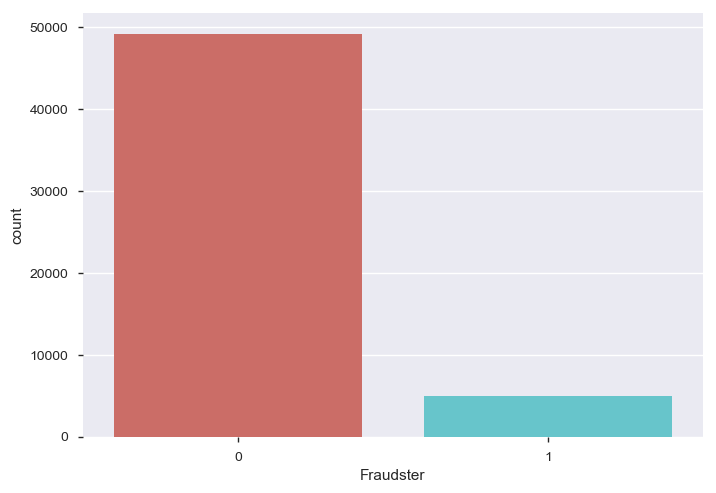

<Figure size 800x550 with 0 Axes>

In [27]:
sns.countplot(x='Fraudster', data=final_base_train_1, palette='hls')
plt.show()
plt.savefig('count_plot')

# upsampling the data -- SMOTE

In [28]:
from sklearn.utils import resample

base_nofraud = final_base_train_1[final_base_train_1.Fraudster == 0]
base_fraud =  final_base_train_1[final_base_train_1.Fraudster == 1]

In [29]:
df_minority_upsampled = resample(base_fraud,
replace=True, # sample with replacement
n_samples=8000)

In [33]:
final_base_train_1 = pd.concat([base_nofraud, df_minority_upsampled])

In [35]:
from sklearn.utils import shuffle
final_base_train_1 = shuffle(final_base_train_1)

In [37]:
final_base_train_1['Fraudster'].value_counts()

0    49188
1     8000
Name: Fraudster, dtype: int64

In [38]:
final_base_train_1.dtypes

Merchant_ID                               int64
Fraudster                                 int64
Ecommerce_Provider_ID                     int64
Merchant_Registration_Date               object
Registered_Device_ID                     object
Age                                       int64
IP_Address                               object
Customer_ID                               int64
Order_ID                                 object
Date_of_Order                            object
Order_Value_USD                           int64
Gender_M                                  uint8
Order_Source_Direct                       uint8
Order_Source_SEO                          uint8
Order_Payment_Method_Credit Card          uint8
Order_Payment_Method_Debit Card           uint8
Order_Payment_Method_E-wallet             uint8
Order_Payment_Method_Internet Banking     uint8
dtype: object

# Dropping Attributes

In [39]:
#final_base_train_1.drop(['Merchant_Registration_Date','Registered_Device_ID', 'Order_ID', 'Date_of_Order'], axis=1, inplace=True)
final_base_train_1.head()

Merchant_ID  Fraudster  Ecommerce_Provider_ID  \
923         102505          0                1746213   
13761       291177          0                1746213   
28845       112370          0                1746213   
30430        76201          0                1746213   
37704       127130          0                1746213   

      Merchant_Registration_Date Registered_Device_ID  Age       IP_Address  \
923              8/10/2018 14:15        DLPPPESRYJVYY   48    99.56.243.242   
13761            5/27/2018 17:30        JJQYCZKNYBMAJ   26  193.125.179.107   
28845            6/10/2018 15:47        EDFOKYEWGZQBH   35   176.138.66.125   
30430             3/9/2018 16:23        FDQTFOCZXCBSB   33   69.144.126.161   
37704              7/2/2018 6:39        PWLQZMRPTVZQB   26    226.119.68.53   

       Customer_ID      Order_ID        Date_of_Order  Order_Value_USD  \
923         131022  dddde5b75c54  2018-09-25 23:03:37               60   
13761       152524  a8d21853769c  2018-07-28 22:16:10               90   
28845       155247  f3aad1d52471  2018-06-24 18:55:20               70   
30430       122312  eae95ef865b5  2018-06-10 18:42:19               72   
37704       149865  3313e540ed45  2018-08-26 01:48:16               85   

       Gender_M  Order_Source_Direct  Order_Source_SEO  \
923           0                    0                 0   
13761         0                    1                 0   
28845         0                    0                 1   
30430         1                    0                 1   
37704         1                    0                 0   

       Order_Payment_Method_Credit Card  Order_Payment_Method_Debit Card  \
923                                   0                                1   
13761                                 1                                0   
28845                                 0                                0   
30430                                 1                                0   
37704                                 0                                1   

       Order_Payment_Method_E-wallet  Order_Payment_Method_Internet Banking  
923                                0                                      0  
13761                              0                                      0  
28845                              1                                      0  
30430                              0                                      0  
37704                              0                                      0

In [40]:
# Since Ecommerce_Provider_ID is same
final_base_train_1.drop(['Ecommerce_Provider_ID'], axis=1, inplace=True)

In [43]:
final_base_train_1.IP_Address.duplicated().sum()

5655

In [44]:
final_base_train_1.Registered_Device_ID.duplicated().sum()

6321

In [45]:
final_base_train_1['Dup_IP_Address'] = final_base_train_1.IP_Address.duplicated()
final_base_train_1['Dup_Registered_Device_ID'] = final_base_train_1.Registered_Device_ID.duplicated()

In [47]:
print(final_base_train_1['Dup_IP_Address'].sum())
print(final_base_train_1['Dup_Registered_Device_ID'].sum())

5655
6321


In [48]:
pd.DataFrame(final_base_train_1 ,columns=['Dup_IP_Address','IP_Address']).head()

Dup_IP_Address       IP_Address
923             False    99.56.243.242
13761           False  193.125.179.107
28845           False   176.138.66.125
30430           False   69.144.126.161
37704           False    226.119.68.53

In [49]:
final_base_train_1[final_base_train_1['Dup_IP_Address']==True]

Merchant_ID  Fraudster Merchant_Registration_Date Registered_Device_ID  \
52446       127994          1             1/5/2018 14:24        HSSTUVWUBWDEL   
449         310922          1             1/1/2018 12:32        CWWXBSUMUEQKM   
48932        26481          1            8/17/2018 12:49        ALMFMPBKMFNJX   
16273       146535          1             3/17/2018 7:10        XKKHAOBOIGWAK   
16403       381629          1              1/1/2018 5:25        ONXNTMETFHUGT   
17060       350695          1             1/3/2018 19:35        KYZHVNAOUNIJA   
42544       162014          1              1/1/2018 7:31        EWIYVSIMWYXYX   
50473       262476          1             1/4/2018 23:22        TBPCJARHFJGRC   
11944       223518          1              1/2/2018 9:10        DEQPIMGWUAEXZ   
11087        92619          1             1/3/2018 17:03        ZQMYFQZYAMTBL   
52446       127994          1             1/5/2018 14:24        HSSTUVWUBWDEL   
51736       134883          1             1/5/2018 11:24        TJURUBNLPDVFO   
12183       194965          1              1/8/2018 4:00        GNBQILJMGUZGB   
11300        51483          1              1/4/2018 7:41        MLTWJXNJCRASP   
35633       309268          1              1/8/2018 9:54        RDLIARTBSYNJX   
43763        18668          0             1/2/2018 22:08        EAVLJQECGTKTG   
2436         51795          1              1/7/2018 4:10        ZXCDEKWEGYCMS   
1402        253659          1              1/1/2018 9:14        XITUSGMRMUAUS   
52634       266930          0            1/12/2018 14:06        QGWUOPUHKKOWQ   
50208        74594          1             1/1/2018 20:53        GJYDMCQZQAPSD   
16403       381629          1              1/1/2018 5:25        ONXNTMETFHUGT   
7704        335186          1             1/12/2018 6:56        AKEOZITKSXCMN   
131         106982          1            1/12/2018 22:30        ZDTRIMVIAIMSY   
10656       344191          1             1/10/2018 3:22        ZQDXZKXWCQOBF   
38346       314594          1              1/1/2018 4:25        NNNKKBMWEMENB   
46904        54688          1             1/9/2018 22:09        SROBYUXLXRGKX   
29310       380122          1             4/4/2018 13:01        AECGFLJQAFDSC   
44467       223051          1             6/28/2018 6:19        CBPBWKIRUTXMJ   
23644       129856          1              1/7/2018 8:13        KNVVDPKADOSUI   
50632       272428          1            1/12/2018 15:12        JDMRFJZPZTKYV   
...            ...        ...                        ...                  ...   
16618       337414          1             7/7/2018 23:10        UASZFKBKCMSEX   
38300       198863          1             1/8/2018 17:08        SUAYZHXCTWTCM   
4384        378184          1             1/6/2018 20:57        DXNFABEHCHWKC   
37049        72612          1             1/16/2018 1:54        NUPZBADUXPBDR   
35510       131348          1            1/11/2018 11:10        IFZANBSCFRDBY   
24217        70129          1             1/3/2018 23:01        QOOTGANXWIARB   
32114       243508          1             1/9/2018 14:43        GLJDRFVTSIEBN   
50770       324098          1            1/28/2018 19:33        QOFFVSZPIKPRI   
23408        58828          1             1/8/2018 19:50        ZWKVGSHQSOXAP   
12826       306180          1            8/17/2018 19:03        ELCRQHINWEPQW   
49248        49334          1              1/6/2018 4:18        RPFWSDOHOFXQU   
20567        24907          1             2/6/2018 20:51        RWFVUGCQQRMVM   
27393       164343          1              1/7/2018 9:04        MMDCIEOUEZILQ   
17501       242053          1              1/8/2018 4:09        KLBEMYLABKFSE   
30454       267723          1            7/25/2018 19:10        LIAWAQRIRZOVF   
28375       376070          1            1/10/2018 11:18        OSTBMXJGUZTMP   
42890       259069          1              1/1/2018 4:13        OXGMQGBBPCBOP   
42390       328670          1         

In [51]:
final_base_train_1.Customer_ID.duplicated().sum()

23479

In [52]:
final_base_train_1['is_duplicate_Customer_ID'] = final_base_train_1.Customer_ID.duplicated()
final_base_train_1['is_duplicate_Customer_ID'].sum()

23479

In [53]:
final_base_train_1

Merchant_ID  Fraudster Merchant_Registration_Date Registered_Device_ID  \
923         102505          0            8/10/2018 14:15        DLPPPESRYJVYY   
13761       291177          0            5/27/2018 17:30        JJQYCZKNYBMAJ   
28845       112370          0            6/10/2018 15:47        EDFOKYEWGZQBH   
30430        76201          0             3/9/2018 16:23        FDQTFOCZXCBSB   
37704       127130          0              7/2/2018 6:39        PWLQZMRPTVZQB   
45497       131053          0            1/27/2018 17:25        YSMSUHNEYXOXV   
53411       350904          0            7/31/2018 16:31        NMRXPYPXENSSI   
8841         64228          0             8/7/2018 11:35        JYIPHSTQTDLPT   
6256        151582          0             8/14/2018 6:26        JCUOLOROKTWXP   
32085       199071          0             6/30/2018 5:38        AWVXUHNGFVQFN   
36081       365448          0             6/11/2018 1:14        EAJTFGDOWDOOY   
40801       337692          0              7/5/2018 3:34        CSREFEHUSFLOR   
29561        65056          0            2/19/2018 16:03        VTBXNTQBMQUIW   
8762        182941          0             3/10/2018 2:06        HUJUAIKZZTISF   
48464        22416          0             8/1/2018 17:22        RIETMXWAARFFQ   
9264        104683          0              3/3/2018 6:07        YLNFINYVKHKRG   
23085       281267          1             1/11/2018 8:56        QSCRCHCEFFBKA   
37072        53809          0             8/7/2018 17:53        CEJMFAYTUCIIT   
20968       354705          0             4/8/2018 23:52        OYYMXZOEIYIBY   
1053        162425          0              7/8/2018 3:09        AHOWRPKDEXMUJ   
27180       161286          0             6/4/2018 12:53        OCLQUCFVCCXUE   
5866        112552          1            1/30/2018 19:39        RAAWHZNIVTAPS   
2020        127163          0            1/10/2018 16:59        PZXMNJKRSQZBY   
49204       173752          0            7/18/2018 16:10        ATFBHZVOOWCWP   
42276       136614          0            1/11/2018 18:50        LIXZOKJBBVILH   
11061       258208          0            1/28/2018 22:28        VMRIWSKYELSJI   
45077       289327          0             1/20/2018 1:53        GMGSEODNGQWFL   
21174       157991          1              1/4/2018 4:20        WPPBQRPRFZBIS   
44839       171226          1              1/6/2018 9:31        PAFDEWHDYRCZT   
24331       277986          0             8/5/2018 13:42        SDWHJEHWHBDHZ   
...            ...        ...                        ...                  ...   
17491       350203          0            7/25/2018 20:30        OXCXHJHAMKJDR   
31952       120662          0              2/6/2018 1:05        EETXKOHDEDUPE   
9724         72311          1            1/24/2018 17:30        YSFFPWULTWSRY   
43776       146861          0              3/8/2018 2:20        OYFNLYBTCGXWJ   
24868        87615          0            2/18/2018 13:10        PTTCCJQOOOXNX   
36169       147651          0             5/17/2018 5:56        YFNGHMIIQACPX   
31143       281796          1              1/2/2018 0:45        HQDACQCVYXPEF   
30135        75945          1             1/21/2018 4:39        FIYBDAJSXPZJY   
10442        57293          0             8/9/2018 15:41        IGZHYHNQPEOFP   
45516       380242          0             1/2/2018 16:53        MRCBRQWVEIBPP   
36745       220657          0             4/5/2018 12:39        CACOXSIVEXTEI   
41334       315047          0            5/14/2018 18:37        ZDYNHQAONHLHL   
10018       247624          1             1/2/2018 11:44        AKGRJKHPYGZQN   
51819       254152          0             2/25/2018 0:32        ZMAIDOUXLGFIJ   
34507       112456          0            4/17/2018 15:59        YCYGQKVEURVLH   
7943         25477          0             3/10/2018 4:17        IAXOQVYTATYSY   
26718        34846          0            6/26/2018 18:29        LUHLJEBPWUAVI   
45467       361346          0         

In [56]:
from datetime import datetime

train_merchant_data = datetime.strptime('2018-05-01 21:15:11', '%Y-%m-%d  %H:%M:%S')

In [57]:
final_base_train_1['new_formatted_date'] = pd.to_datetime(final_base_train_1.Merchant_Registration_Date)

In [58]:
final_base_train_1['new_formatted_date'].head()

923     2018-08-10 14:15:00
13761   2018-05-27 17:30:00
28845   2018-06-10 15:47:00
30430   2018-03-09 16:23:00
37704   2018-07-02 06:39:00
Name: new_formatted_date, dtype: datetime64[ns]

In [60]:
final_base_train_1['Merchant_Registration_year'] = final_base_train_1.new_formatted_date.dt.strftime("%Y")
final_base_train_1['Merchant_Registration_month'] = final_base_train_1.new_formatted_date.dt.strftime("%m")
final_base_train_1['Merchant_Registration_day'] = final_base_train_1.new_formatted_date.dt.strftime("%d")
final_base_train_1['Merchant_Registration_hour'] = final_base_train_1.new_formatted_date.dt.strftime("%H")
final_base_train_1['Merchant_Registration_min'] = final_base_train_1.new_formatted_date.dt.strftime("%M")
final_base_train_1['Merchant_Registration_sec'] = final_base_train_1.new_formatted_date.dt.strftime("%S")

In [62]:
pd.DataFrame(final_base_train_1, columns=['Merchant_Registration_Date','Merchant_Registration_year','Merchant_Registration_month','Merchant_Registration_day','Merchant_Registration_hour','Merchant_Registration_min','Merchant_Registration_sec']).head()

Merchant_Registration_Date Merchant_Registration_year  \
923              8/10/2018 14:15                       2018   
13761            5/27/2018 17:30                       2018   
28845            6/10/2018 15:47                       2018   
30430             3/9/2018 16:23                       2018   
37704              7/2/2018 6:39                       2018   

      Merchant_Registration_month Merchant_Registration_day  \
923                            08                        10   
13761                          05                        27   
28845                          06                        10   
30430                          03                        09   
37704                          07                        02   

      Merchant_Registration_hour Merchant_Registration_min  \
923                           14                        15   
13761                         17                        30   
28845                         15                        47   
30430                         16                        23   
37704                         06                        39   

      Merchant_Registration_sec  
923                          00  
13761                        00  
28845                        00  
30430                        00  
37704                        00

In [64]:
final_base_train_1['new_formatted_date_order'] = pd.to_datetime(final_base_train_1.Date_of_Order)

In [65]:
final_base_train_1['Order_year'] = final_base_train_1.new_formatted_date_order.dt.strftime("%Y")
final_base_train_1['Order_month'] = final_base_train_1.new_formatted_date_order.dt.strftime("%m")
final_base_train_1['Order_day'] = final_base_train_1.new_formatted_date_order.dt.strftime("%d")
final_base_train_1['Order_hour'] = final_base_train_1.new_formatted_date_order.dt.strftime("%H")
final_base_train_1['Order_min'] = final_base_train_1.new_formatted_date_order.dt.strftime("%M")
final_base_train_1['Order_sec'] = final_base_train_1.new_formatted_date_order.dt.strftime("%S")

In [66]:
pd.DataFrame(final_base_train_1, columns=['Date_of_Order','Order_year','Order_month','Order_day','Order_hour','Order_min','Order_sec']).head()

Date_of_Order Order_year Order_month Order_day Order_hour  \
923    2018-09-25 23:03:37       2018          09        25         23   
13761  2018-07-28 22:16:10       2018          07        28         22   
28845  2018-06-24 18:55:20       2018          06        24         18   
30430  2018-06-10 18:42:19       2018          06        10         18   
37704  2018-08-26 01:48:16       2018          08        26         01   

      Order_min Order_sec  
923          03        37  
13761        16        10  
28845        55        20  
30430        42        19  
37704        48        16

In [67]:
final_base_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57188 entries, 923 to 21120
Data columns (total 35 columns):
Merchant_ID                              57188 non-null int64
Fraudster                                57188 non-null int64
Merchant_Registration_Date               57188 non-null object
Registered_Device_ID                     57188 non-null object
Age                                      57188 non-null int64
IP_Address                               57188 non-null object
Customer_ID                              57188 non-null int64
Order_ID                                 57188 non-null object
Date_of_Order                            57188 non-null object
Order_Value_USD                          57188 non-null int64
Gender_M                                 57188 non-null uint8
Order_Source_Direct                      57188 non-null uint8
Order_Source_SEO                         57188 non-null uint8
Order_Payment_Method_Credit Card         57188 non-null uint8
Order_Payment_Me

In [68]:
final_base_train_1.to_csv('cleaned_data.csv', index=False, header = True)

In [69]:
###  Spliting IP Address using regular exp
import re

final_base_train_1['IP_Address_first'] = (final_base_train_1['IP_Address'].str.rsplit(".",expand=True))[0]
final_base_train_1['IP_Address_second'] = (final_base_train_1['IP_Address'].str.rsplit(".",expand=True))[1]
final_base_train_1['IP_Address_third'] = (final_base_train_1['IP_Address'].str.rsplit(".",expand=True))[2]
final_base_train_1['IP_Address_forth'] = (final_base_train_1['IP_Address'].str.rsplit(".",expand=True))[3]

In [70]:
pd.DataFrame(final_base_train_1,columns=['IP_Address_first','IP_Address_second','IP_Address_third','IP_Address_forth','IP_Address']).head()

IP_Address_first IP_Address_second IP_Address_third IP_Address_forth  \
923                 99                56              243              242   
13761              193               125              179              107   
28845              176               138               66              125   
30430               69               144              126              161   
37704              226               119               68               53   

            IP_Address  
923      99.56.243.242  
13761  193.125.179.107  
28845   176.138.66.125  
30430   69.144.126.161  
37704    226.119.68.53

In [71]:
final_base_train_bkup = final_base_train_1.copy(deep=True)

In [72]:
print(final_base_train_1.shape)
print(final_base_train_bkup.shape)

(57188, 39)
(57188, 39)


In [78]:
cols_to_drop=['Merchant_ID','Merchant_Registration_Date','Registered_Device_ID','Order_ID','Date_of_Order',
              'new_formatted_date','new_formatted_date_order','IP_Address']

# have to get some info out of hashing of DeviceID or orderID if possible in next model !!!

final_base_train_1.drop(cols_to_drop,inplace=True,axis=1)



In [79]:
final_base_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57188 entries, 923 to 21120
Data columns (total 30 columns):
Fraudster                                57188 non-null int64
Age                                      57188 non-null int64
Customer_ID                              57188 non-null int64
Order_Value_USD                          57188 non-null int64
Gender_M                                 57188 non-null uint8
Order_Source_Direct                      57188 non-null uint8
Order_Source_SEO                         57188 non-null uint8
Order_Payment_Method_Credit Card         57188 non-null uint8
Order_Payment_Method_Debit Card          57188 non-null uint8
Order_Payment_Method_E-wallet            57188 non-null uint8
Order_Payment_Method_Internet Banking    57188 non-null uint8
Dup_IP_Address                           57188 non-null bool
Dup_Registered_Device_ID                 57188 non-null bool
is_duplicate_Customer_ID                 57188 non-null bool
Merchant_Registration_ye

In [80]:
for col in ['Dup_IP_Address', 'Dup_Registered_Device_ID', 'is_duplicate_Customer_ID']:
    final_base_train_1[col] = final_base_train_1[col].astype(int)
         

In [81]:
final_base_train_1.Dup_IP_Address.value_counts()

0    51533
1     5655
Name: Dup_IP_Address, dtype: int64

In [82]:
final_base_train_1.Dup_Registered_Device_ID.value_counts()

0    50867
1     6321
Name: Dup_Registered_Device_ID, dtype: int64

In [83]:
final_base_train_1.is_duplicate_Customer_ID.value_counts()

0    33709
1    23479
Name: is_duplicate_Customer_ID, dtype: int64

In [92]:
final_base_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57188 entries, 923 to 21120
Data columns (total 30 columns):
Fraudster                                57188 non-null int64
Age                                      57188 non-null int64
Customer_ID                              57188 non-null int64
Order_Value_USD                          57188 non-null int64
Gender_M                                 57188 non-null uint8
Order_Source_Direct                      57188 non-null uint8
Order_Source_SEO                         57188 non-null uint8
Order_Payment_Method_Credit Card         57188 non-null uint8
Order_Payment_Method_Debit Card          57188 non-null uint8
Order_Payment_Method_E-wallet            57188 non-null uint8
Order_Payment_Method_Internet Banking    57188 non-null uint8
Dup_IP_Address                           57188 non-null int32
Dup_Registered_Device_ID                 57188 non-null int32
is_duplicate_Customer_ID                 57188 non-null int32
Merchant_Registration

In [90]:
num_cols=['Merchant_Registration_year','Merchant_Registration_month','Merchant_Registration_day','Merchant_Registration_hour',
         'Merchant_Registration_min','Merchant_Registration_sec','Order_year','Order_month','Order_day','Order_hour',
          'Order_min','Order_sec','IP_Address_first','IP_Address_second','IP_Address_third','IP_Address_forth']

In [91]:
for item in num_cols:
    final_base_train_1[item] = final_base_train_1[item].astype('int64')

## Splitting the data

In [93]:
X = final_base_train_1.loc[:,final_base_train_1.columns != 'Fraudster']
y = final_base_train_1.loc[:, final_base_train_1.columns == 'Fraudster']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [95]:
print('X_train.shape : ', X_train.shape)
print('X_test.shape : ', X_test.shape)
print('y_train.shape : ', y_train.shape)
print('y_test.shape : ', y_test.shape)

X_train.shape :  (40031, 29)
X_test.shape :  (17157, 29)
y_train.shape :  (40031, 1)
y_test.shape :  (17157, 1)


### GridSearch to find out appropriate Hyperparameter

In [487]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[20,21,22,23,24,25]}

rfc = RandomForestClassifier()

model = GridSearchCV(rfc, params, cv=5)
model.fit(X_train, y_train)
model.best_params_

C:\Users\SAHISHNUTA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SAHISHNUTA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SAHISHNUTA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SAHISHNUTA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: 

C:\Users\SAHISHNUTA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SAHISHNUTA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SAHISHNUTA\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_estimators': 25}

In [488]:
# Create Random Forest model
rfc = RandomForestClassifier(n_estimators=25)
rfc.fit(X_train, y_train)

C:\Users\SAHISHNUTA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [489]:
# Predict on train data
pred_train = rfc.predict(X_train)

In [426]:
print("accuracy_score : ",accuracy_score(y_train, pred_train))
print("F1 score:", f1_score(y_train, pred_train, average='binary')) 
print("classification_report : ",classification_report(y_train,pred_train)) 
cnf = confusion_matrix(y_train, pred_train)
cnf

accuracy_score :  0.9962317847637618
F1 score: 0.9795158286778398
classification_report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     34387
           1       1.00      0.96      0.98      3562

    accuracy                           1.00     37949
   macro avg       1.00      0.98      0.99     37949
weighted avg       1.00      1.00      1.00     37949



array([[34387,     0],
       [  143,  3419]], dtype=int64)

Text(0.5, 257.44, 'Predicted Label')

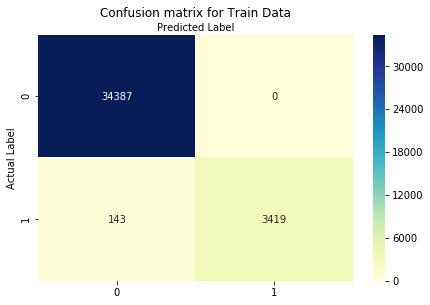

In [427]:
class_names = ['fraud', 'no_fraud']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Train Data', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [428]:
# Predict on test data
pred_test = rfc.predict(X_test)

In [429]:
print("accuracy_score : ",accuracy_score(y_test, pred_test))
print("F1 score:", f1_score(y_test, pred_test, average='binary')) 
print("classification_report : ",classification_report(y_test,pred_test)) 
cnf = confusion_matrix(y_test, pred_test)
cnf

accuracy_score :  0.9096778160354156
F1 score: 0.03798297314996726
classification_report :                precision    recall  f1-score   support

           0       0.91      1.00      0.95     14801
           1       0.45      0.02      0.04      1463

    accuracy                           0.91     16264
   macro avg       0.68      0.51      0.50     16264
weighted avg       0.87      0.91      0.87     16264



array([[14766,    35],
       [ 1434,    29]], dtype=int64)

Text(0.5, 257.44, 'Predicted Label')

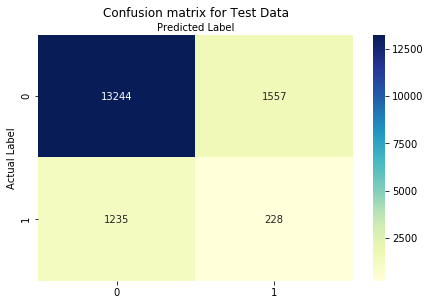

In [231]:
class_names = ['fraud', 'no_fraud']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Test Data', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

### Decision Tree

In [430]:
# Create DecisionTree model
dtc = DecisionTreeClassifier()  
dtc.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [431]:
pred_train = dtc.predict(X_train)

In [432]:
print("accuracy_score : ",accuracy_score(y_train, pred_train))
print("F1 score:", f1_score(y_train, pred_train, average='binary')) 
print("classification_report : ",classification_report(y_train,pred_train)) 
cnf = confusion_matrix(y_train, pred_train)
cnf

accuracy_score :  1.0
F1 score: 1.0
classification_report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00     34387
           1       1.00      1.00      1.00      3562

    accuracy                           1.00     37949
   macro avg       1.00      1.00      1.00     37949
weighted avg       1.00      1.00      1.00     37949



array([[34387,     0],
       [    0,  3562]], dtype=int64)

Text(0.5, 257.44, 'Predicted Label')

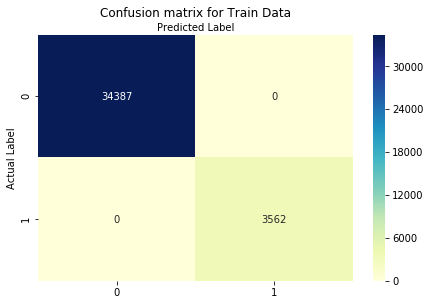

In [433]:
class_names = ['fraud', 'no_fraud']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Train Data', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [434]:
# Predict on test data
pred_test = dtc.predict(X_test)

In [435]:
print("accuracy_score : ",accuracy_score(y_test, pred_test))
print("F1 score:", f1_score(y_test, pred_test, average='binary')) 
print("classification_report : ",classification_report(y_test,pred_test)) 
cnf = confusion_matrix(y_test, pred_test)
cnf

accuracy_score :  0.8274102311854402
F1 score: 0.14027565084226645
classification_report :                precision    recall  f1-score   support

           0       0.91      0.89      0.90     14801
           1       0.13      0.16      0.14      1463

    accuracy                           0.83     16264
   macro avg       0.52      0.53      0.52     16264
weighted avg       0.84      0.83      0.84     16264



array([[13228,  1573],
       [ 1234,   229]], dtype=int64)

Text(0.5, 257.44, 'Predicted Label')

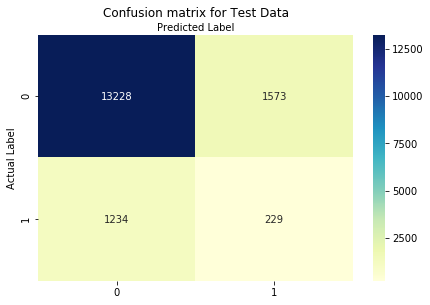

In [436]:
class_names = ['fraud', 'no_fraud']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Test Data', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

### KNN Classifier

In [437]:
knc = KNeighborsClassifier(n_neighbors=5)  
knc.fit(X_train, y_train)

C:\Users\SAHISHNUTA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [438]:
pred_train = knc.predict(X_train)

In [439]:
print("accuracy_score : ",accuracy_score(y_train, pred_train))
print("F1 score:", f1_score(y_train, pred_train, average='binary')) 
print("classification_report : ",classification_report(y_train,pred_train)) 
cnf = confusion_matrix(y_train, pred_train)
cnf

accuracy_score :  0.9078500092229044
F1 score: 0.08861089392754756
classification_report :                precision    recall  f1-score   support

           0       0.91      1.00      0.95     34387
           1       0.62      0.05      0.09      3562

    accuracy                           0.91     37949
   macro avg       0.76      0.52      0.52     37949
weighted avg       0.88      0.91      0.87     37949



array([[34282,   105],
       [ 3392,   170]], dtype=int64)

Text(0.5, 257.44, 'Predicted Label')

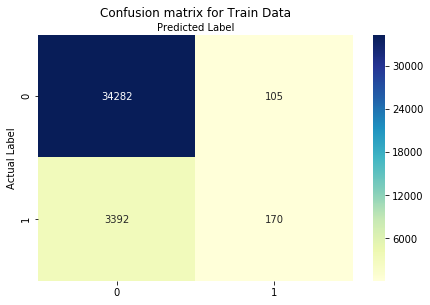

In [440]:
class_names = ['fraud', 'no_fraud']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Train Data', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [441]:
# Predict on test data
pred_test = knc.predict(X_test)

In [442]:
print("accuracy_score : ",accuracy_score(y_test, pred_test))
print("F1 score:", f1_score(y_test, pred_test, average='binary')) 
print("classification_report : ",classification_report(y_test,pred_test)) 
cnf = confusion_matrix(y_test, pred_test)
cnf

accuracy_score :  0.904881947860305
F1 score: 0.011501597444089458
classification_report :                precision    recall  f1-score   support

           0       0.91      0.99      0.95     14801
           1       0.09      0.01      0.01      1463

    accuracy                           0.90     16264
   macro avg       0.50      0.50      0.48     16264
weighted avg       0.84      0.90      0.87     16264



array([[14708,    93],
       [ 1454,     9]], dtype=int64)

Text(0.5, 257.44, 'Predicted Label')

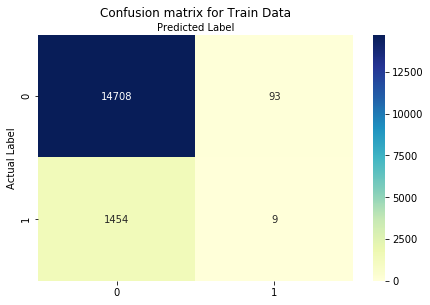

In [443]:
class_names = ['fraud', 'no_fraud']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Train Data', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

### XG Boost

In [444]:
# Create Random Forest model
xg_reg = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 25)
xg_reg.fit(X_train, y_train)

C:\Users\SAHISHNUTA\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SAHISHNUTA\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=25, n_jobs=1,
              nthread=None, objective='reg:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [445]:
# Predict on train data
pred_train = xg_reg.predict(X_train)

In [446]:
print("accuracy_score : ",accuracy_score(y_train, pred_train))
print("F1 score:", f1_score(y_train, pred_train, average='binary')) 
print("classification_report : ",classification_report(y_train,pred_train)) 

cnf = confusion_matrix(y_train, pred_train)
cnf

accuracy_score :  0.9061371841155235
F1 score: 0.0


C:\Users\SAHISHNUTA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\SAHISHNUTA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\SAHISHNUTA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\SAHISHNUTA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


classification_report :                precision    recall  f1-score   support

           0       0.91      1.00      0.95     34387
           1       0.00      0.00      0.00      3562

    accuracy                           0.91     37949
   macro avg       0.45      0.50      0.48     37949
weighted avg       0.82      0.91      0.86     37949



array([[34387,     0],
       [ 3562,     0]], dtype=int64)

Text(0.5, 257.44, 'Predicted Label')

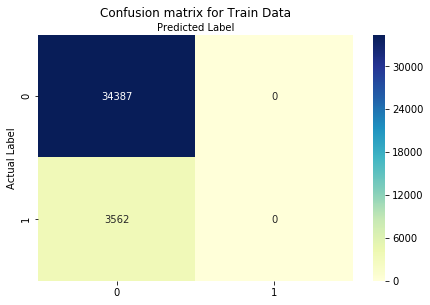

In [447]:
class_names = ['fraud', 'no_fraud']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Train Data', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [448]:
# Predict on test data
pred_test = xg_reg.predict(X_test)

In [449]:
print("accuracy_score : ",accuracy_score(y_test, pred_test))
print("F1 score:", f1_score(y_test, pred_test, average='binary')) 
print("classification_report : ",classification_report(y_test,pred_test)) 
cnf = confusion_matrix(y_test, pred_test)
cnf

accuracy_score :  0.9100467289719626
F1 score: 0.0
classification_report :                precision    recall  f1-score   support

           0       0.91      1.00      0.95     14801
           1       0.00      0.00      0.00      1463

    accuracy                           0.91     16264
   macro avg       0.46      0.50      0.48     16264
weighted avg       0.83      0.91      0.87     16264



C:\Users\SAHISHNUTA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\SAHISHNUTA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\SAHISHNUTA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\SAHISHNUTA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[14801,     0],
       [ 1463,     0]], dtype=int64)

Text(0.5, 257.44, 'Predicted Label')

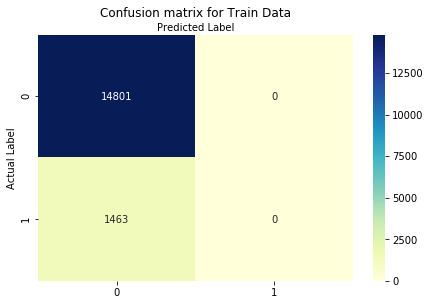

In [450]:
class_names = ['fraud', 'no_fraud']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Train Data', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

### Load the test file

In [381]:
test = pd.read_csv("test-1561627952093.csv")
test_merchant_data = pd.read_csv("test_merchant_data-1561627903902.csv")
test_order_data = pd.read_csv("test_order_data-1561627931868.csv")

In [382]:
print("test.shape : ",test.shape)
print("test_merchant_data.shape : ",test_merchant_data.shape)
print("test_order_data.shape : ",test_order_data.shape)

test.shape :  (13554, 1)
test_merchant_data.shape :  (13554, 7)
test_order_data.shape :  (13554, 7)


In [383]:
base_test = test.merge(test_merchant_data, on='Merchant_ID')

In [384]:
base_test.shape

(13554, 7)

In [385]:
base_test.head()

Merchant_ID  Ecommerce_Provider_ID Merchant_Registration_Date  \
0        53637                1746213        2018-02-11 20:50:29   
1       243517                1746213        2018-04-06 13:19:39   
2       343640                1746213        2018-01-12 16:47:49   
3        69889                1746213        2018-02-19 21:58:52   
4       125706                1746213        2018-05-17 15:50:19   

  Registered_Device_ID Gender  Age      IP_Address  
0        PTMLBENYMQCTV      F   40  134.162.124.62  
1        HMCLDZUZPWZRR      M   39    152.76.98.87  
2        VLGSMAPXISSEJ      M   23    31.202.3.255  
3        ZINHISBBOKQXT      M   34  12.242.168.185  
4        WFKEAOTPHTYEO      M   20    26.61.210.47

In [386]:
base_test_final = base_test.merge(test_order_data, on='Merchant_ID')

In [387]:
base_test_final.shape

(13554, 13)

In [388]:
base_test_final.head()

Merchant_ID  Ecommerce_Provider_ID Merchant_Registration_Date  \
0        53637                1746213        2018-02-11 20:50:29   
1       243517                1746213        2018-04-06 13:19:39   
2       343640                1746213        2018-01-12 16:47:49   
3        69889                1746213        2018-02-19 21:58:52   
4       125706                1746213        2018-05-17 15:50:19   

  Registered_Device_ID Gender  Age      IP_Address  Customer_ID      Order_ID  \
0        PTMLBENYMQCTV      F   40  134.162.124.62       157068  a032de091f51   
1        HMCLDZUZPWZRR      M   39    152.76.98.87       112534  0d563f0606d6   
2        VLGSMAPXISSEJ      M   23    31.202.3.255       148774  18fb0fa888b6   
3        ZINHISBBOKQXT      M   34  12.242.168.185       114528  ed1eb920d721   
4        WFKEAOTPHTYEO      M   20    26.61.210.47       120940  313dcf962627   

         Date_of_Order  Order_Value_USD Order_Source Order_Payment_Method  
0  2018-03-09 09:09:42               60          SEO          Credit Card  
1  2018-06-13 20:11:19               28          SEO          Credit Card  
2  2018-04-14 04:19:36               75          Ads           Debit Card  
3  2018-04-01 13:55:44               98          SEO          Credit Card  
4  2018-05-25 02:08:18               35          SEO          Credit Card

In [389]:
Merchant_ID = base_test.iloc[:,0:1]
Merchant_ID.shape

(13554, 1)

In [390]:
Merchant_ID.head()

Merchant_ID
0        53637
1       243517
2       343640
3        69889
4       125706

In [391]:
base_test1 = base_test_final.copy()

In [392]:
base_test1.drop(['Merchant_Registration_Date','Registered_Device_ID', 'Order_ID', 'Date_of_Order'], axis=1, inplace=True)
#final_base_train_1.drop(['Merchant_Registration_Date','Registered_Device_ID', 'Order_ID', 'Date_of_Order'], axis=1, inplace=True)
base_test1.set_index('IP_Address', inplace=True)

In [393]:
base_test1.shape

(13554, 8)

In [394]:
base_test1.head()

Merchant_ID  Ecommerce_Provider_ID Gender  Age  Customer_ID  \
IP_Address                                                                    
134.162.124.62        53637                1746213      F   40       157068   
152.76.98.87         243517                1746213      M   39       112534   
31.202.3.255         343640                1746213      M   23       148774   
12.242.168.185        69889                1746213      M   34       114528   
26.61.210.47         125706                1746213      M   20       120940   

                Order_Value_USD Order_Source Order_Payment_Method  
IP_Address                                                         
134.162.124.62               60          SEO          Credit Card  
152.76.98.87                 28          SEO          Credit Card  
31.202.3.255                 75          Ads           Debit Card  
12.242.168.185               98          SEO          Credit Card  
26.61.210.47                 35          SEO          Credit Card

In [396]:
base_test1.dtypes

Merchant_ID               int64
Ecommerce_Provider_ID     int64
Gender                   object
Age                       int64
Customer_ID               int64
Order_Value_USD           int64
Order_Source             object
Order_Payment_Method     object
dtype: object

In [398]:
for col in ['Gender', 'Order_Source', 'Order_Payment_Method' ]:
    base_test1[col] = base_test1[col].astype('category')

In [400]:
categorical_Attributes = base_test1.select_dtypes(include=['category']).columns
base_test1 = pd.get_dummies(columns=categorical_Attributes, data=base_test1,
                     prefix=categorical_Attributes, prefix_sep="_", drop_first=True)

In [503]:
pred_test1 = dtc.predict(base_test1)

In [504]:
pred_test1 = pd.DataFrame(pred_test1)

In [505]:
final_pred_test = pd.concat([Merchant_ID,pred_test1], axis=1)

In [506]:
final_pred_test.columns = ['Merchant_ID','Fraudster']

In [507]:
final_pred_test.shape

(13554, 2)

In [509]:
final_pred_test.to_csv('Test_Result_2.csv', index=False, header = True)